## mean +- standard error of mean of pollutants on day without fire, with fire and up to 5 days after fire outbreak


### Portugal

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Portugal'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000    

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Portugal):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Portugal):
                Label  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)  NO₂ Mean (µg/m³)  NO₂ SEM (µg/m³)  PM₂.₅ Mean (µg/m³)  PM₂.₅ SEM (µg/m³)  PM₁₀ Mean (µg/m³)  PM₁₀ SEM (µg/m³)
              No fire       167.122080        0.887619         0.567226        0.014298          5.467391         0.035301           10.125003           0.136590          14.975214          0.189101
Day 0 (Fire outbreak)       442.551759      145.125295         4.871394        3.016974          9.631521         1.837396           56.326804          16.821955          77.914743         22.711822
                Day 1      1297.863785      413.731124        20.760804        9.006008         21.747901         5.069726          183.724228          49.943150         253.157224         67.994293
                Day 2      1486.427574      461.523458        20.985838        9.207244         25.525583         6.142184       

### Spain

In [2]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Spain'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Spain):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Spain):
                Label  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)  NO₂ Mean (µg/m³)  NO₂ SEM (µg/m³)  PM₂.₅ Mean (µg/m³)  PM₂.₅ SEM (µg/m³)  PM₁₀ Mean (µg/m³)  PM₁₀ SEM (µg/m³)
              No fire       179.158697        0.647490         1.057721        0.023065          6.709964         0.041898           10.568329           0.092840          15.176686          0.126932
Day 0 (Fire outbreak)       271.462476       36.106981         2.079028        0.721193          8.644896         0.945576           29.214726           5.812090          40.711838          8.005707
                Day 1       491.253164      121.118968         5.379911        2.496372         12.219799         2.017801           62.799643          18.798503          86.891176         25.835697
                Day 2       564.110450      125.349989         6.173350        2.488556         14.132331         2.094790          

### Iberia

In [3]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"   
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Iberia'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000    

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Iberia):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Iberia):
                Label  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)  NO₂ Mean (µg/m³)  NO₂ SEM (µg/m³)  PM₂.₅ Mean (µg/m³)  PM₂.₅ SEM (µg/m³)  PM₁₀ Mean (µg/m³)  PM₁₀ SEM (µg/m³)
              No fire       177.219913        0.686169         0.978715        0.021653          6.509818         0.040835           10.496921           0.099887          15.144235          0.136946
Day 0 (Fire outbreak)       298.600776       53.399541         2.521955        1.085351          8.801395         1.087037           33.515263           7.558483          46.612989         10.338401
                Day 1       634.802512      173.194013         8.117188        3.654867         13.915478         2.560940           84.320120          24.341194         116.480896         33.338498
                Day 2       743.782617      190.838327         9.058900        3.797391         16.351796         2.883243         

### Italy

In [4]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Italy'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Italy):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Italy):
                Label  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)  NO₂ Mean (µg/m³)  NO₂ SEM (µg/m³)  PM₂.₅ Mean (µg/m³)  PM₂.₅ SEM (µg/m³)  PM₁₀ Mean (µg/m³)  PM₁₀ SEM (µg/m³)
              No fire       225.105777        0.894287         2.182071        0.038541          9.572475         0.055394           14.772071           0.106878          20.962261          0.147429
Day 0 (Fire outbreak)       256.914506       23.735798         1.702287        0.497928         10.237544         1.051912           23.560747           3.958647          33.034077          5.472285
                Day 1       361.699457       78.887013         1.375705        0.635611         11.412789         2.131811           43.547131          13.666815          60.472820         18.889918
                Day 2       468.559115      130.425984         1.662304        0.773680         13.521723         2.443364          

### Greece

In [5]:
import xarray as xr
import numpy as np
import pandas as pd
import warnings

# Suppress RuntimeWarnings for invalid SEM calculations
warnings.filterwarnings("ignore", category=RuntimeWarning)

# Dictionary of pollutants and their NetCDF file paths
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"   
}

# Human-readable labels
label_names = {
    0: "No fire",
    1: "Day 0 (Fire outbreak)",
    2: "Day 1",
    3: "Day 2",
    4: "Day 3",
    5: "Day 4",
    6: "Day 5",
}

# Initialize results dictionary
results = { "Label": list(label_names.values()) }

# Loop over pollutants
for pollutant, filepath in pollutant_files.items():
    ds = xr.open_dataset(filepath)

    data = ds['Mean']  # pollutant values
    labels = ds['fire_label_Greece'].transpose('latitude', 'longitude', 'time')

    mean_list, sem_list = [], []

    # Loop over fire labels
    for label in label_names.keys():
        mask = labels == label
        masked_data = data.where(mask)

        # Stats across time per grid cell
        mean = masked_data.mean(dim='time', skipna=True)
        std = masked_data.std(dim='time', skipna=True)
        count = masked_data.count(dim='time')
        sem = std / np.sqrt(count)

        # Spatial average
        mean_val = mean.mean(skipna=True).item()
        sem_val = sem.mean(skipna=True).item()

        # Convert CO mg/m³ → µg/m³
        if pollutant == "CO":
            mean_val *= 1000
            sem_val *= 1000

        mean_list.append(mean_val)
        sem_list.append(sem_val)

    # Add columns for this pollutant
    results[f"{pollutant} Mean (µg/m³)"] = mean_list
    results[f"{pollutant} SEM (µg/m³)"] = sem_list

# Convert to DataFrame for pretty table
df = pd.DataFrame(results)

# Print the table
print("\nPollutant concentrations by fire label (spatial average across Greece):")
print(df.to_string(index=False))



Pollutant concentrations by fire label (spatial average across Greece):
                Label  CO Mean (µg/m³)  CO SEM (µg/m³)  NO Mean (µg/m³)  NO SEM (µg/m³)  NO₂ Mean (µg/m³)  NO₂ SEM (µg/m³)  PM₂.₅ Mean (µg/m³)  PM₂.₅ SEM (µg/m³)  PM₁₀ Mean (µg/m³)  PM₁₀ SEM (µg/m³)
              No fire       180.710633        0.574819         0.504087        0.009901          4.248558         0.030307           12.281477           0.119697          17.279642          0.164462
Day 0 (Fire outbreak)       285.777262       56.387553         1.213685        0.592351          6.682817         1.437445           36.005690          12.311003          49.922078         16.963102
                Day 1       788.389719      262.295932         8.841520        4.569368         15.446270         4.688545           95.338808          32.630601         130.402791         44.443073
                Day 2      1478.836133      584.682765        21.508683       12.561945         26.546594         7.558261         

## Divide daily concentrations of pollutants into quartiles Q1 (lowest), Q2, Q3 and Q4 (highest) for days when fires occurred and days they did not - Assess the impact of fire events on the concentration of air pollutants. Calculation of percentage of days (non-wildfire and wildfire) in each of the four qaurtiles

### Portugal

In [6]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Portugal"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

#print("\nFire days counts & percentages:")
#print(fire_counts_table)
#print("\nNon-fire days counts & percentages:")
#print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  91.644255  179.263970  256.983399  443.331299  22727.492823
1        NO   0.044231    0.240024    0.643124    3.751518    524.911222
2       NO₂   1.559928    6.063211    9.676672   14.416012    223.099955
3     PM₂.₅   1.352389   12.026590   23.557680   52.621903   1220.058123
4      PM₁₀   1.983242   17.177307   33.051921   72.904765   1599.670734

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut          max
0        CO  81.042064  133.885311  157.775089  187.245356  1217.575396
1        NO   0.012126    0.165384    0.288360    0.612300    16.617527
2       NO₂   1.266539    3.736012    5.062179    6.741346    23.830735
3     PM₂.₅   1.496552    5.983395    8.198538   11.681363   144.903085
4      PM₁₀   2.187659    9.050914   12.503760   17.418560   201.735123


Pixels with at least one fire: 23

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 41.250, Lon = -8.250, Fire Days = 490
2. Lat = 41.250, Lon = -7.500, Fire Days = 433
3. Lat = 40.500, Lon = -7.500, Fire Days = 390
4. Lat = 40.500, Lon = -8.250, Fire Days = 242
5. Lat = 39.750, Lon = -8.250, Fire Days = 234
6. Lat = 41.250, Lon = -6.750, Fire Days = 184
7. Lat = 39.750, Lon = -7.500, Fire Days = 125


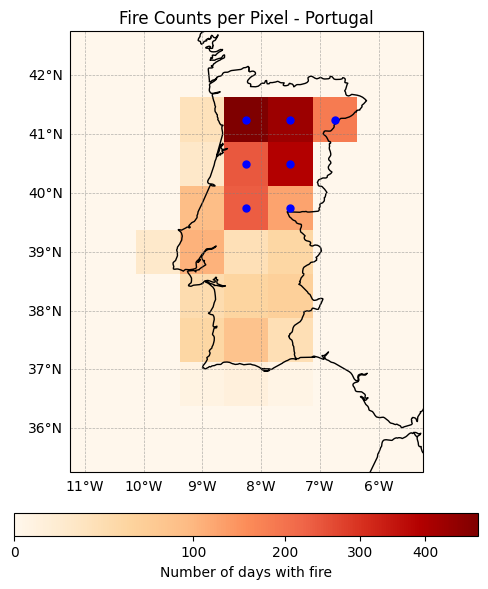

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\Results\co_fire_meteo_Portugal.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Portugal"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")

print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
#print("\nLatitude range:")
#print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
#print("Longitude range:")
#print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
#print(f"Latitude indices: {min_y} to {max_y}")
#print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
# --- Add colorbar below the plot ---
cbar = plt.colorbar(
    pcm,
    ax=ax,
    orientation='horizontal',   # horizontal bar
    pad=0.08,                   # space between plot and colorbar
    fraction=0.046,             # size relative to plot
    shrink=0.8                  # overall shrink factor
)
cbar.set_label("Number of days with fire")
ax.set_title("Fire Counts per Pixel - Portugal")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Selected pixel with most fire days at latitude=41.250, longitude=-8.250


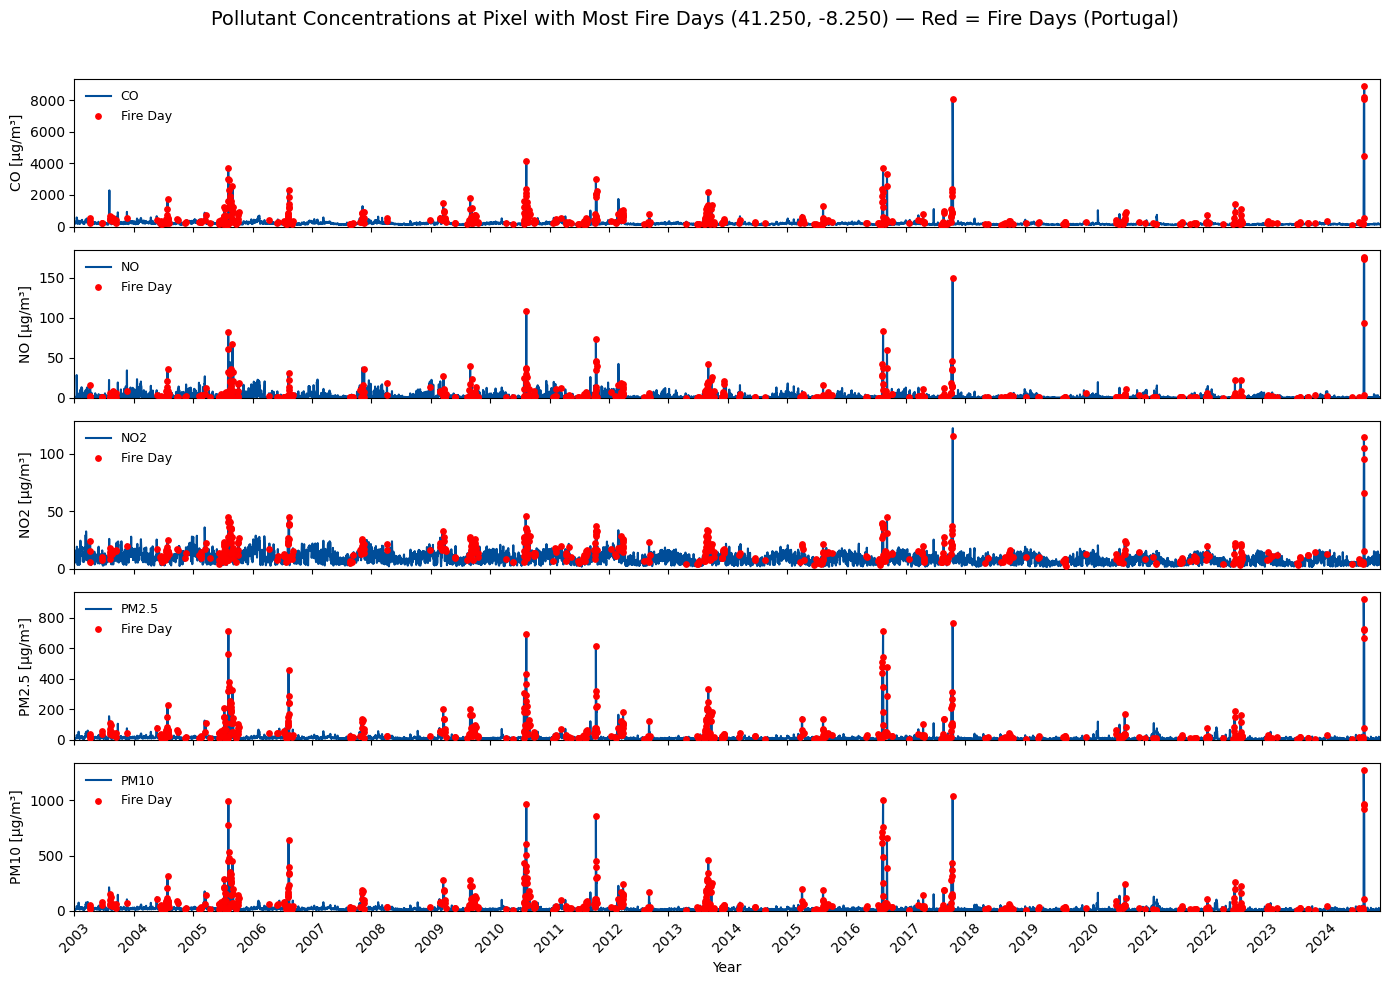

In [8]:
# Plots the pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Portugal"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Portugal"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³ if necessary
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper left", fontsize=9, frameon=False)
    ax.grid(False)
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Portugal)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=41.250, longitude=-7.500


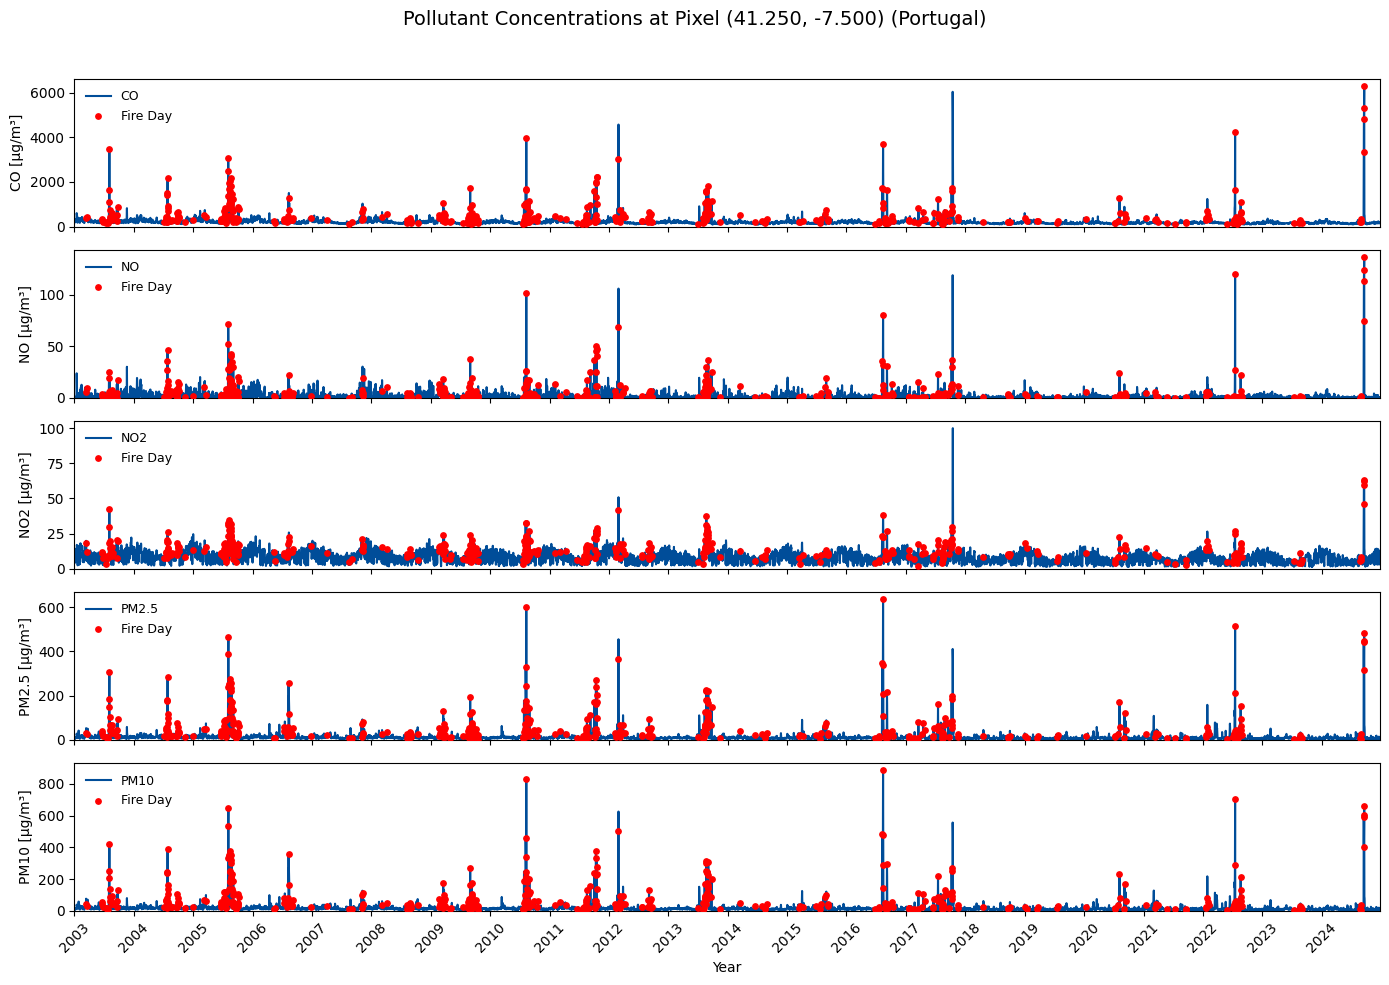

In [9]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Portugal"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 41.25   # Example latitude
lon_val = -7.50  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Portugal"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper left", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Portugal)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Spain

In [10]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Spain"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

#print("\nFire days counts & percentages:")
#print(fire_counts_table)
#print("\nNon-fire days counts & percentages:")
#print(nofire_counts_table)



Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  92.890624  169.249840  223.783990  334.201003  11997.523964
1        NO   0.032021    0.257126    0.647367    2.692297    320.346673
2       NO₂   0.285172    5.697790    8.963874   13.304694     91.452059
3     PM₂.₅   1.506768   10.470768   17.402518   32.140102    699.573324
4      PM₁₀   2.293276   14.812331   24.284245   44.908543    952.068279

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut         max
0        CO  97.030085  146.429969  169.595191  202.021182  431.066861
1        NO   0.055706    0.261702    0.510479    1.192102   11.444273
2       NO₂   1.797235    4.622228    6.079330    8.351854   19.760695
3     PM₂.₅   2.245757    7.119616    9.288455   12.405938   73.506646
4      PM₁₀   3.429071   10.507059   13.557231   17.713981   92.609943


Pixels with at least one fire: 122

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 42.000, Lon = -8.250, Fire Days = 503
2. Lat = 42.000, Lon = -7.500, Fire Days = 489
3. Lat = 42.000, Lon = -6.750, Fire Days = 391
4. Lat = 42.750, Lon = -6.750, Fire Days = 281
5. Lat = 42.750, Lon = -8.250, Fire Days = 166
6. Lat = 37.500, Lon = -5.250, Fire Days = 155
7. Lat = 42.750, Lon = -6.000, Fire Days = 145


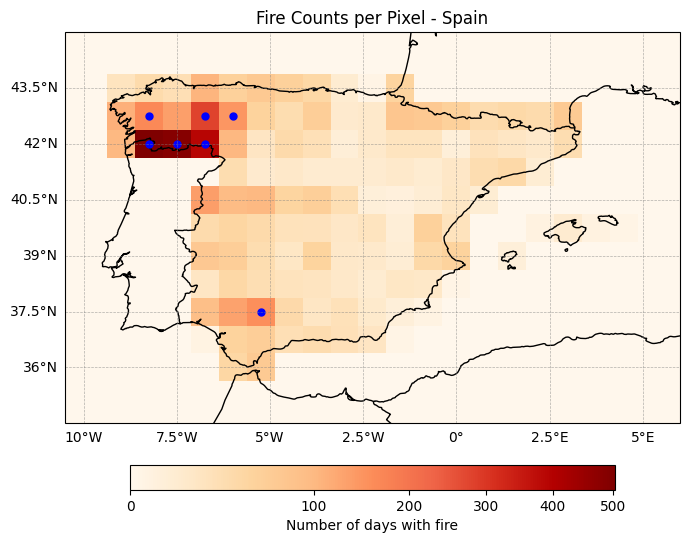

In [11]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\Results\co_fire_meteo_Spain.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Spain"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")


print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
#print("\nLatitude range:")
#print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
#print("Longitude range:")
#print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
#print(f"Latitude indices: {min_y} to {max_y}")
#print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
# --- Add colorbar below the plot ---
cbar = plt.colorbar(
    pcm,
    ax=ax,
    orientation='horizontal',   # horizontal bar
    pad=0.08,                   # space between plot and colorbar
    fraction=0.046,             # size relative to plot
    shrink=0.8                  # overall shrink factor
)
cbar.set_label("Number of days with fire")
ax.set_title("Fire Counts per Pixel - Spain")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Selected pixel with most fire days at latitude=42.000, longitude=-8.250


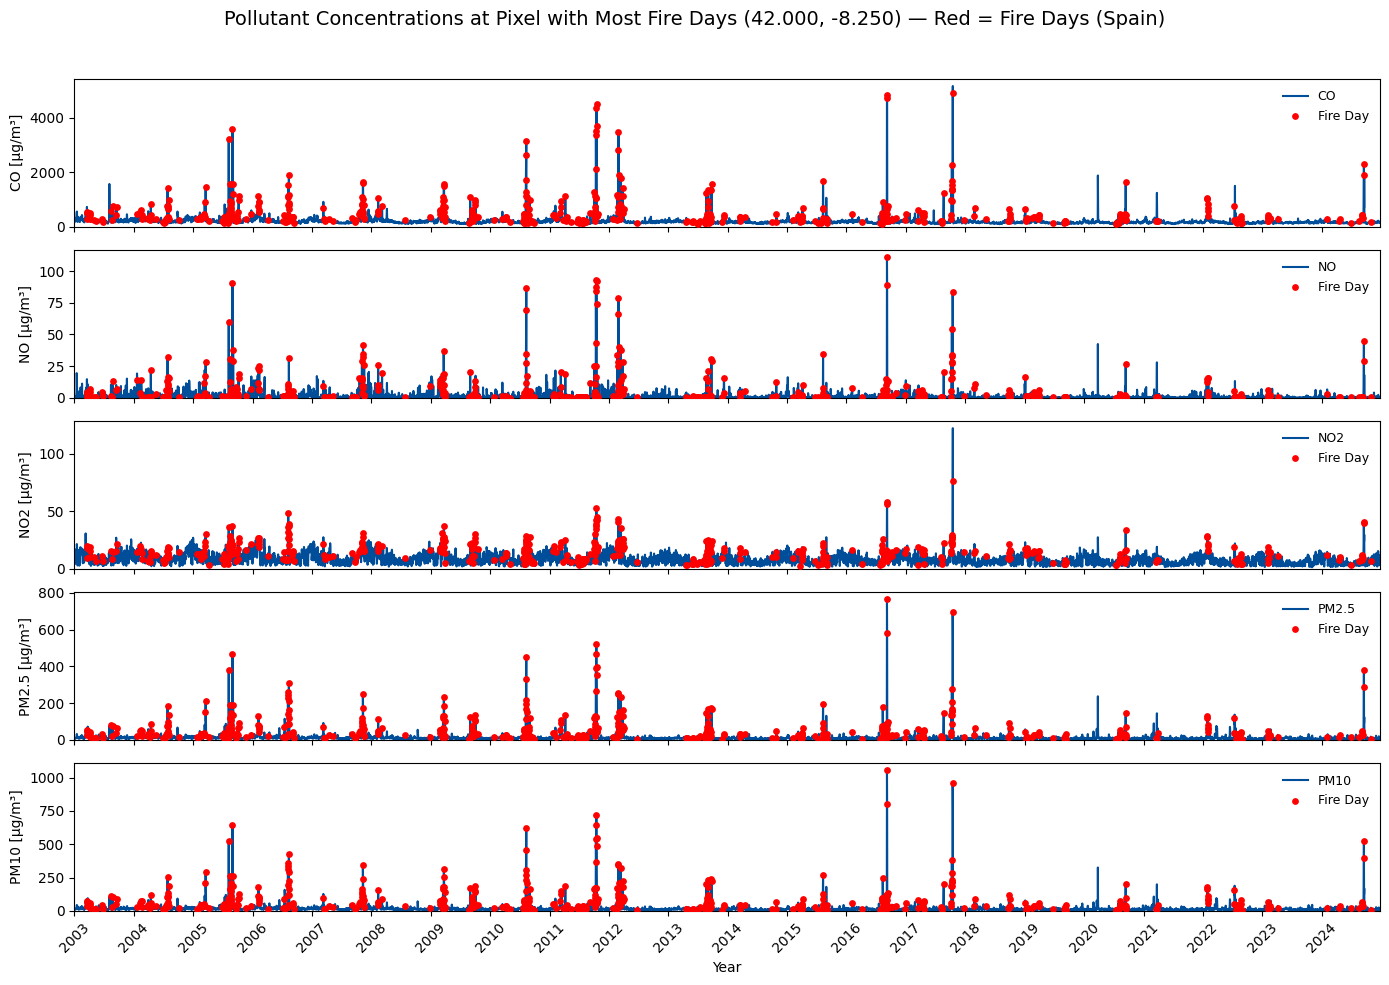

In [12]:
#Pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Spain"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Spain"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Red = Fire Days (Spain)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=42.000, longitude=-7.500


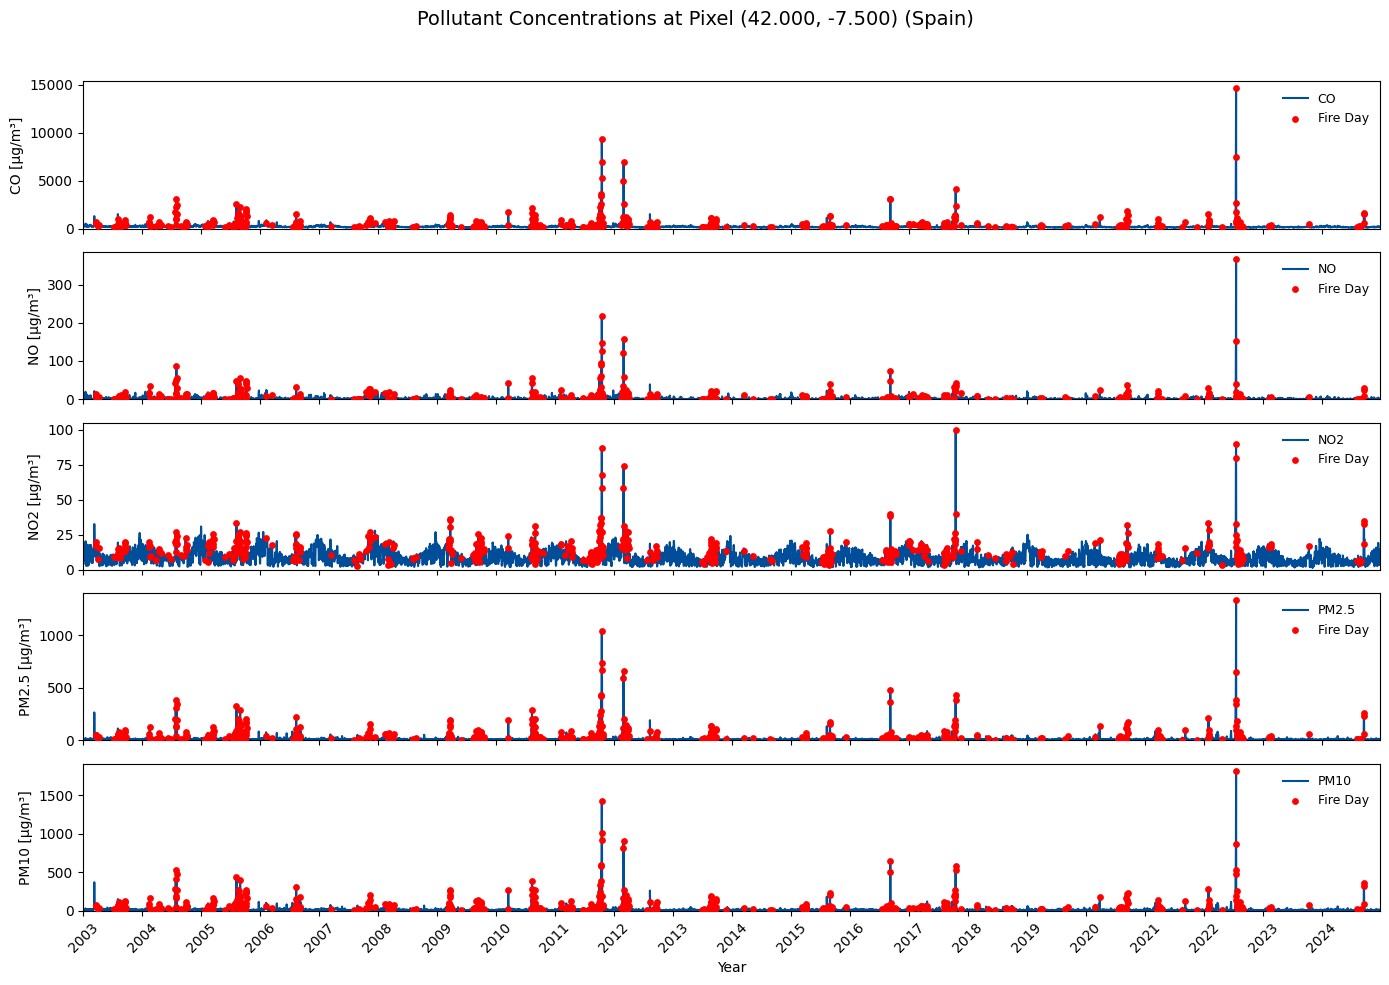

In [13]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Spain"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 42.00  # Example latitude
lon_val = -7.50  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Spain"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Spain)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Iberia

In [14]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Iberia"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

#print("\nFire days counts & percentages:")
#print(fire_counts_table)
#print("\nNon-fire days counts & percentages:")
#print(nofire_counts_table)


Fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut           max
0        CO  91.644255  172.721074  230.353731  352.407882  11041.778089
1        NO   0.032021    0.262875    0.685438    3.020321    243.436697
2       NO₂   0.285172    5.844093    9.002622   13.447092    121.688814
3     PM₂.₅   1.506768   10.854776   18.575608   35.461472    874.441990
4      PM₁₀   2.293276   15.522269   26.027625   49.380607   1226.283407

Non-fire days quartile ranges:
  pollutant        min      Q1_cut      median      Q3_cut         max
0        CO  96.143208  145.163171  168.558353  199.920833  433.785352
1        NO   0.052868    0.255497    0.488057    1.106534   10.411152
2       NO₂   1.752337    4.538262    5.950667    8.082193   20.142690
3     PM₂.₅   2.216590    7.085987    9.239886   12.303525   73.117291
4      PM₁₀   3.396091   10.509864   13.539639   17.703008   93.302002


Pixels with at least one fire: 145

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 42.000, Lon = -8.250, Fire Days = 503
2. Lat = 41.250, Lon = -8.250, Fire Days = 490
3. Lat = 42.000, Lon = -7.500, Fire Days = 489
4. Lat = 41.250, Lon = -7.500, Fire Days = 433
5. Lat = 42.000, Lon = -6.750, Fire Days = 391
6. Lat = 40.500, Lon = -7.500, Fire Days = 390
7. Lat = 42.750, Lon = -6.750, Fire Days = 281


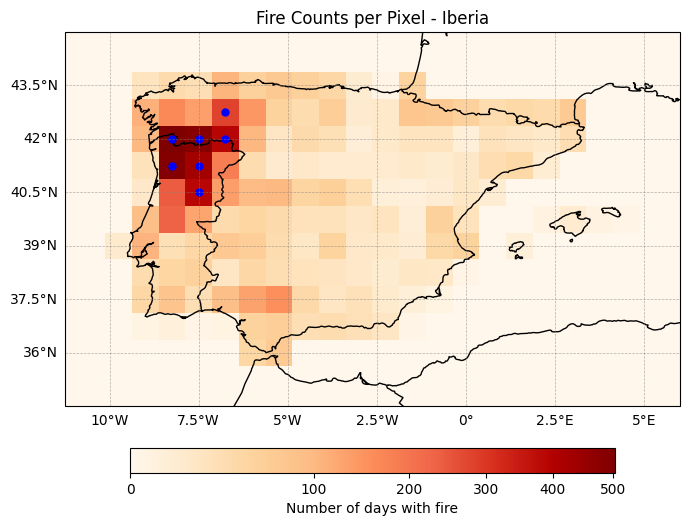

In [7]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\Results\co_fire_meteo_Iberia.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Iberia"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")


print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
# print("\nLatitude range:")
# print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
# print("Longitude range:")
# print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
# print(f"Latitude indices: {min_y} to {max_y}")
# print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
# --- Add colorbar below the plot ---
cbar = plt.colorbar(
    pcm,
    ax=ax,
    orientation='horizontal',   # horizontal bar
    pad=0.08,                   # space between plot and colorbar
    fraction=0.046,             # size relative to plot
    shrink=0.8                  # overall shrink factor
)
cbar.set_label("Number of days with fire")
ax.set_title("Fire Counts per Pixel - Iberia")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Selected pixel with most fire days at latitude=42.000, longitude=-8.250


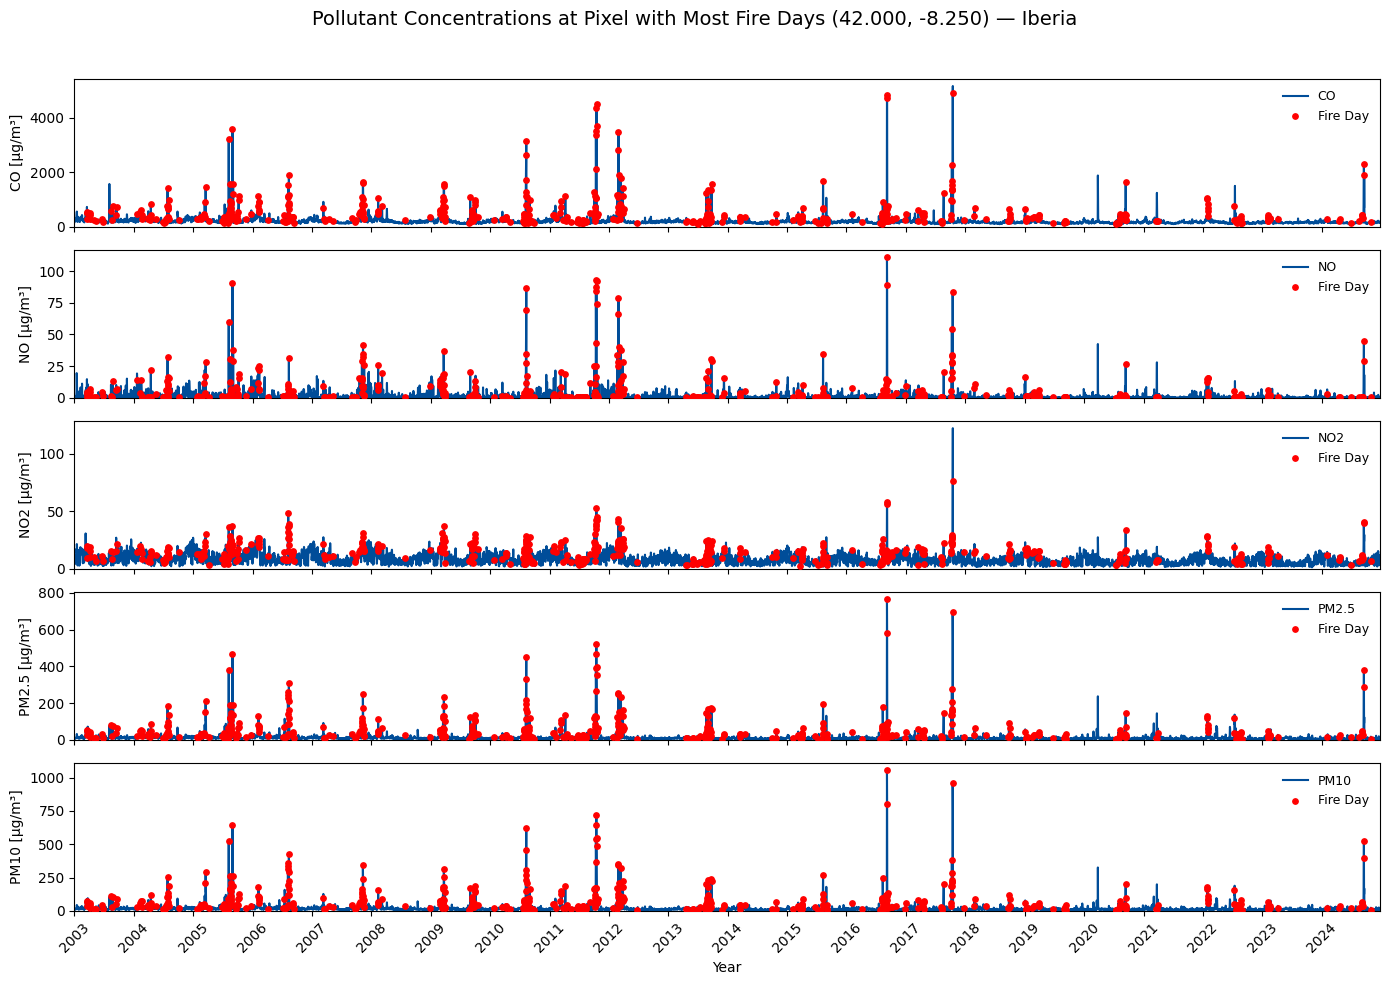

In [11]:
#Plots the pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Iberia"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Iberia"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Iberia",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=41.250, longitude=-8.250


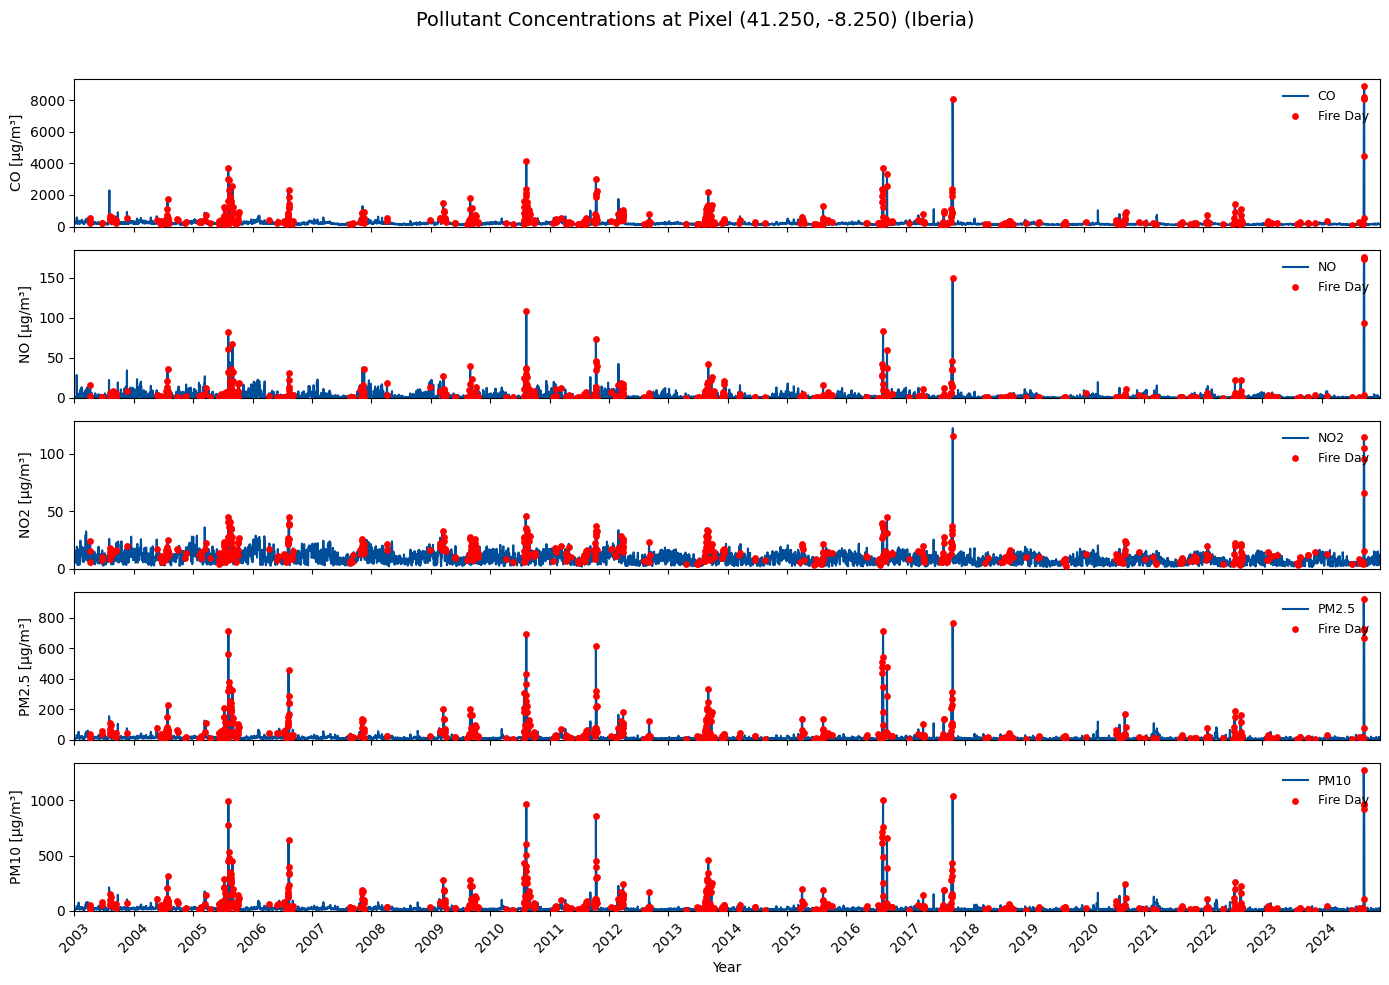

In [17]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"  
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Iberia"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 41.25   # Example latitude
lon_val = -8.25  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Iberia"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Iberia)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Italy

In [18]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Italy"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

#print("\nFire days counts & percentages:")
#print(fire_counts_table)
#print("\nNon-fire days counts & percentages:")
#print(nofire_counts_table)



Fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut          max
0        CO  108.653160  168.109410  202.055186  257.634456  2674.026007
1        NO    0.000000    0.175388    0.362758    0.960444    77.868684
2       NO₂    0.240176    4.690520    7.859783   11.823174    68.855573
3     PM₂.₅    0.174466   10.460595   15.796014   24.645597   385.148526
4      PM₁₀    0.252130   14.848375   22.352234   34.666647   530.599974

Non-fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut         max
0        CO  118.462302  176.200429  208.268153  259.476036  571.495006
1        NO    0.075712    0.581972    1.220385    2.842791   24.942879
2       NO₂    2.666766    7.055484    9.030627   11.632593   24.449468
3     PM₂.₅    3.509969   10.406545   13.460211   17.723140   65.447931
4      PM₁₀    5.261541   14.965529   19.163456   25.119089   84.677088


Pixels with at least one fire: 106

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 37.500, Lon = 14.250, Fire Days = 431
2. Lat = 41.250, Lon = 15.750, Fire Days = 388
3. Lat = 37.500, Lon = 13.500, Fire Days = 358
4. Lat = 37.500, Lon = 15.000, Fire Days = 190
5. Lat = 37.500, Lon = 12.750, Fire Days = 186
6. Lat = 39.750, Lon = 9.000, Fire Days = 170
7. Lat = 39.750, Lon = 16.500, Fire Days = 161


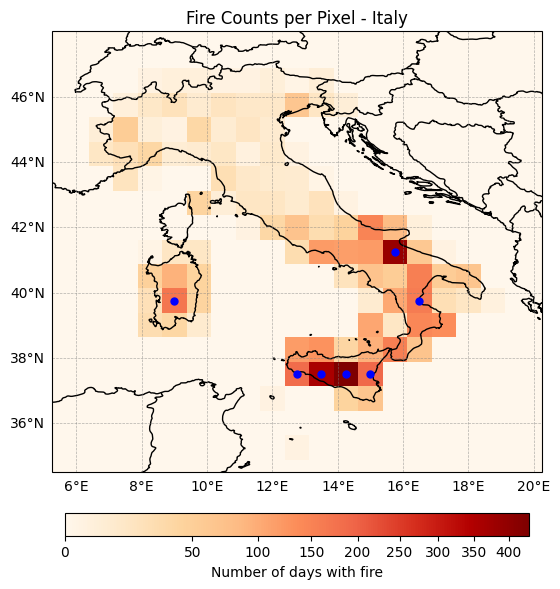

In [19]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\Results\co_fire_meteo_Italy.nc"

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Italy"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")


print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
#print("\nLatitude range:")
#print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
#print("Longitude range:")
#print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
#print(f"Latitude indices: {min_y} to {max_y}")
#print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
# --- Add colorbar below the plot ---
cbar = plt.colorbar(
    pcm,
    ax=ax,
    orientation='horizontal',   # horizontal bar
    pad=0.08,                   # space between plot and colorbar
    fraction=0.046,             # size relative to plot
    shrink=0.8                  # overall shrink factor
)
cbar.set_label("Number of days with fire")
ax.set_title("Fire Counts per Pixel - Italy")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Selected pixel with most fire days at latitude=37.500, longitude=14.250


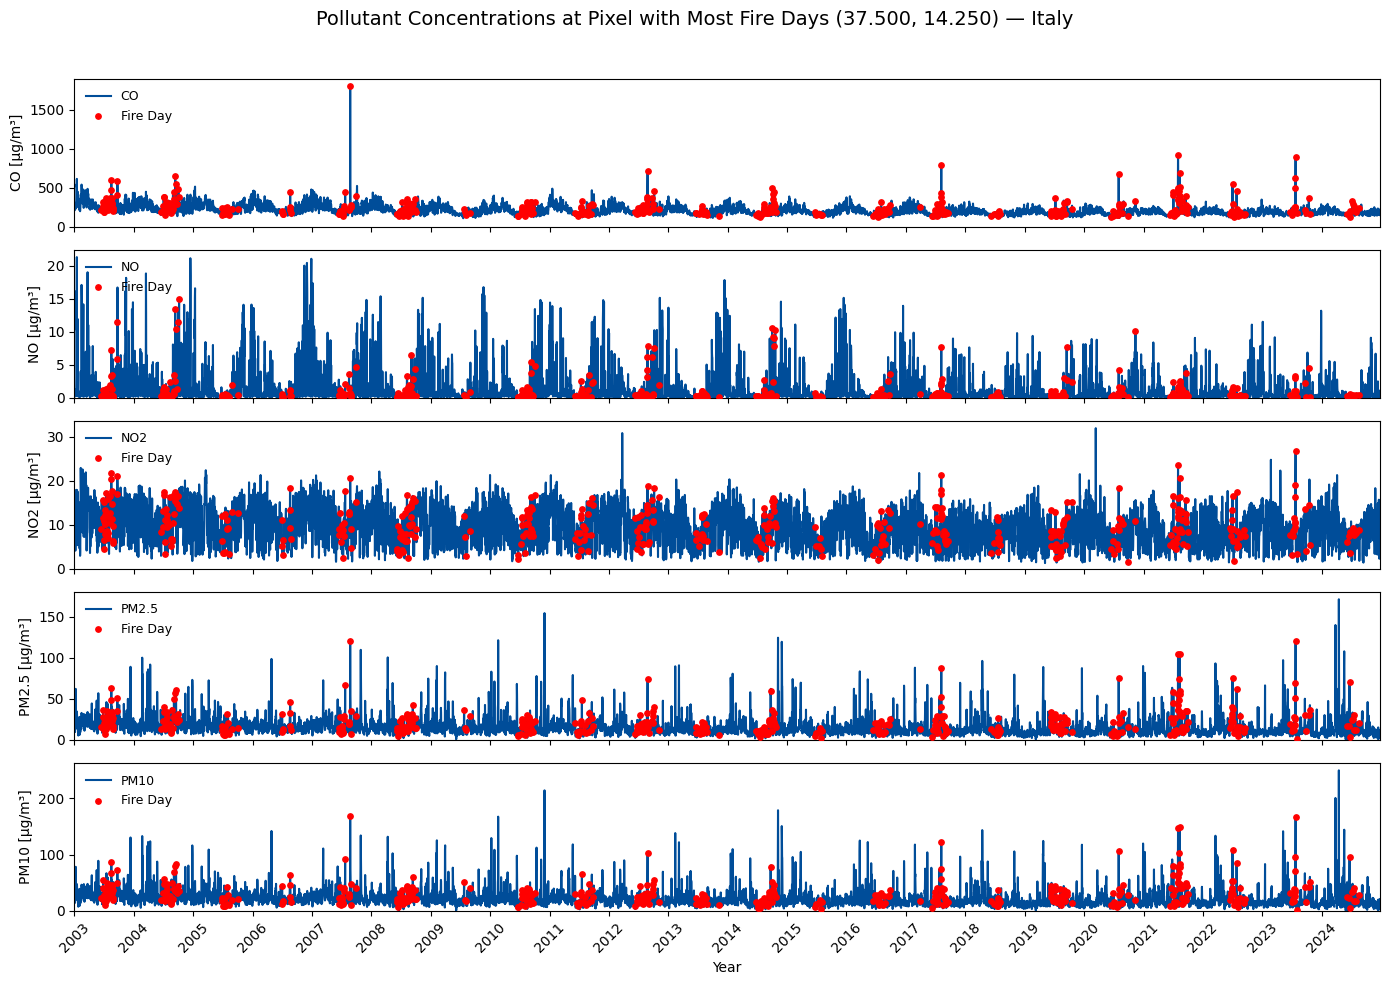

In [14]:
#Pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Italy"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Italy"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper left", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Italy",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=41.250, longitude=15.750


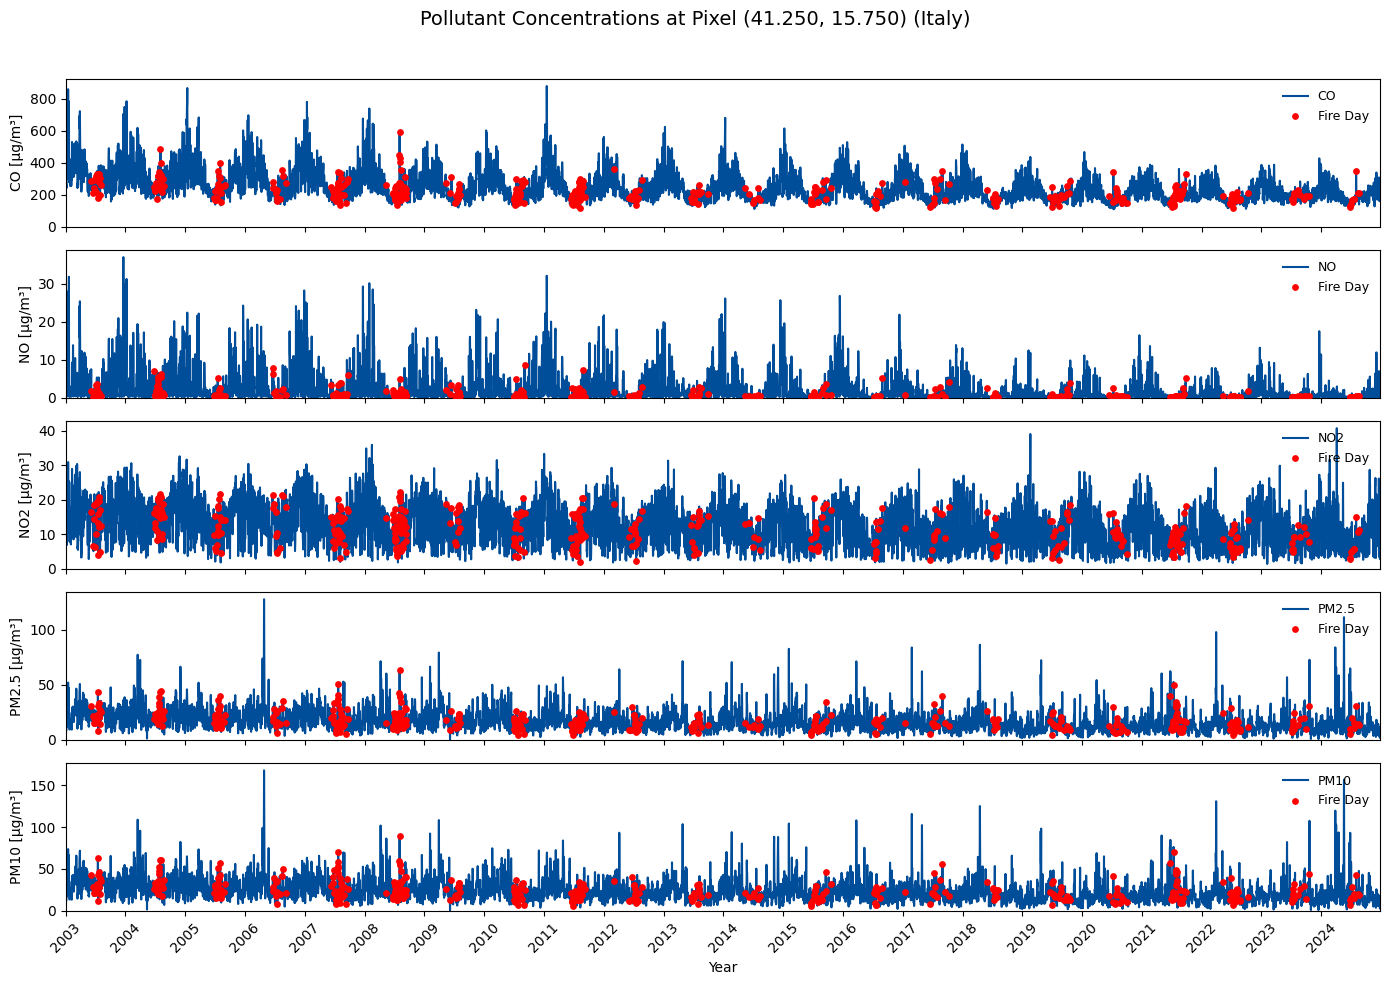

In [ ]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"  
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Italy"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 41.25  # Example latitude
lon_val = 15.75  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Italy"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Italy)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Greece

In [22]:
import xarray as xr
import pandas as pd
import numpy as np

files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

fire_results = []
nofire_results = []
fire_ranges = []
nofire_ranges = []
fire_counts = []
nofire_counts = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    pollutant = ds["Mean"]
    fire_flag = ds["fire_binary_Greece"]

    # Convert CO units
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = xr.Dataset({"pollutant": pollutant, "fire": fire_flag}).to_dataframe().reset_index()

    # --- FIRE DAYS ---
    df_fire = df[df["fire"] == 1].copy()
    df_fire_daily = (
        df_fire.groupby(df_fire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_fire_mean","pixel_count"]))
        .reset_index()
    )
    df_fire_daily["pollutant"] = pol_name
    fire_results.append(df_fire_daily)

    # Quartiles for fire days
    values = df_fire_daily["pollutant_fire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_fire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_fire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_fire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        fire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        fire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

    # --- NON-FIRE DAYS ---
    df_nofire = df[df["fire"] == 0].copy()
    df_nofire_daily = (
        df_nofire.groupby(df_nofire["time"].dt.normalize())
        .apply(lambda sub: pd.Series([sub["pollutant"].mean(), len(sub)], index=["pollutant_nofire_mean","pixel_count"]))
        .reset_index()
    )
    df_nofire_daily["pollutant"] = pol_name
    nofire_results.append(df_nofire_daily)

    # Quartiles for non-fire days
    values = df_nofire_daily["pollutant_nofire_mean"].dropna()
    if len(values) > 0:
        if len(values.unique()) > 1:
            df_nofire_daily["quartile"] = pd.qcut(values, q=4, labels=["Q1","Q2","Q3","Q4"], duplicates="drop")
        else:
            df_nofire_daily["quartile"] = "Q1"

        # Counts & percentages
        summary_counts = df_nofire_daily["quartile"].value_counts().sort_index().reset_index()
        summary_counts.columns = ["quartile","count"]
        summary_counts["pollutant"] = pol_name
        summary_counts["percentage"] = summary_counts["count"] / summary_counts["count"].sum() * 100
        nofire_counts.append(summary_counts)

        # Quartile ranges
        edges = np.percentile(values, [0,25,50,75,100])
        nofire_ranges.append({
            "pollutant": pol_name,
            "min": edges[0],
            "Q1_cut": edges[1],
            "median": edges[2],
            "Q3_cut": edges[3],
            "max": edges[4]
        })

# --- Combine results ---
fire_days_table = pd.concat(fire_results, ignore_index=True)
nofire_days_table = pd.concat(nofire_results, ignore_index=True)

fire_ranges_table = pd.DataFrame(fire_ranges)
nofire_ranges_table = pd.DataFrame(nofire_ranges)

fire_counts_table = pd.concat(fire_counts, ignore_index=True)
nofire_counts_table = pd.concat(nofire_counts, ignore_index=True)

print("\nFire days quartile ranges:")
print(fire_ranges_table)
print("\nNon-fire days quartile ranges:")
print(nofire_ranges_table)

#print("\nFire days counts & percentages:")
#print(fire_counts_table)
#print("\nNon-fire days counts & percentages:")
#print(nofire_counts_table)



Fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut          max
0        CO  108.779701  176.395162  217.710885  279.653301  6909.419060
1        NO    0.014067    0.132917    0.307975    1.405706   154.320679
2       NO₂    0.270646    4.354762    7.728686   13.048683   103.059570
3     PM₂.₅    0.620074   11.684918   17.340138   25.897886   964.681885
4      PM₁₀    1.564732   16.363317   24.127115   35.981828  1323.984375

Non-fire days quartile ranges:
  pollutant         min      Q1_cut      median      Q3_cut         max
0        CO  108.212757  155.304605  173.889735  199.488342  641.630723
1        NO    0.040150    0.150286    0.298681    0.628515    6.394746
2       NO₂    1.134361    3.027020    3.887361    5.076933   14.865463
3     PM₂.₅    0.788244    7.993410   10.742489   14.270189  136.456497
4      PM₁₀    1.143472   11.456279   15.227724   20.119761  190.624863


Pixels with at least one fire: 77

Top 7 Pixels with Most Fire Days:
---------------------------------
1. Lat = 41.250, Lon = 21.750, Fire Days = 709
2. Lat = 39.750, Lon = 22.500, Fire Days = 235
3. Lat = 39.750, Lon = 20.250, Fire Days = 200
4. Lat = 42.000, Lon = 26.250, Fire Days = 135
5. Lat = 39.000, Lon = 22.500, Fire Days = 135
6. Lat = 38.250, Lon = 24.000, Fire Days = 117
7. Lat = 38.250, Lon = 23.250, Fire Days = 112

Latitude range:
  min: 34.5000, max: 43.5000
Longitude range:
  min: 18.0000, max: 31.5000
Latitude indices: 0 to 12
Longitude indices: 40 to 58


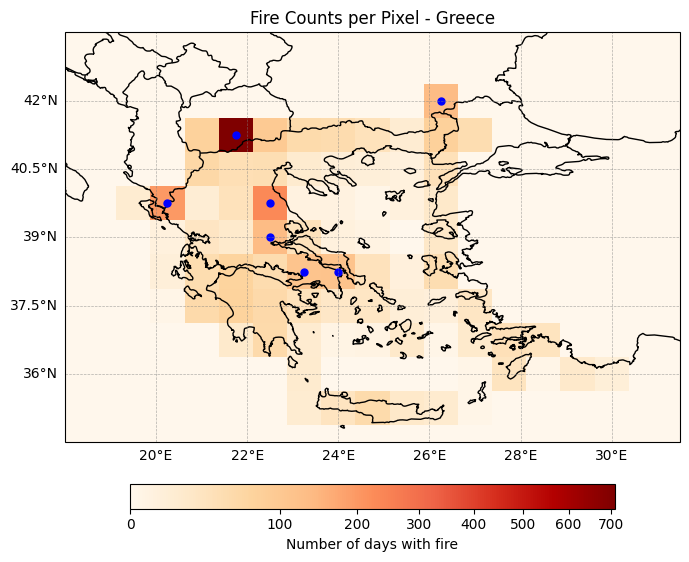

In [23]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.colors as mcolors

# --- INPUT FILE ---
file_path = r"D:\IPMA\Results\co_fire_meteo_Greece.nc"    

# Open dataset
ds = xr.open_dataset(file_path)
fire_mask = ds["fire_binary_Greece"]  # lat x lon x time

# Sum along time to get fire counts per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: latitude x longitude

# Basic dimensions
nlat = fire_counts.sizes["latitude"]
nlon = fire_counts.sizes["longitude"]
total_pixels = nlat * nlon

# Find pixels with at least one fire
fire_indices = np.argwhere(fire_counts.values > 0)
fire_pixels = len(fire_indices)

if fire_pixels == 0:
    raise ValueError("No fire pixels found!")


print(f"Pixels with at least one fire: {fire_pixels}")

# --- FIND TOP 7 PIXELS WITH HIGHEST FIRE FREQUENCY ---
fire_flat = fire_counts.values.flatten()
lat_vals = ds["latitude"].values
lon_vals = ds["longitude"].values

# Get indices of top 7 fire counts
top7_indices = np.argsort(fire_flat)[-7:][::-1]  # descending order
iy_top, ix_top = np.unravel_index(top7_indices, fire_counts.shape)

print("\nTop 7 Pixels with Most Fire Days:")
print("---------------------------------")
for rank, (iy, ix) in enumerate(zip(iy_top, ix_top), start=1):
    lat_val = float(lat_vals[iy])
    lon_val = float(lon_vals[ix])
    count = int(fire_counts.values[iy, ix])
    print(f"{rank}. Lat = {lat_val:.3f}, Lon = {lon_val:.3f}, Fire Days = {count}")

# --- ZOOM AREA CALCULATION (unchanged) ---
min_y, min_x = fire_indices.min(axis=0)
max_y, max_x = fire_indices.max(axis=0)

margin = 2
min_y = max(min_y - margin, 0)
min_x = max(min_x - margin, 0)
max_y = min(max_y + margin, fire_counts.shape[0]-1)
max_x = min(max_x + margin, fire_counts.shape[1]-1)

fire_zoom = fire_counts.isel(latitude=slice(min_y, max_y+1),
                             longitude=slice(min_x, max_x+1))
lat_zoom = ds["latitude"].isel(latitude=slice(min_y, max_y+1))
lon_zoom = ds["longitude"].isel(longitude=slice(min_x, max_x+1))

# --- Print lat/lon range info ---
print("\nLatitude range:")
print(f"  min: {float(lat_zoom.min()):.4f}, max: {float(lat_zoom.max()):.4f}")
print("Longitude range:")
print(f"  min: {float(lon_zoom.min()):.4f}, max: {float(lon_zoom.max()):.4f}")
print(f"Latitude indices: {min_y} to {max_y}")
print(f"Longitude indices: {min_x} to {max_x}")

# --- PLOT WITH CARTOPY ---
plt.figure(figsize=(7, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

# --- Define colormap ---
cmap = plt.cm.OrRd.copy()
cmap.set_bad(color="white")

# Mask NaN values for plotting
data = np.ma.masked_invalid(fire_zoom.values)

# Optional: adjust color normalization to enhance contrast
norm = mcolors.PowerNorm(gamma=0.6, vmin=0, vmax=float(np.nanmax(data)))

# Plot fire counts
pcm = ax.pcolormesh(lon_zoom, lat_zoom, data, cmap=cmap, norm=norm, shading='auto')

# Add borders and coastlines
ax.add_feature(cfeature.BORDERS, linewidth=1.0, edgecolor="black")
ax.add_feature(cfeature.COASTLINE, linewidth=1.0, edgecolor="black")

# --- Mark top 7 pixels on the map ---
for iy, ix in zip(iy_top, ix_top):
    ax.plot(lon_vals[ix], lat_vals[iy], marker='o', color='blue', markersize=5, transform=ccrs.PlateCarree())

# Set limits to zoom area
ax.set_extent([float(lon_zoom.min()), float(lon_zoom.max()),
               float(lat_zoom.min()), float(lat_zoom.max())],
              crs=ccrs.PlateCarree())

# Add gridlines and ticks
gl = ax.gridlines(draw_labels=True, linestyle="--", linewidth=0.5, color="gray", alpha=0.6)
gl.top_labels = False
gl.right_labels = False

# Add colorbar and labels
# --- Add colorbar below the plot ---
cbar = plt.colorbar(
    pcm,
    ax=ax,
    orientation='horizontal',   # horizontal bar
    pad=0.08,                   # space between plot and colorbar
    fraction=0.046,             # size relative to plot
    shrink=0.8                  # overall shrink factor
)
cbar.set_label("Number of days with fire")
ax.set_title("Fire Counts per Pixel - Greece")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

plt.tight_layout()
plt.show()


Selected pixel with most fire days at latitude=41.250, longitude=21.750


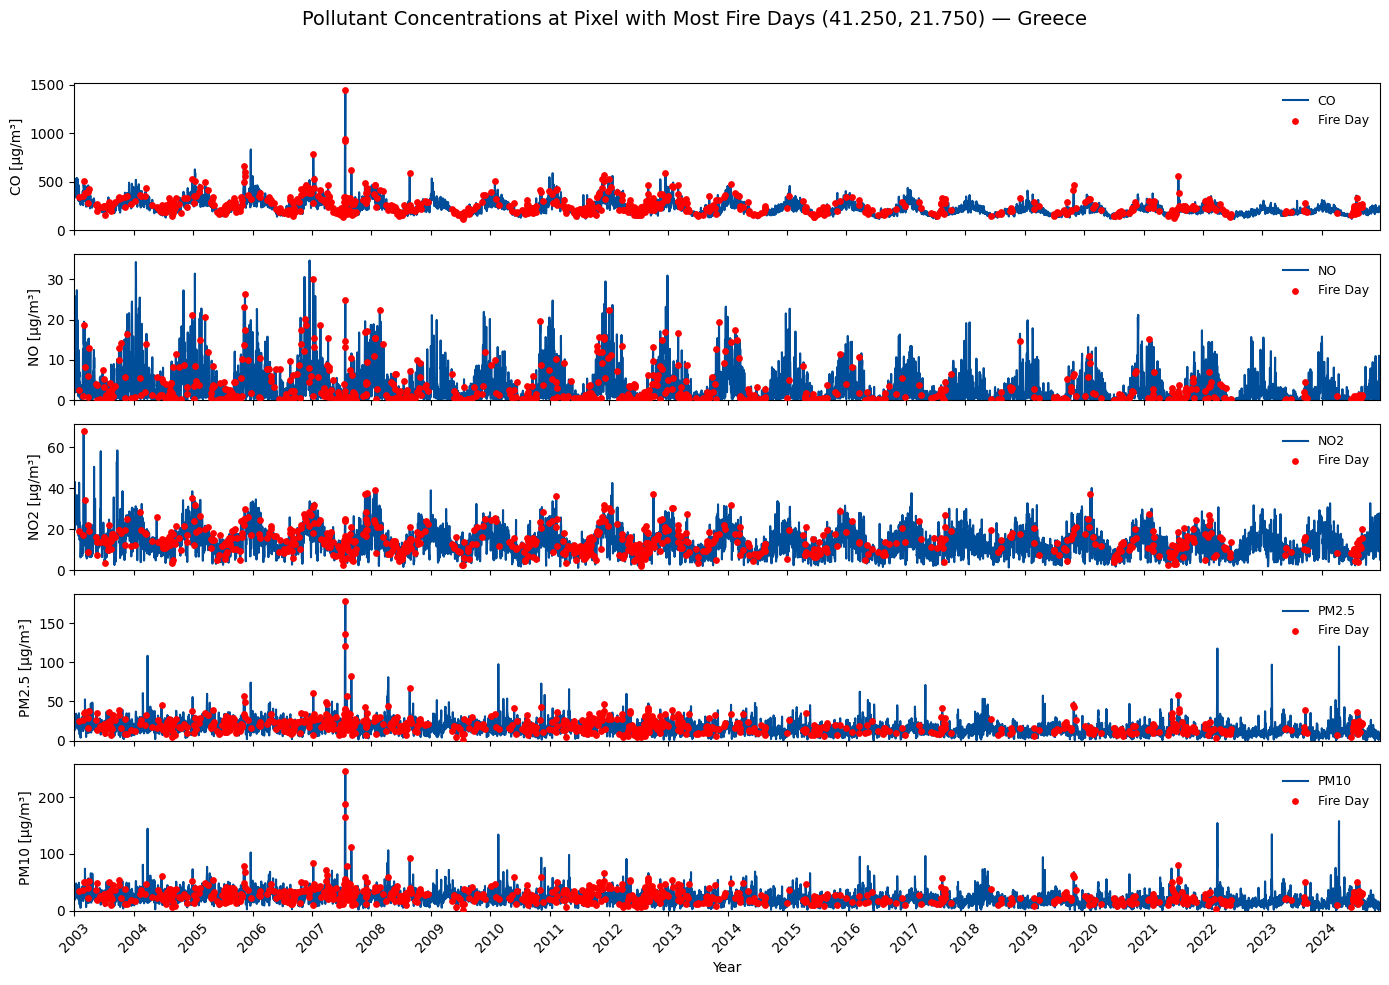

In [13]:
#Pixel with most fire days

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Find pixel with the most fire days ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Greece"]  # lat x lon x time

# Count fire days per pixel
fire_counts = fire_mask.sum(dim="time")  # 2D: lat x lon

# Find pixel with maximum fire days
iy, ix = np.unravel_index(np.argmax(fire_counts.values), fire_counts.shape)
lat_val = float(ds_sample["latitude"].values[iy])
lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel with most fire days at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 2: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Greece"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 3: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot pollutant line
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)

    # X-axis yearly ticks
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel with Most Fire Days ({lat_val:.3f}, {lon_val:.3f}) — Greece",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


Selected pixel at latitude=39.750, longitude=22.500


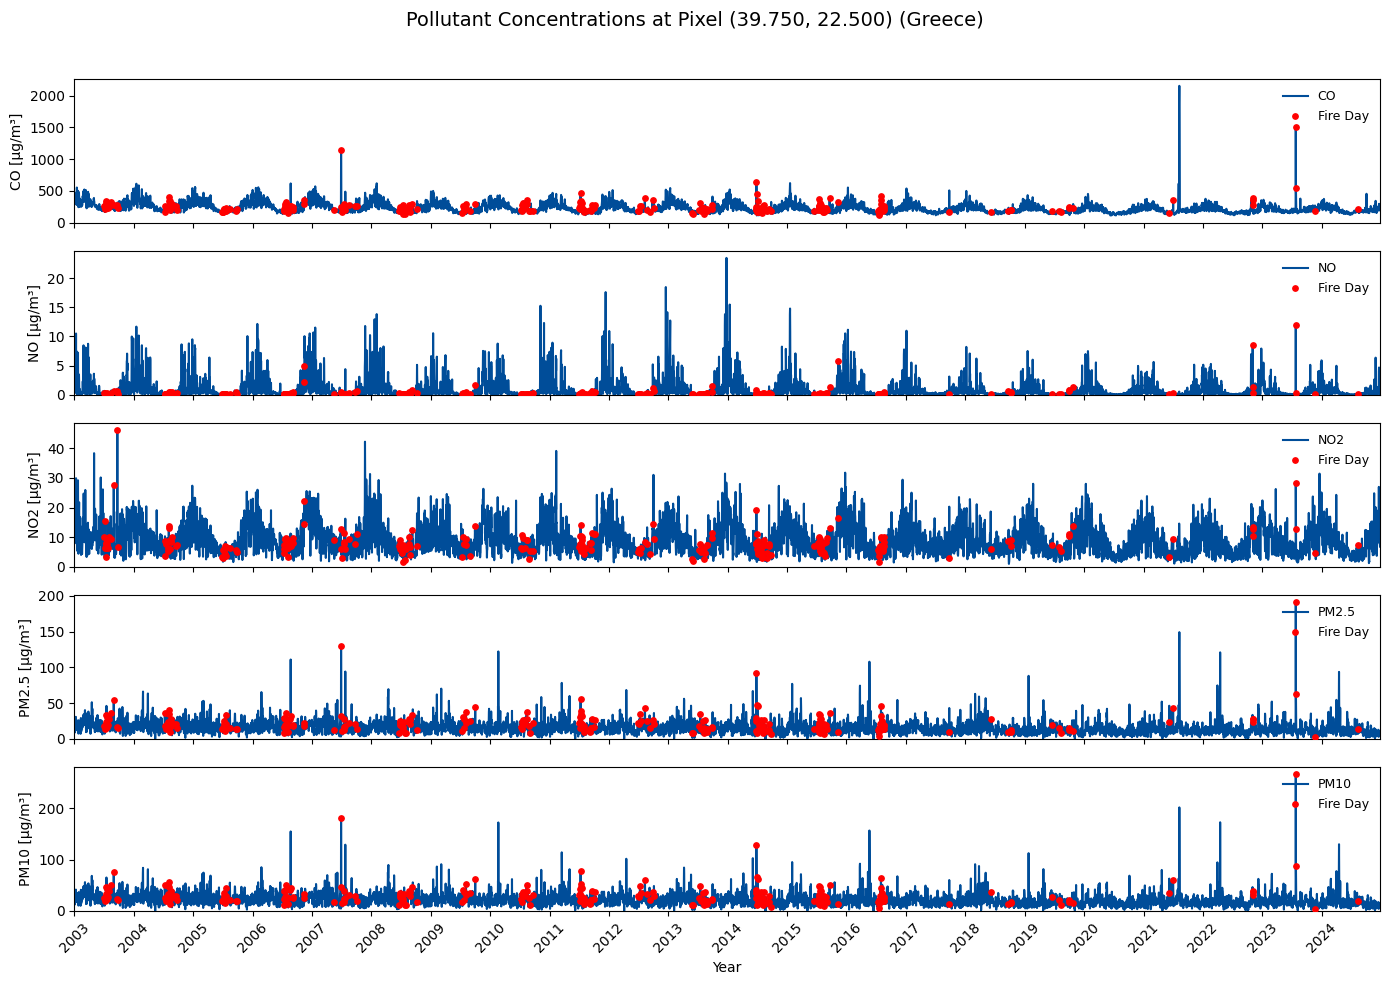

In [25]:
#Plots the pixel that is chosen

import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Input files
files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO2':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM2.5':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM10':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

# Units for each pollutant
# Adjust if your data uses different unit conventions
units = {
    "CO": "µg/m³",
    "PM2.5": "µg/m³",
    "PM10": "µg/m³",
    "NO2": "µg/m³",
    "NO": "µg/m³"
}

# --- STEP 1: Open a sample dataset ---
ds_sample = xr.open_dataset(files["CO"])
fire_mask = ds_sample["fire_binary_Greece"]

# Collapse over time to find pixels with fire at least once
fire_any = fire_mask.max(dim="time")

# Convert to numpy before np.argwhere
fire_pixels = np.argwhere(fire_any.values == 1)

if len(fire_pixels) == 0:
    raise ValueError("No pixels with fire found in dataset!")

# --- STEP 2: Choose pixel ---
# Option 1: manually by array index (iy, ix)
# iy, ix = 10, 15  # Example: replace with desired pixel indices

# Option 2: manually by latitude/longitude
lat_val = 39.75 # Example latitude
lon_val = 22.50  # Example longitude

# If using Option 1, convert indices to lat/lon:
# lat_val = float(ds_sample["latitude"].values[iy])
# lon_val = float(ds_sample["longitude"].values[ix])

print(f"Selected pixel at latitude={lat_val:.3f}, longitude={lon_val:.3f}")

# --- STEP 3: Extract time series for that pixel across pollutants ---
data_list = []

for pol_name, file_path in files.items():
    ds = xr.open_dataset(file_path)
    
    # Select pixel (nearest lat/lon)
    pollutant = ds["Mean"].sel(latitude=lat_val, longitude=lon_val, method="nearest")
    fire_flag = ds["fire_binary_Greece"].sel(latitude=lat_val, longitude=lon_val, method="nearest")

    # Convert CO to µg/m³
    if pol_name == "CO":
        pollutant = pollutant * 1000

    df = pd.DataFrame({
        "time": pollutant["time"].values,
        "pollutant_value": pollutant.values,
        "fire_flag": fire_flag.values,
        "pollutant": pol_name
    })
    data_list.append(df)

# Combine all pollutants into one dataframe
df_all = pd.concat(data_list, ignore_index=True)

# --- STEP 4: Plot time series ---
fig, axes = plt.subplots(len(files), 1, figsize=(14, 10), sharex=True)

line_color = "#004D99"  # single color for all pollutants
fire_color = "red"

for i, pol_name in enumerate(files.keys()):
    df_pol = df_all[df_all["pollutant"] == pol_name]
    ax = axes[i]

    # Remove NaNs for plotting
    y_values = df_pol["pollutant_value"].values
    y_values_clean = y_values[~np.isnan(y_values)]
    time_clean = df_pol["time"].values[~np.isnan(y_values)]

    # Plot line (behind)
    ax.plot(
        time_clean,
        y_values_clean,
        color=line_color,
        linewidth=1.5,
        label=f"{pol_name}",
        zorder=1
    )

    # Fire days on top
    fire_days = df_pol[df_pol["fire_flag"] == 1]
    ax.scatter(
        fire_days["time"],
        fire_days["pollutant_value"],
        color=fire_color,
        s=15,
        label="Fire Day",
        zorder=3
    )

    # Labels & legend
    ax.set_ylabel(f"{pol_name} [{units[pol_name]}]")
    ax.legend(loc="upper right", fontsize=9, frameon=False)

    # No gridlines
    ax.grid(False)

    # Tight x-axis to data range
    ax.set_xlim(df_pol["time"].min(), df_pol["time"].max())

    # Y-axis starts at 0, top slightly above max
    if len(y_values_clean) > 0:
        ax.set_ylim(bottom=0, top=np.nanmax(y_values_clean) * 1.05)
    else:
        ax.set_ylim(bottom=0, top=1)  # fallback if no data

    # Set x-axis ticks to show every year
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Rotate year labels for clarity
plt.xticks(rotation=45)
axes[-1].set_xlabel("Year")

plt.suptitle(
    f"Pollutant Concentrations at Pixel ({lat_val:.3f}, {lon_val:.3f}) (Greece)",
    fontsize=14
)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


## Pearson correlation performed between meteorological variables and air pollutants, for all days and every label established

Understanding the p-values

Null hypothesis (H₀): There is no correlation between the variables.

Alternative hypothesis (H₁): There is a correlation.

p-value: Probability of observing the correlation (or more extreme) if H₀ is true.

Interpretation rule of thumb:

p < 0.05 → significant: reject the null → correlation is likely real.

p ≥ 0.05 → not significant: cannot reject the null → correlation might be due to chance.

..................................

How to read weak vs strong correlations

|r| < 0.1 → negligible

0.1 ≤ |r| < 0.3 → weak

0.3 ≤ |r| < 0.5 → moderate

|r| ≥ 0.5 → strong

### Portugal

#### Daily

Correlation results for temp_Max saved to CSV.


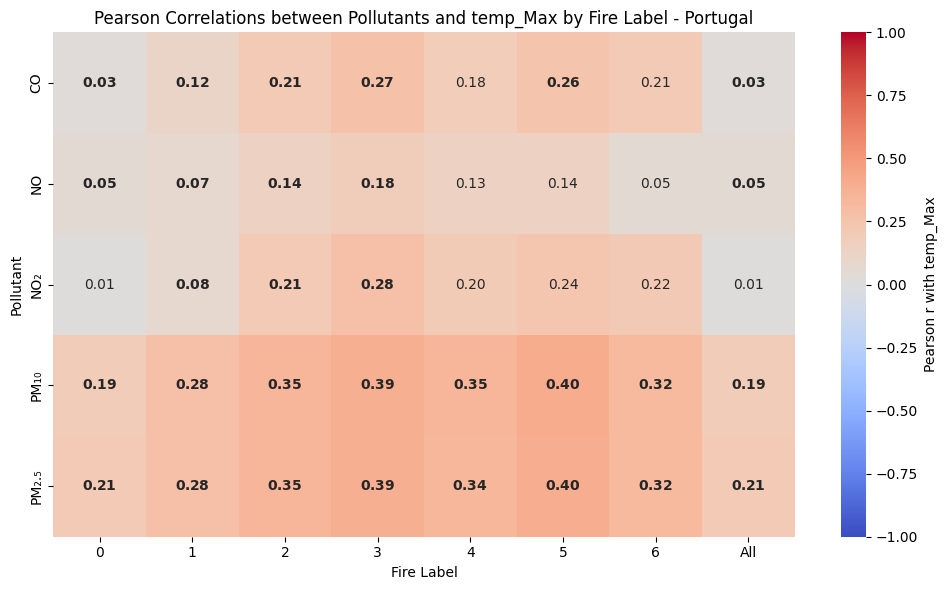

Correlation results for precip_Total_Precipitation saved to CSV.


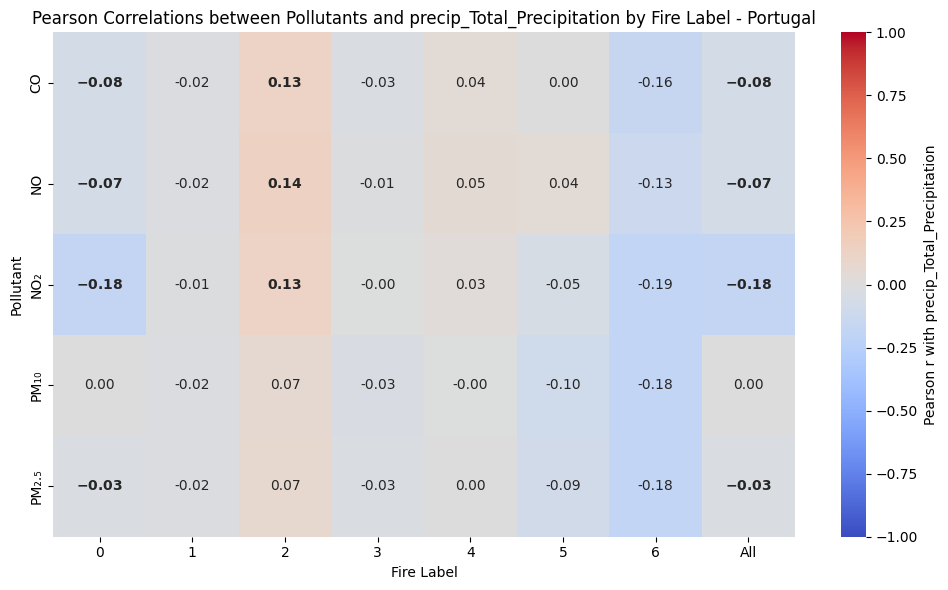

Correlation results for wind_Max saved to CSV.


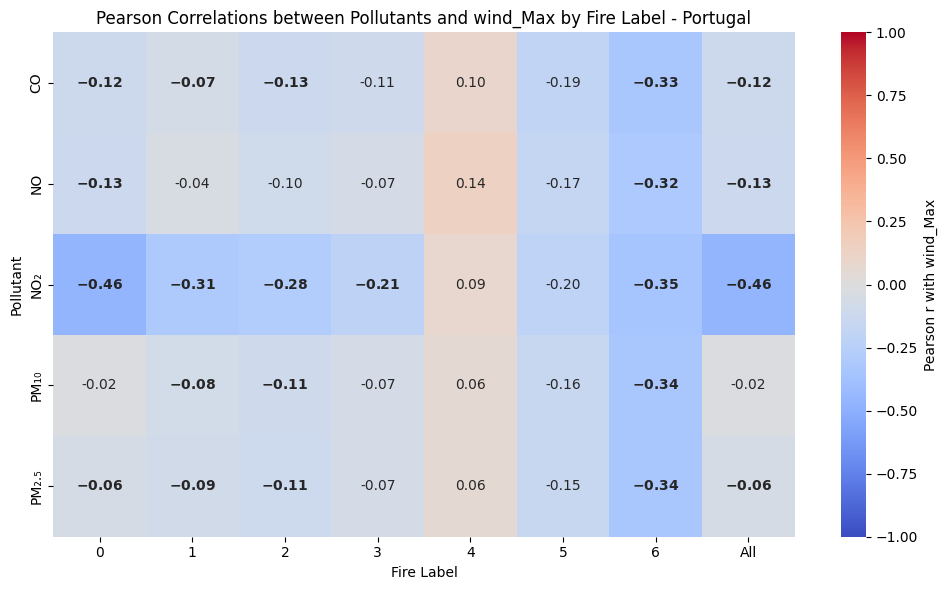

In [26]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only create once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_label_Portugal.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var}'}
    )
    plt.title(f"Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Portugal")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


Correlation results for temp_Max saved to CSV.


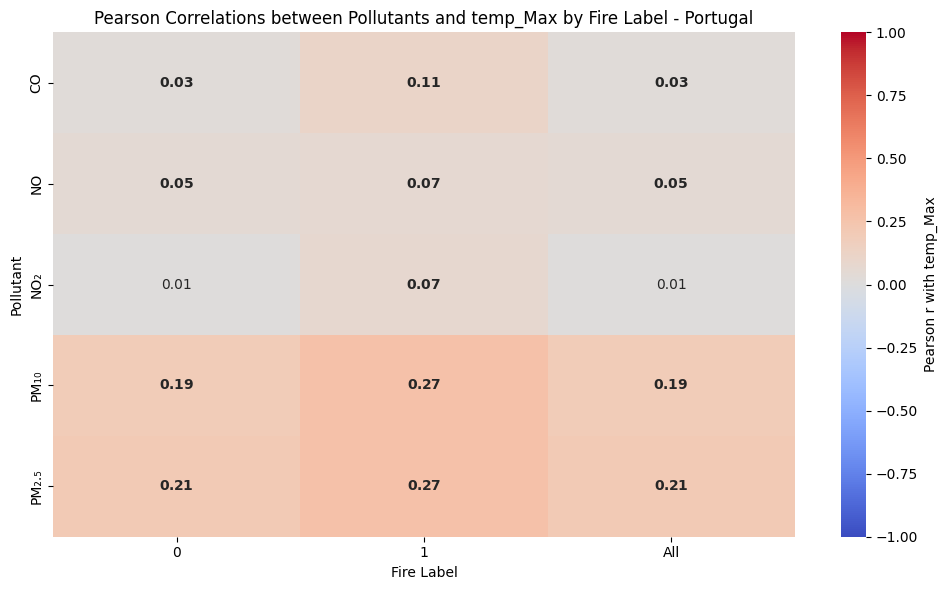

Correlation results for precip_Total_Precipitation saved to CSV.


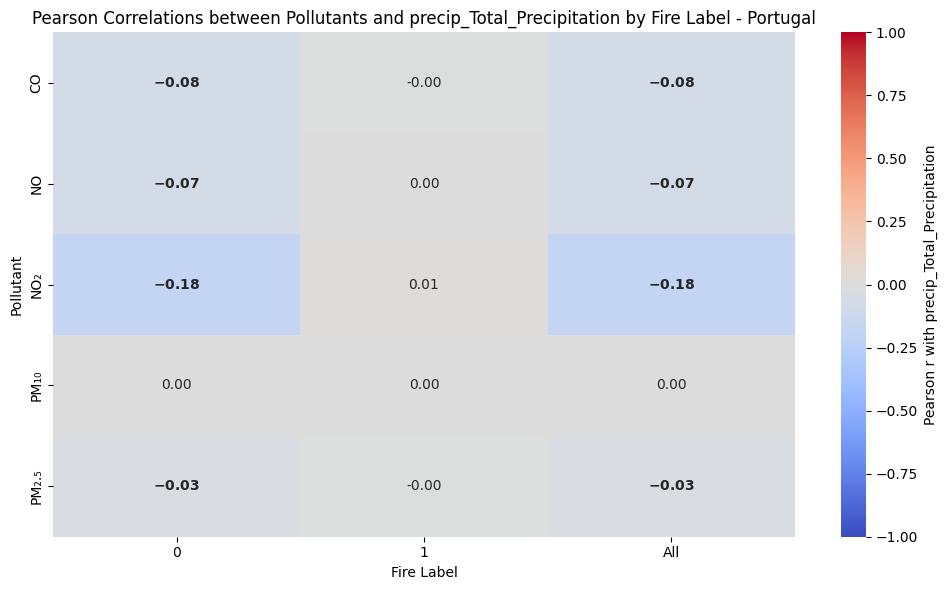

Correlation results for wind_Max saved to CSV.


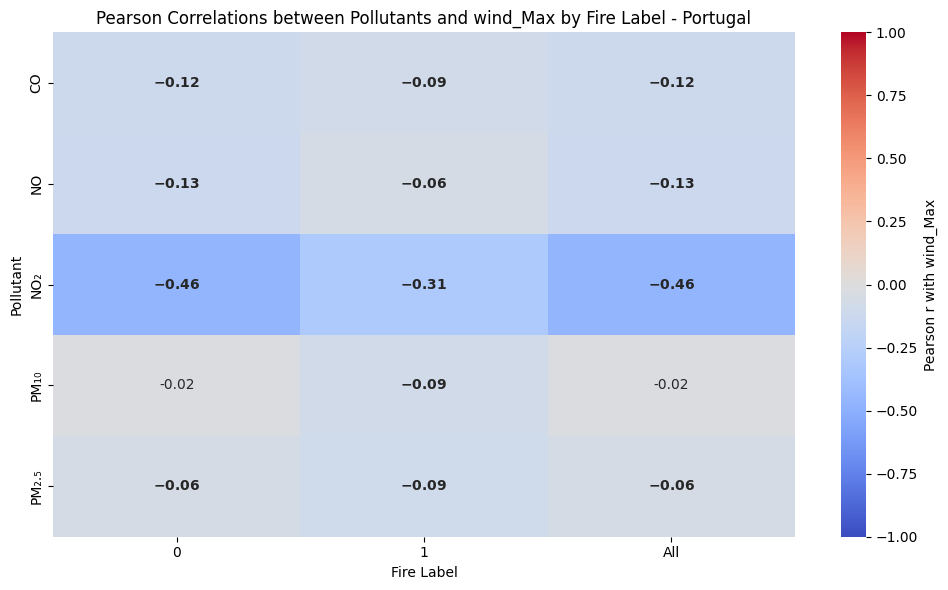

In [27]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only create once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_binary_Portugal.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var}'}
    )
    plt.title(f"Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Portugal")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


#### Monthly

C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


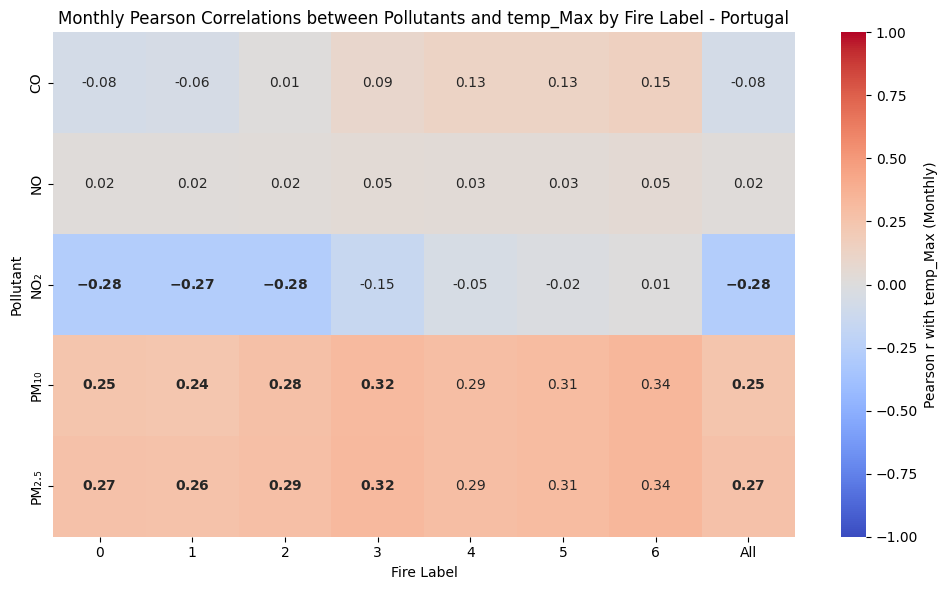

Monthly correlation results for precip_Total_Precipitation saved to CSV.


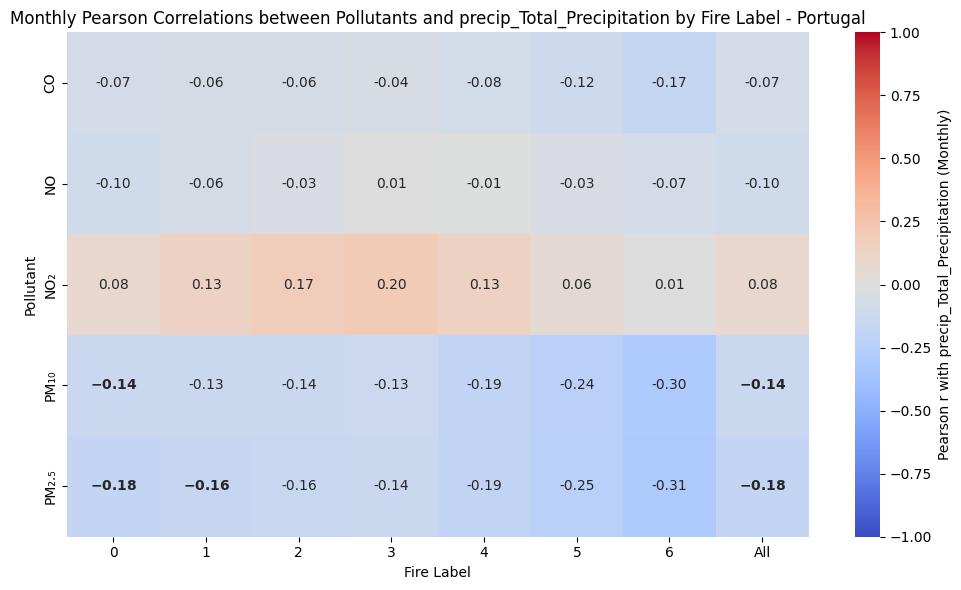

Monthly correlation results for wind_Max saved to CSV.


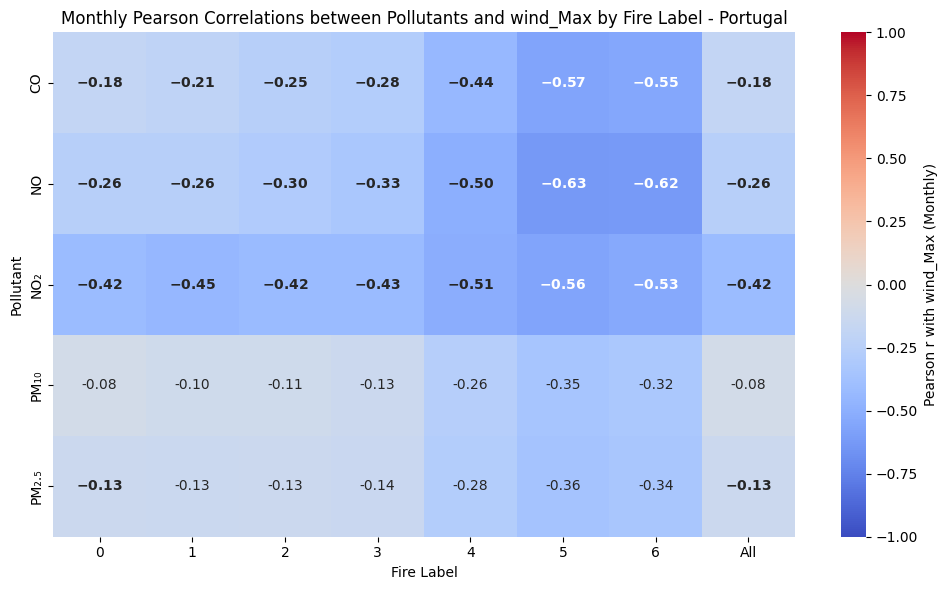

In [28]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Portugal.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Portugal")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


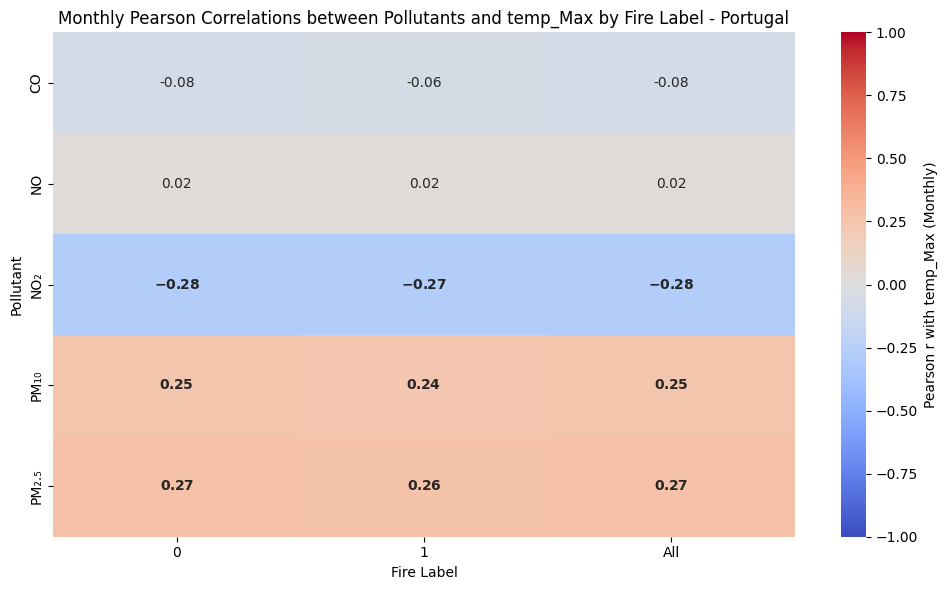

Monthly correlation results for precip_Total_Precipitation saved to CSV.


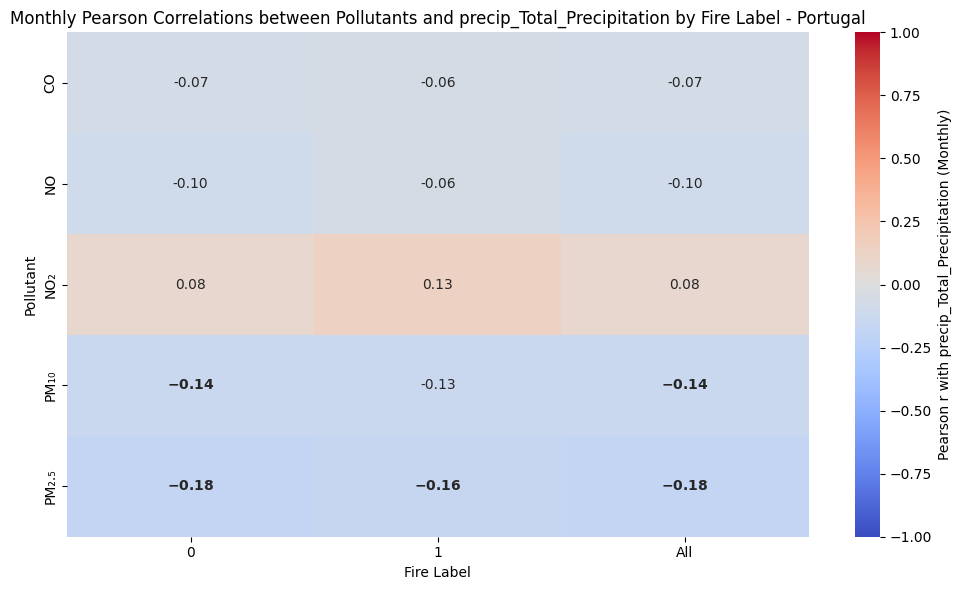

Monthly correlation results for wind_Max saved to CSV.


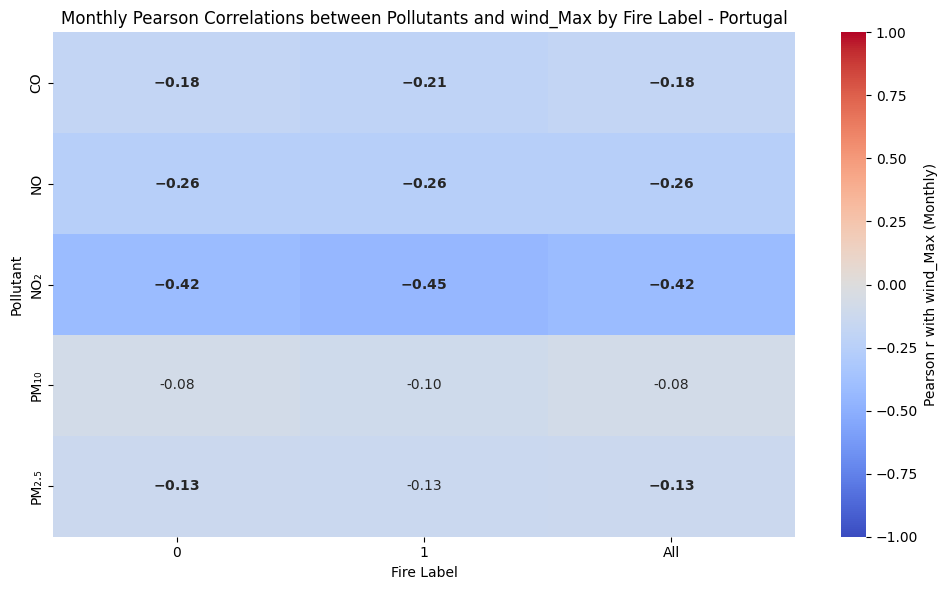

In [29]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Portugal.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Portugal")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


### Spain

#### Daily

Correlation results for temp_Max saved to CSV.


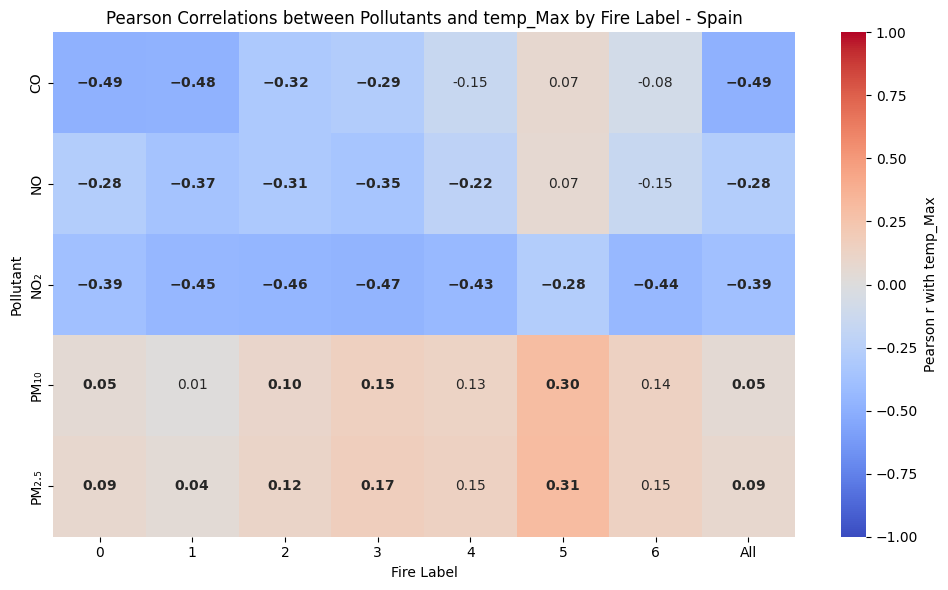

Correlation results for precip_Total_Precipitation saved to CSV.


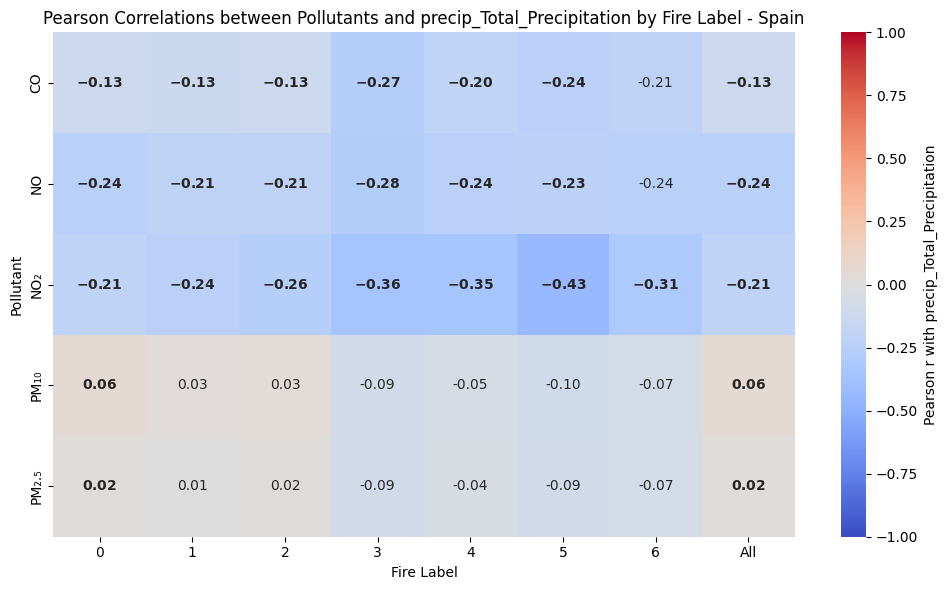

Correlation results for wind_Max saved to CSV.


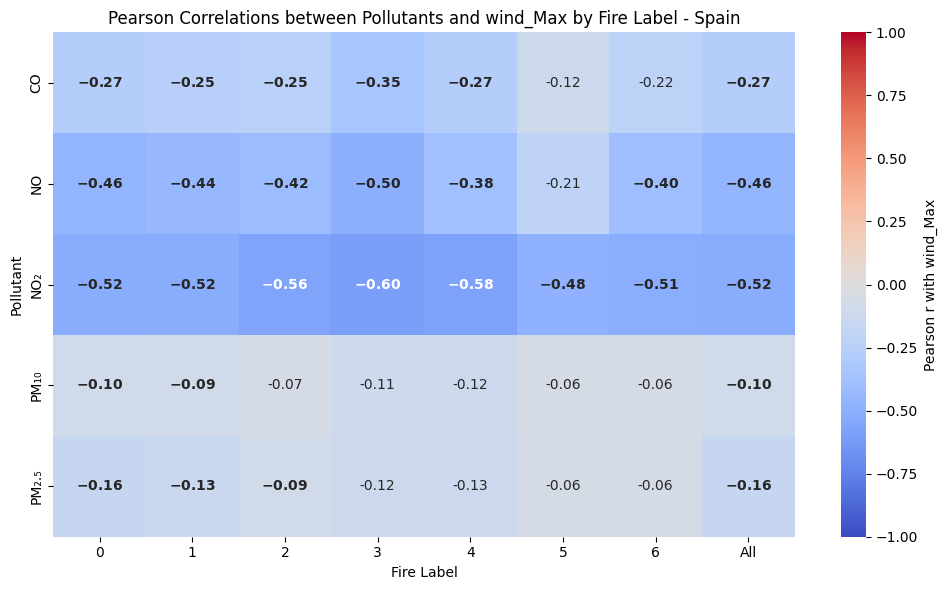

In [30]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Spain (also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only create once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Spain
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Spain"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_label_Spain.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var}'}
    )
    plt.title(f"Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Spain")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


Correlation results for temp_Max saved to CSV.


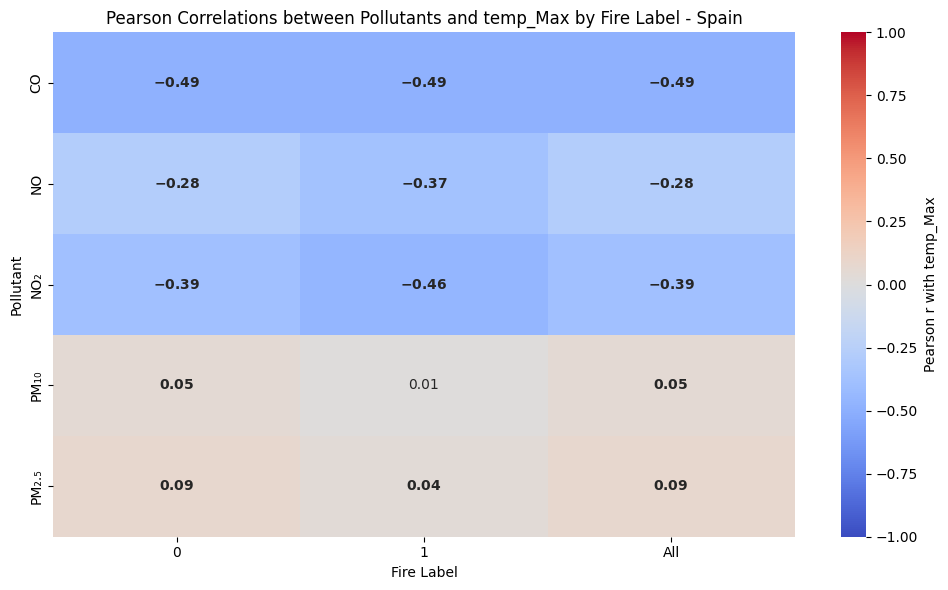

Correlation results for precip_Total_Precipitation saved to CSV.


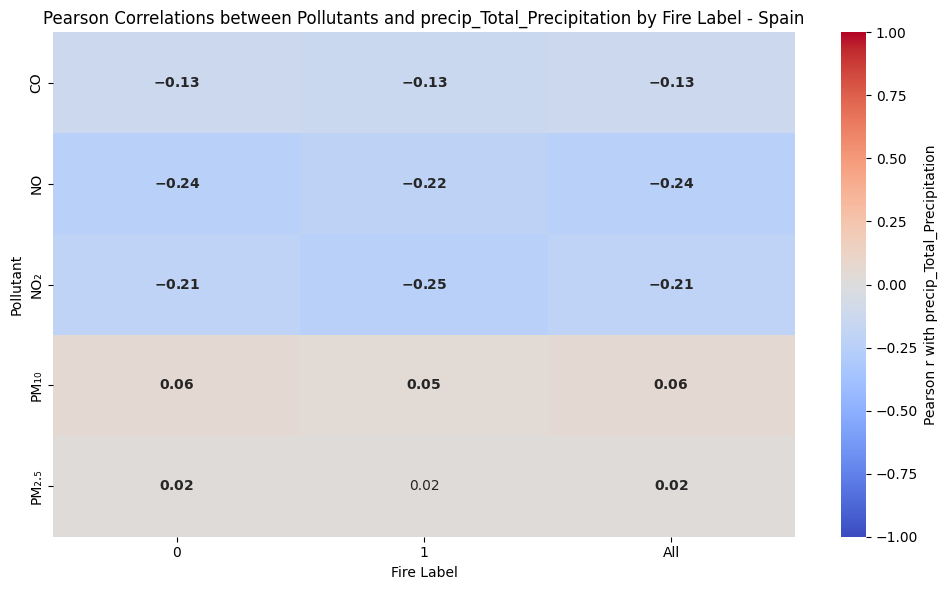

Correlation results for wind_Max saved to CSV.


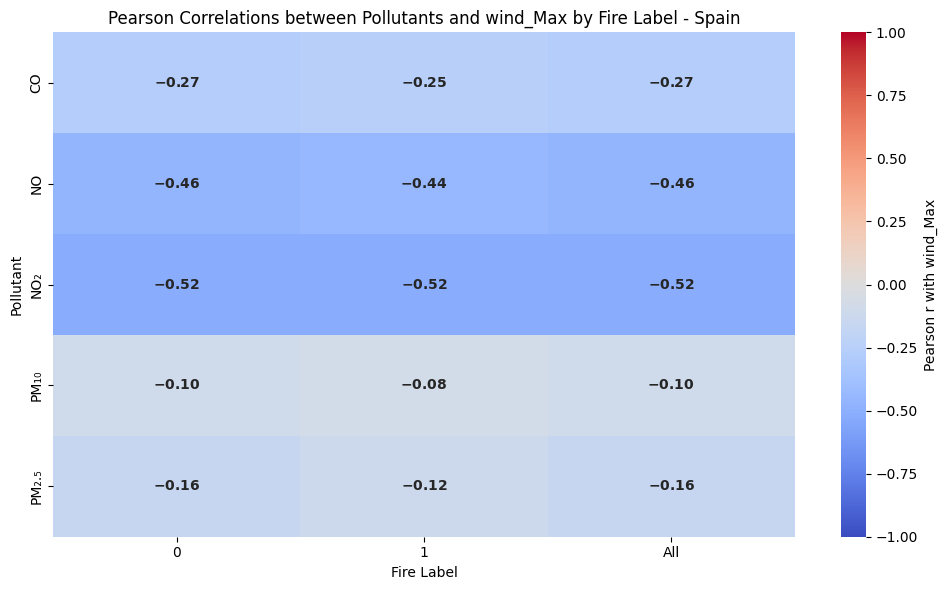

In [31]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Spain (also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only create once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Spain
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Spain"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_binary_Spain.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var}'}
    )
    plt.title(f"Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Spain")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


#### Monthly

C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


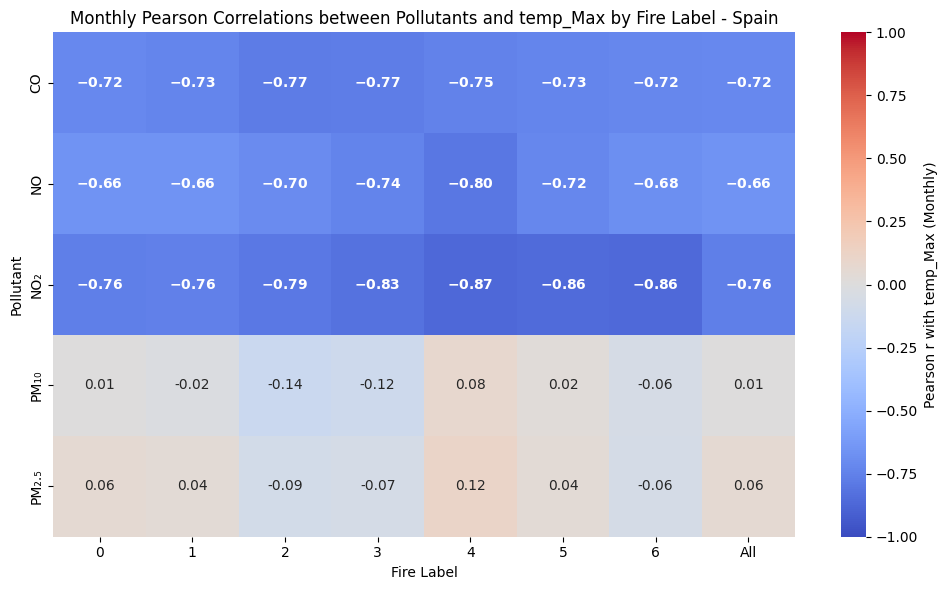

Monthly correlation results for precip_Total_Precipitation saved to CSV.


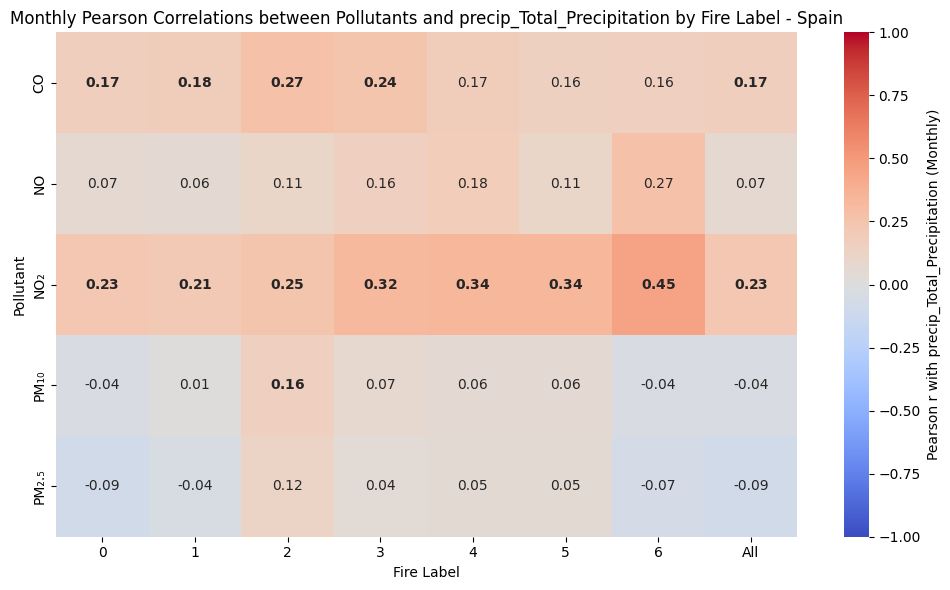

Monthly correlation results for wind_Max saved to CSV.


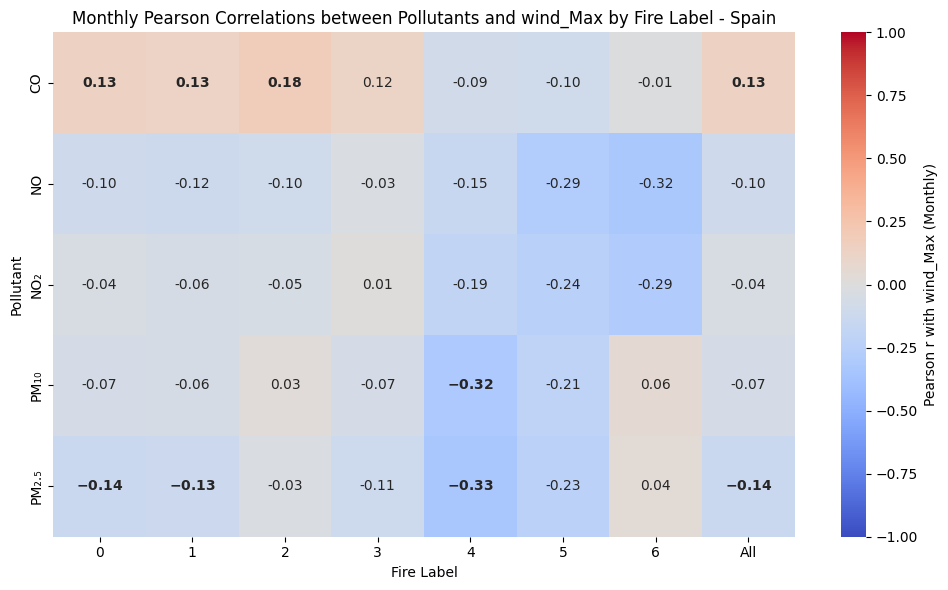

In [32]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Spain"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Spain.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Spain")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


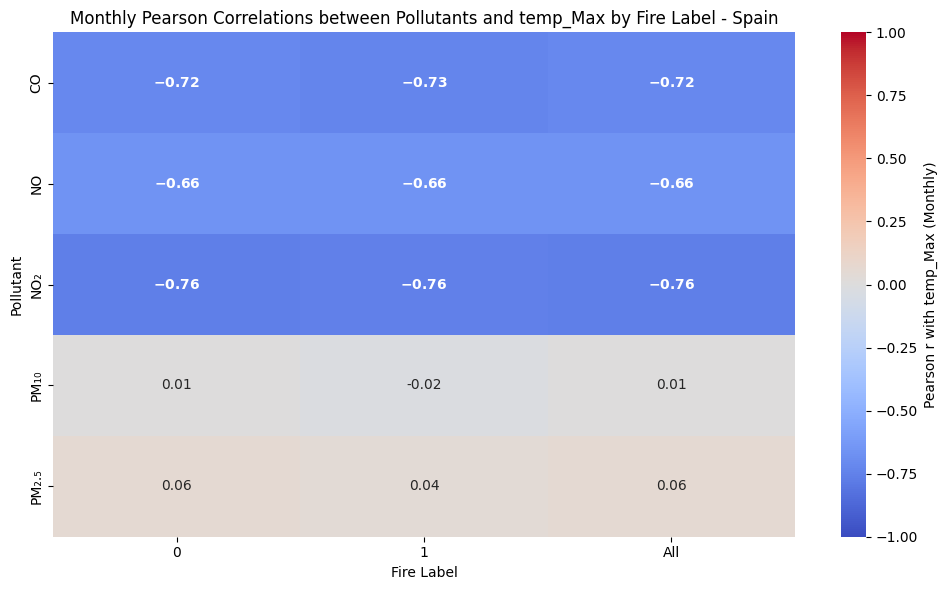

Monthly correlation results for precip_Total_Precipitation saved to CSV.


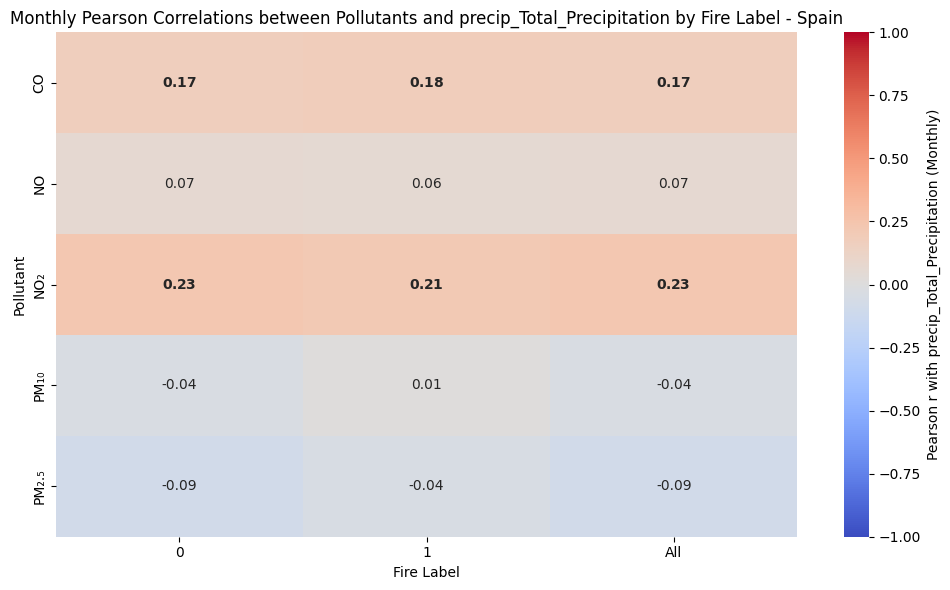

Monthly correlation results for wind_Max saved to CSV.


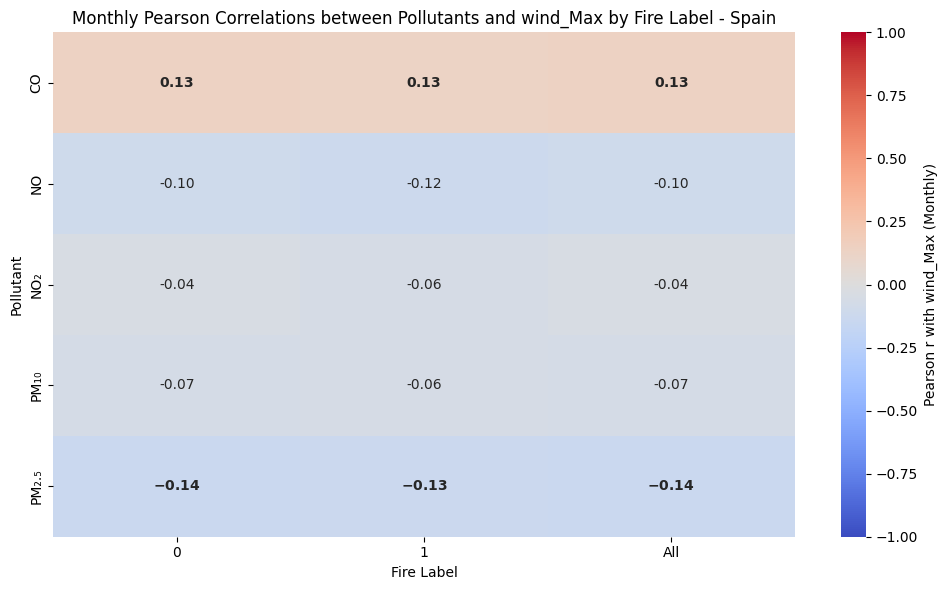

In [33]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Spain"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Spain.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Spain")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


### Iberia

#### Daily

Correlation results for temp_Max saved to CSV.


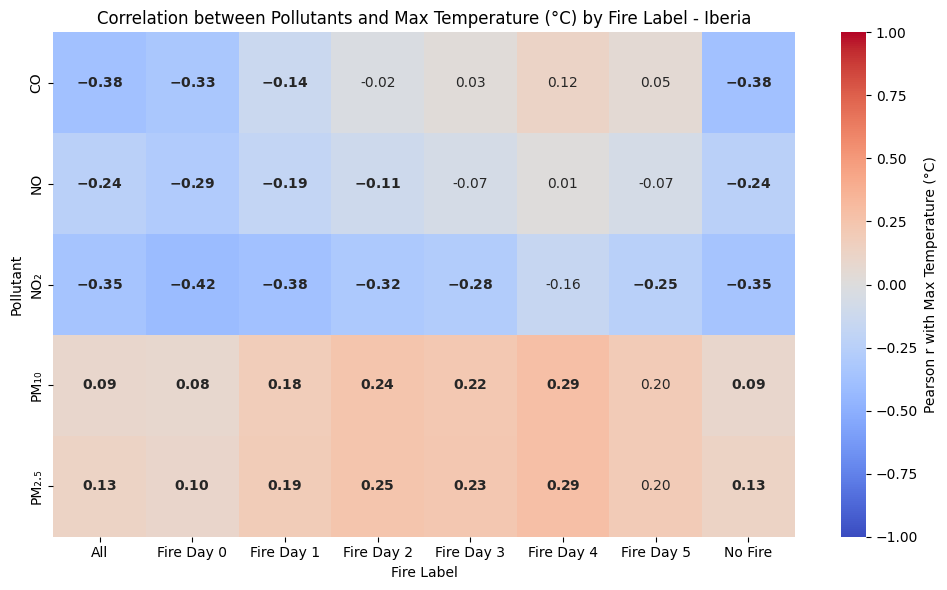

Correlation results for precip_Total_Precipitation saved to CSV.


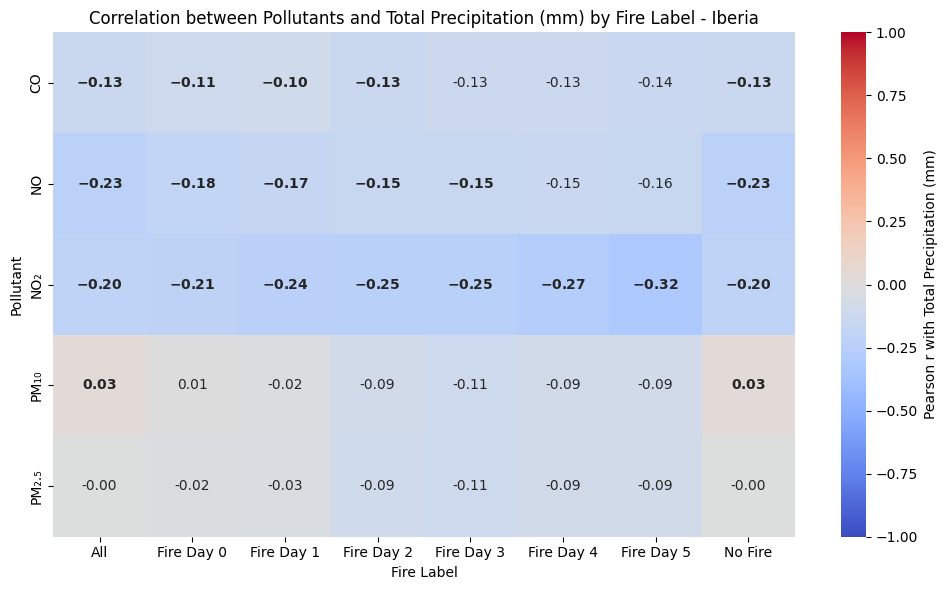

Correlation results for wind_Max saved to CSV.


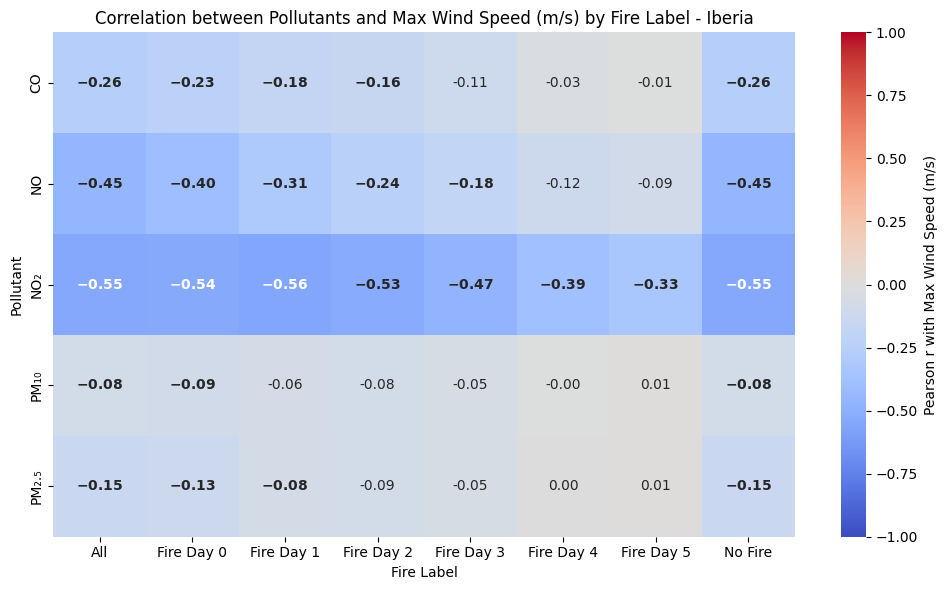

In [17]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Iberia (Portugal + Spain combined)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}


for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Iberia
# --------------------
# Assume the variable is 'fire_label_Iberia' in combined datasets
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Iberia"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_label_Iberia.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo}'}
    )
    plt.title(f"Correlation between Pollutants and {pretty_meteo} by Fire Label - Iberia")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


Correlation results for temp_Max saved to CSV.


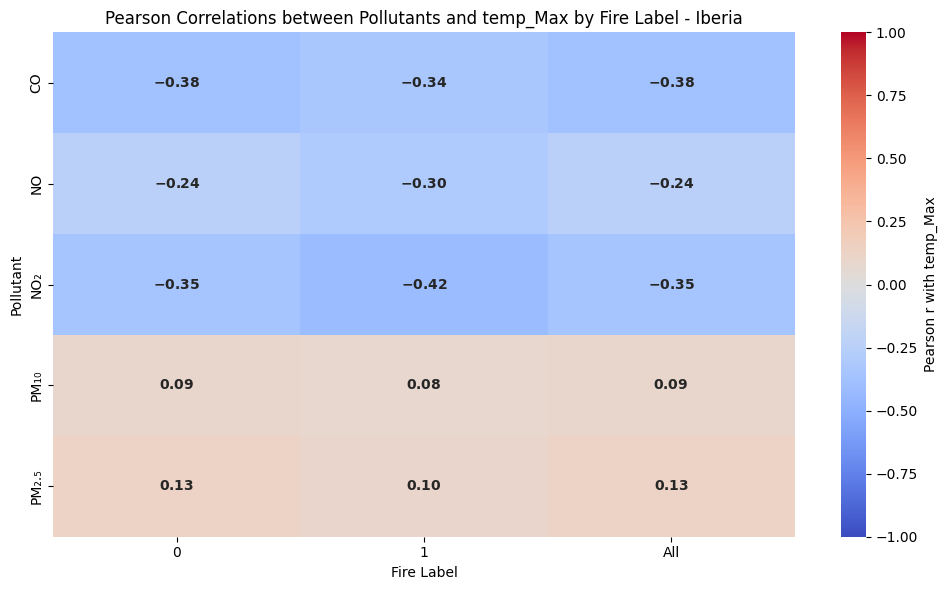

Correlation results for precip_Total_Precipitation saved to CSV.


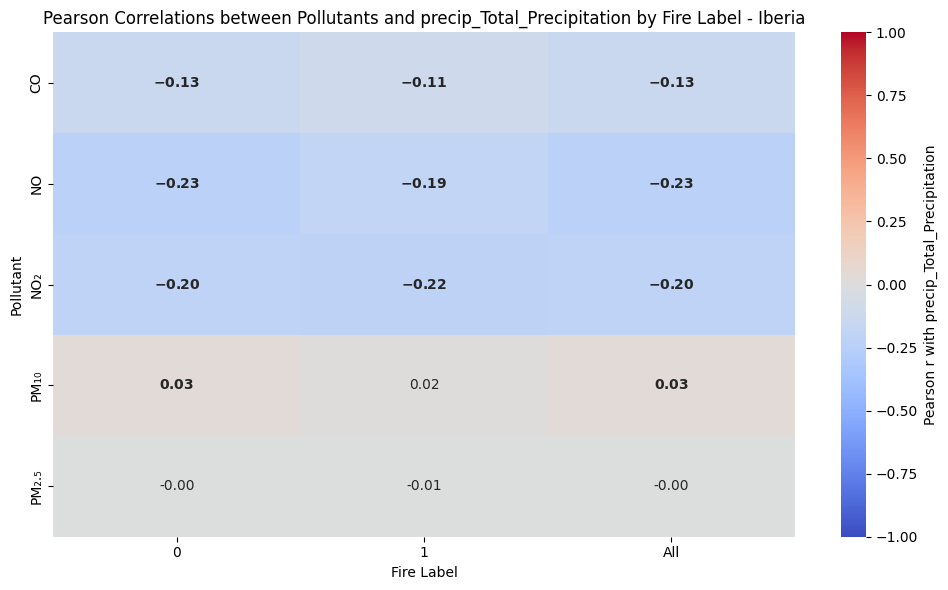

Correlation results for wind_Max saved to CSV.


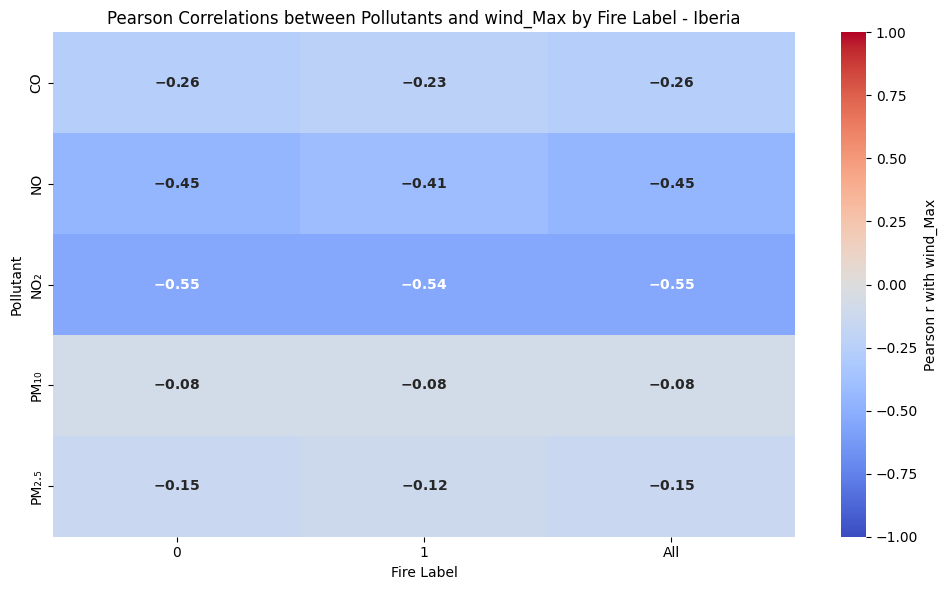

In [21]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Iberia (Portugal + Spain combined)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Iberia
# --------------------
# Assume the variable is 'fire_label_Iberia' in combined datasets
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Iberia"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_binary_Iberia.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var}'}
    )
    plt.title(f"Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Iberia")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


#### Monthly

C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


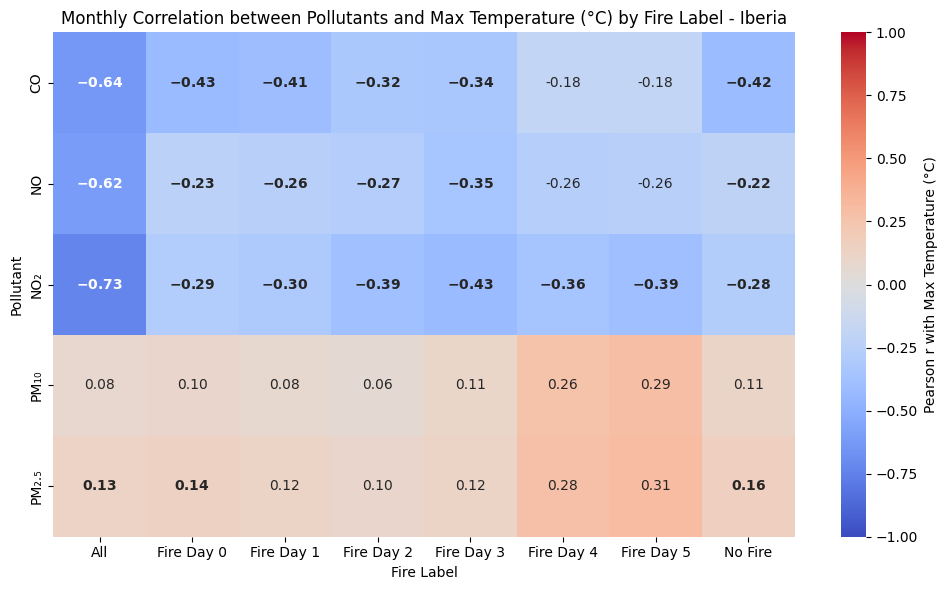

Monthly correlation results for precip_Total_Precipitation saved to CSV.


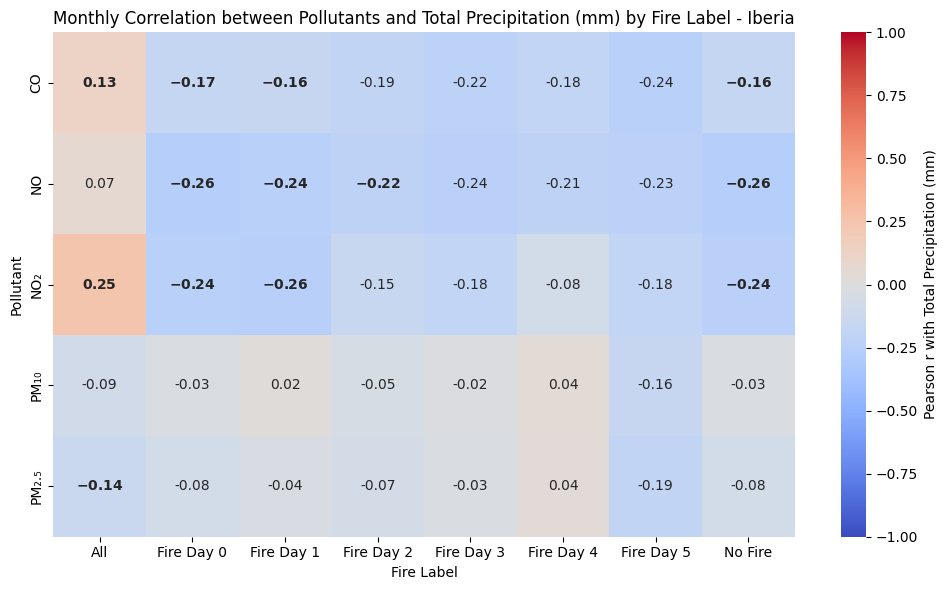

Monthly correlation results for wind_Max saved to CSV.


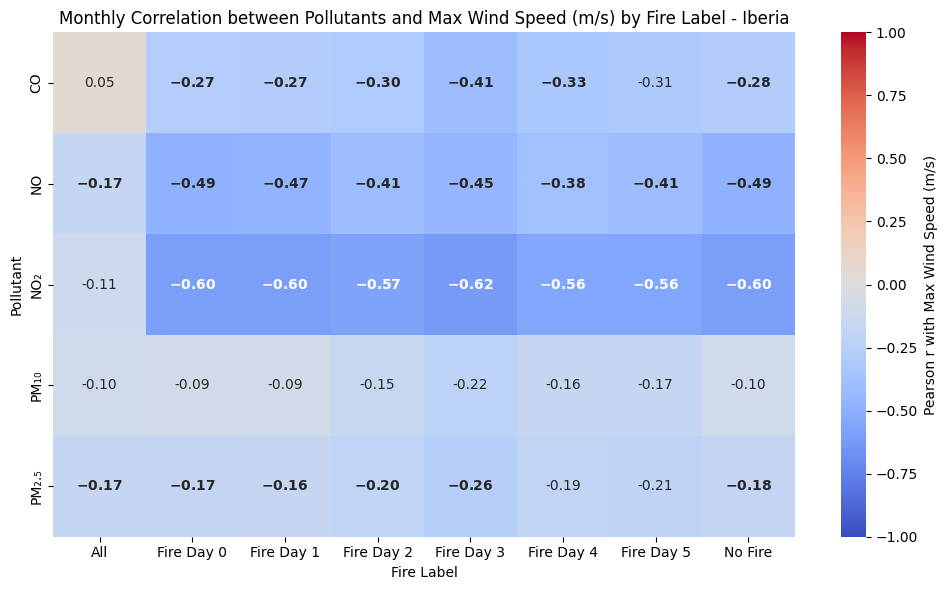

In [22]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Iberia"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Iberia.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo}'}
    )
    plt.title(f"Monthly Correlation between Pollutants and {pretty_meteo} by Fire Label - Iberia")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


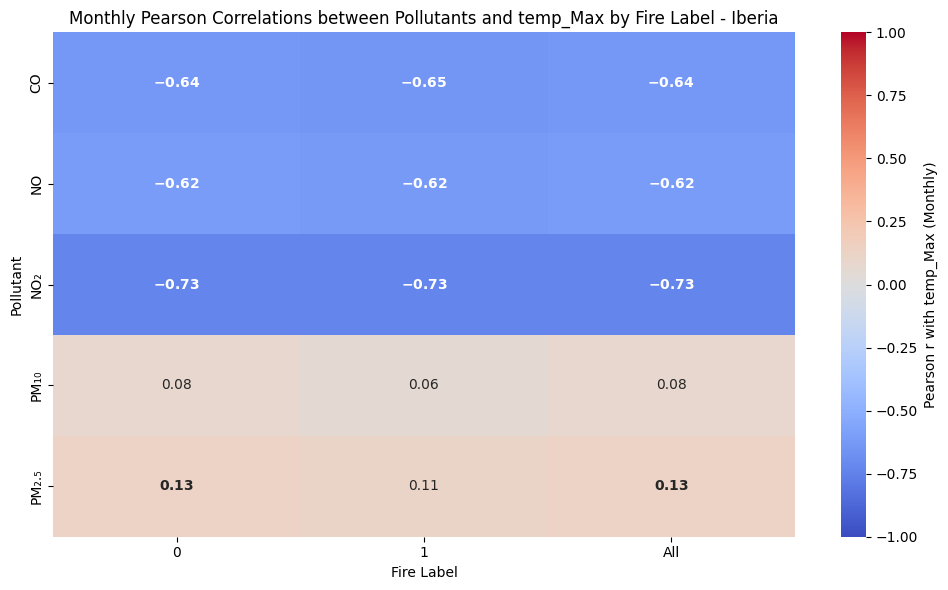

Monthly correlation results for precip_Total_Precipitation saved to CSV.


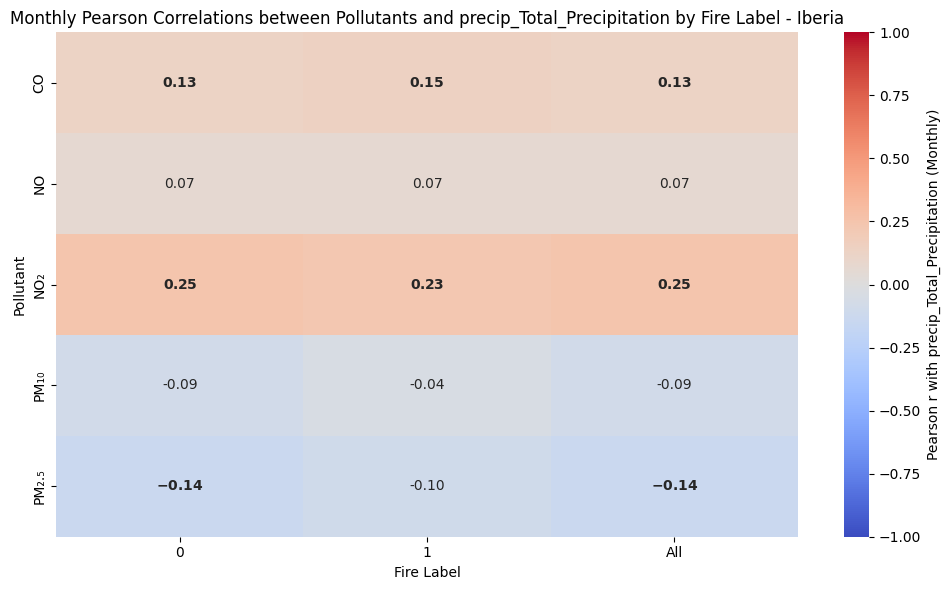

Monthly correlation results for wind_Max saved to CSV.


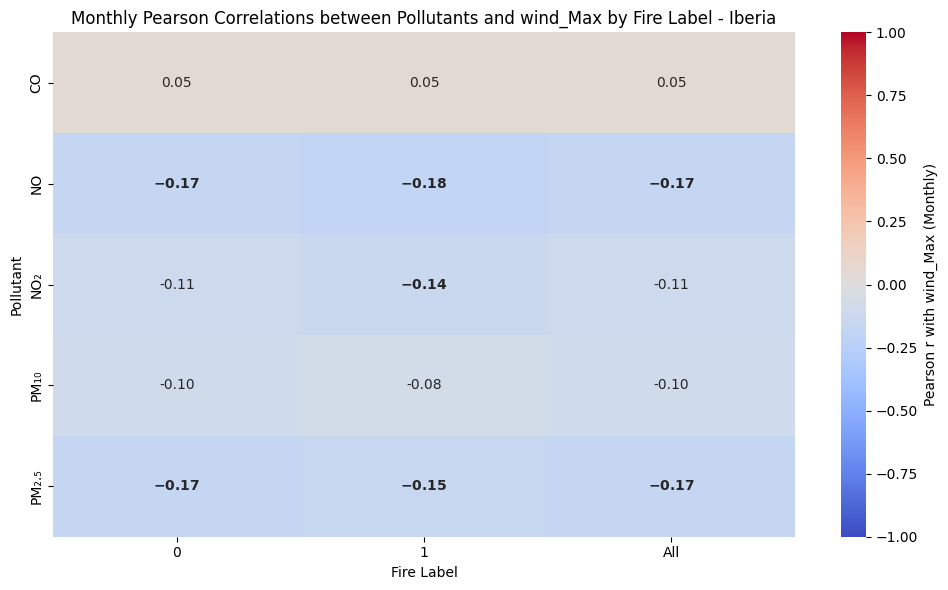

In [37]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Iberia"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Iberia.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Iberia")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


### Italy

#### Daily

Correlation results for temp_Max saved to CSV.


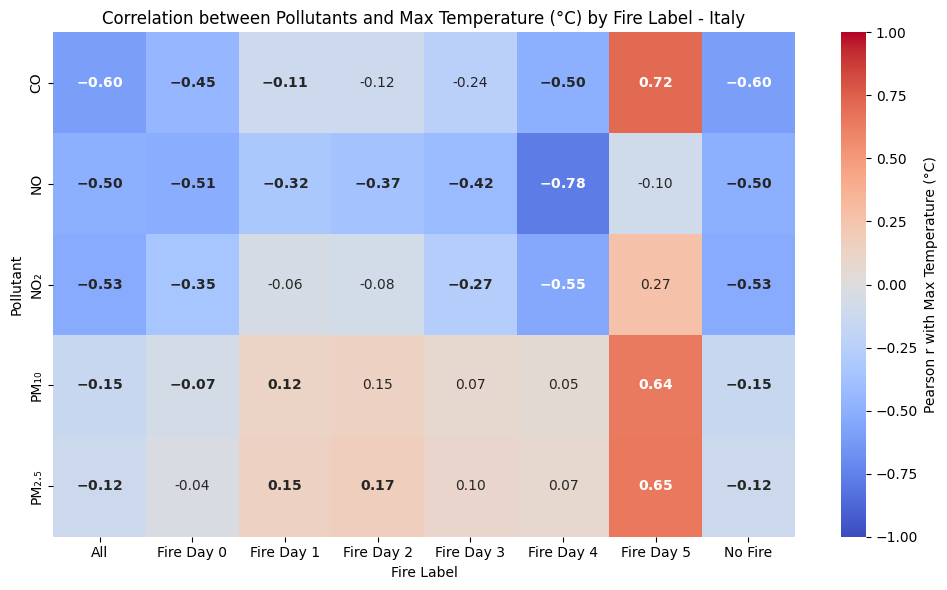

Correlation results for precip_Total_Precipitation saved to CSV.


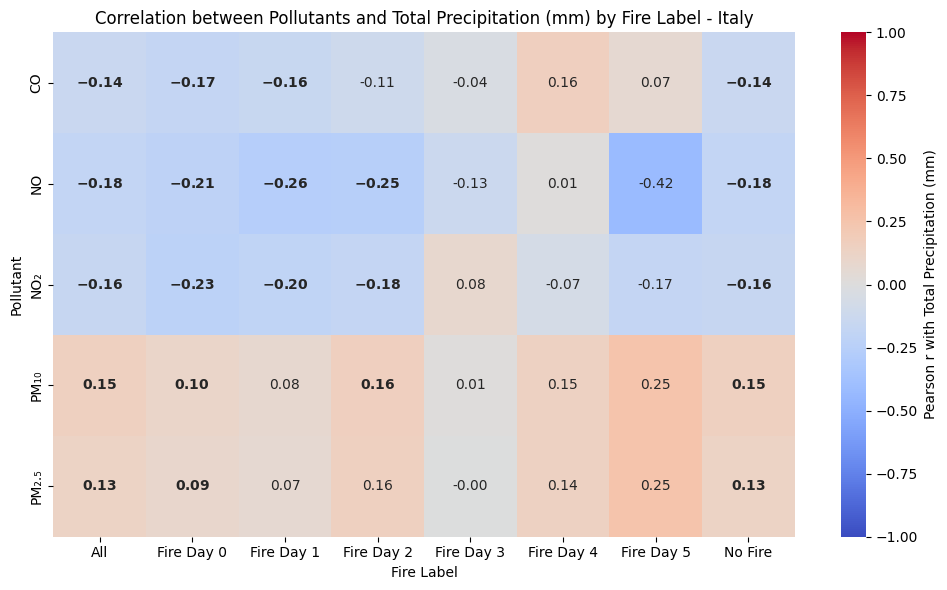

Correlation results for wind_Max saved to CSV.


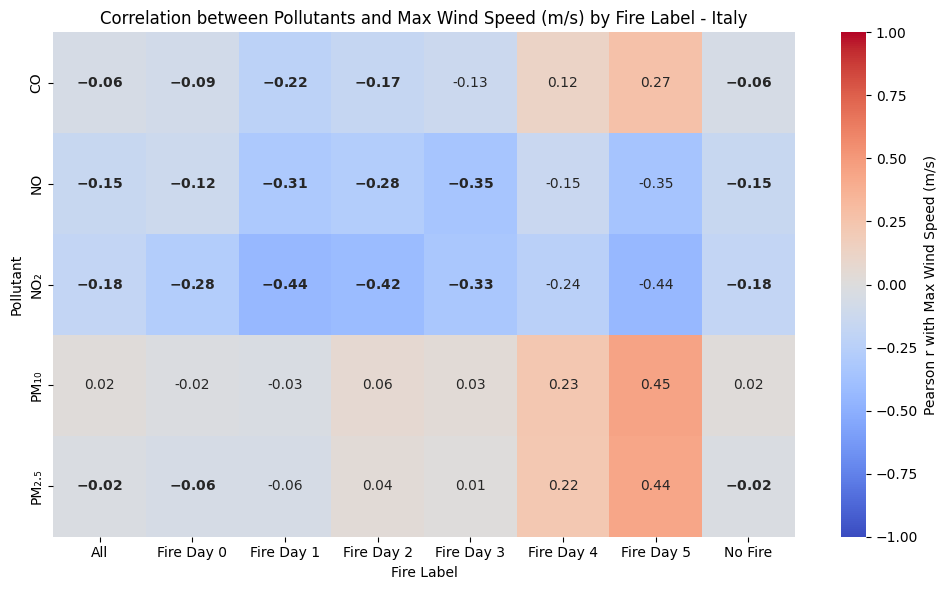

In [23]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Italy (also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Italy
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Italy"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_label_Italy.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo}'}
    )
    plt.title(f"Correlation between Pollutants and {pretty_meteo} by Fire Label - Italy")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


Correlation results for temp_Max saved to CSV.


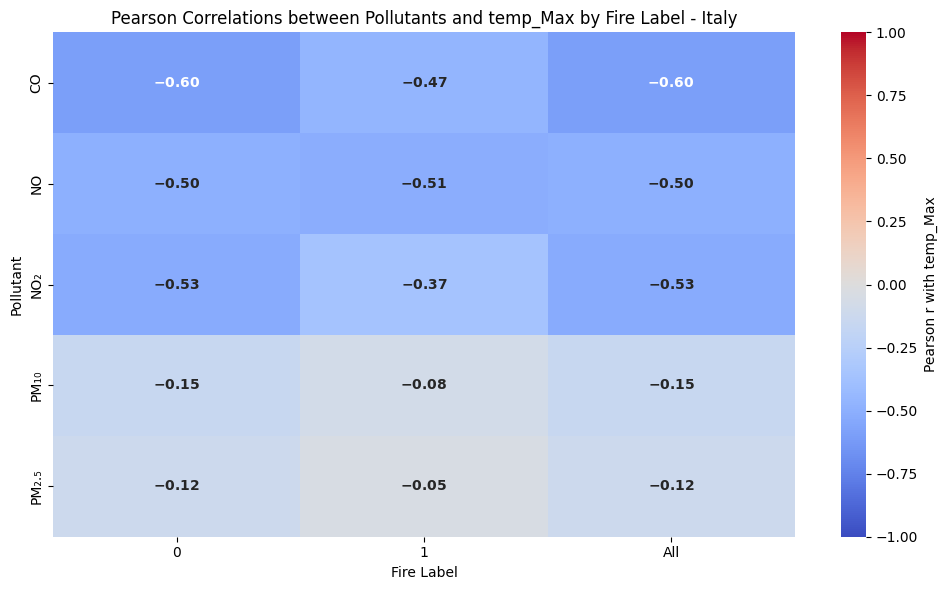

Correlation results for precip_Total_Precipitation saved to CSV.


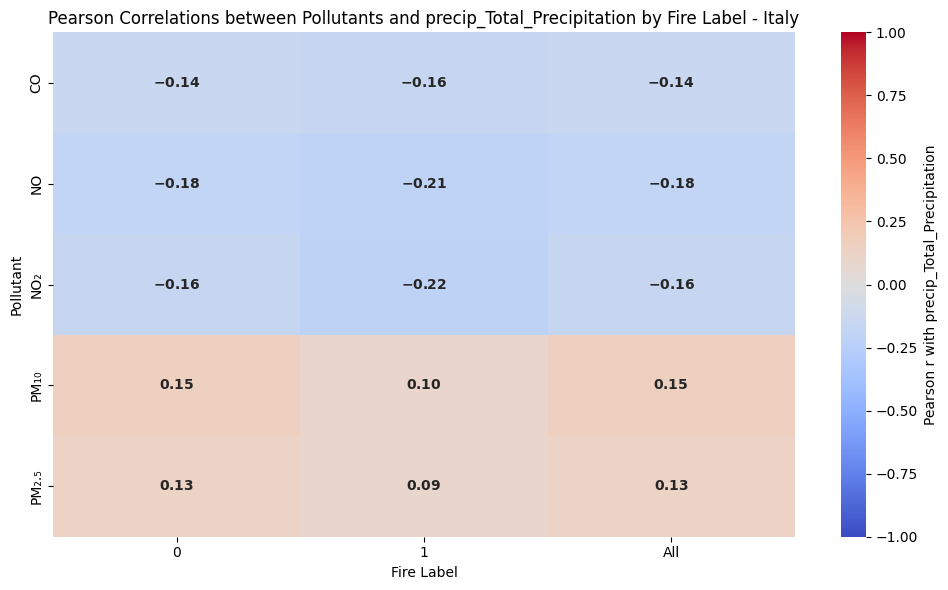

Correlation results for wind_Max saved to CSV.


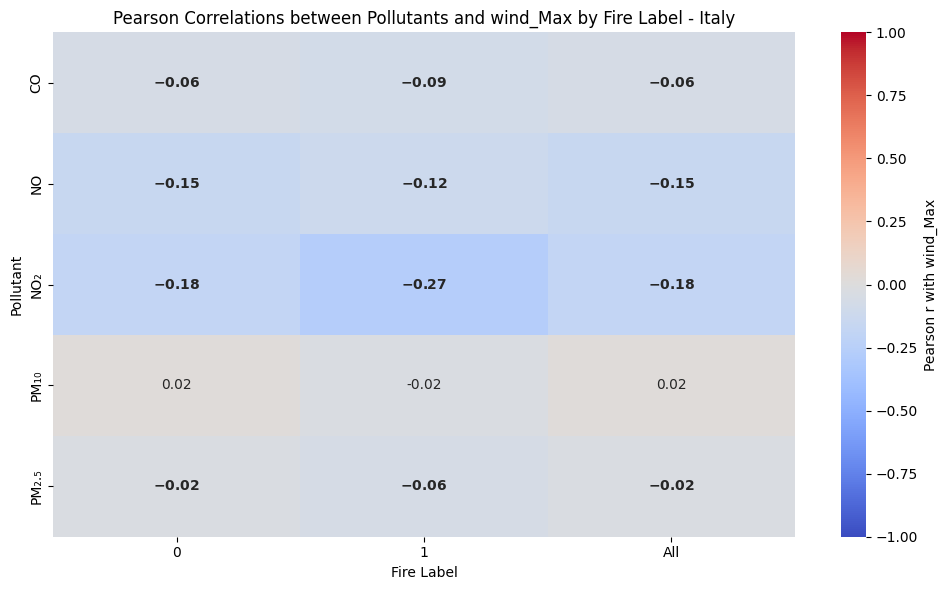

In [39]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Italy (also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Italy
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Italy"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_binary_Italy.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var}'}
    )
    plt.title(f"Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Italy")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


#### Monthly

C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


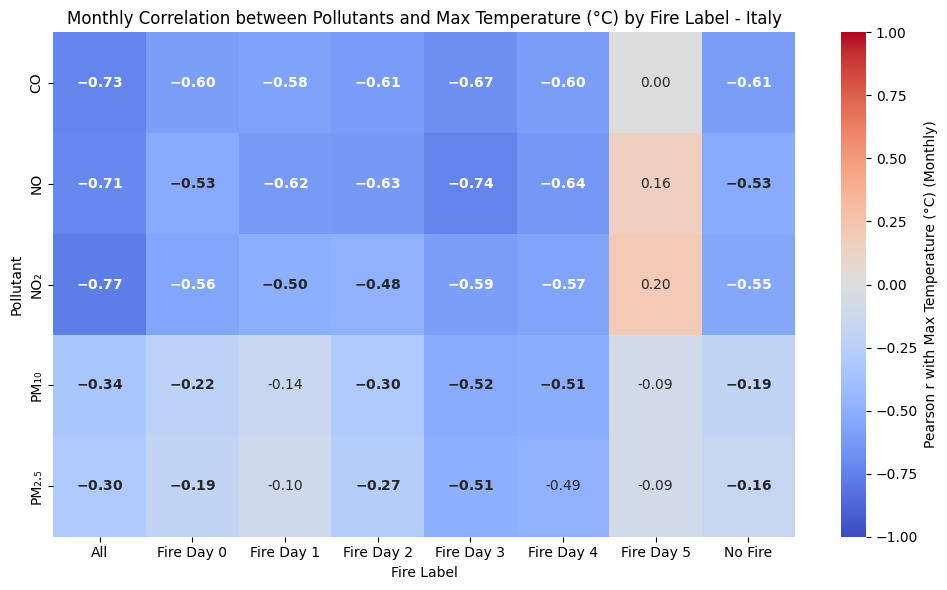

Monthly correlation results for precip_Total_Precipitation saved to CSV.


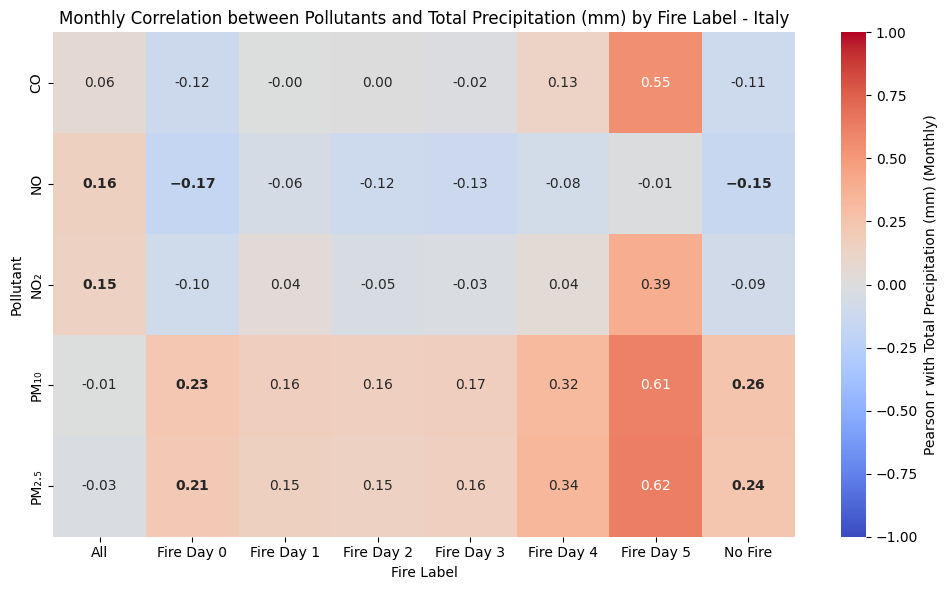

Monthly correlation results for wind_Max saved to CSV.


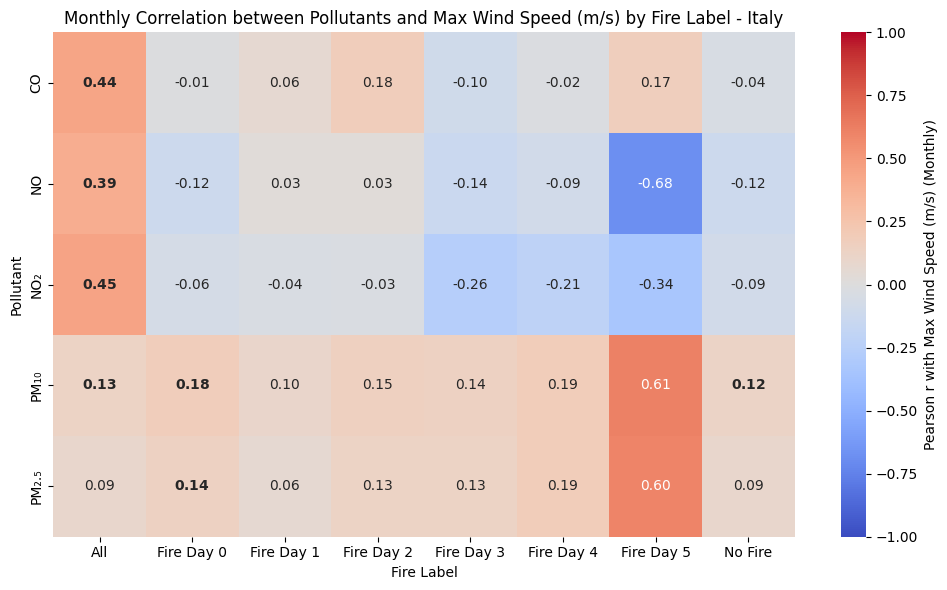

In [24]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Italy"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Italy.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo} (Monthly)'}
    )
    plt.title(f"Monthly Correlation between Pollutants and {pretty_meteo} by Fire Label - Italy")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\306262005.py:64: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\306262005.py:67: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\306262005.py:68: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_all_monthly["wind_Max"] = df_all_daily["wi

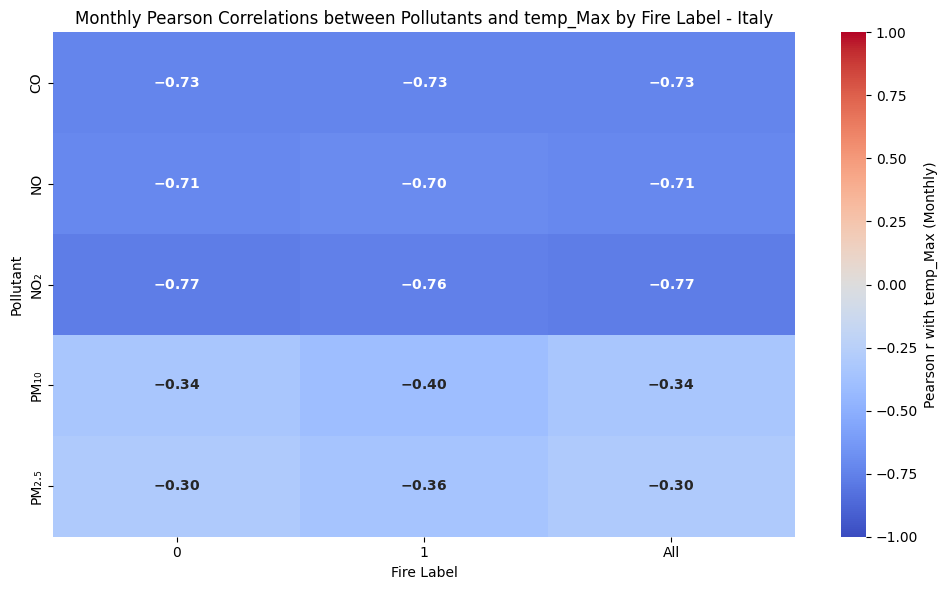

Monthly correlation results for precip_Total_Precipitation saved to CSV.


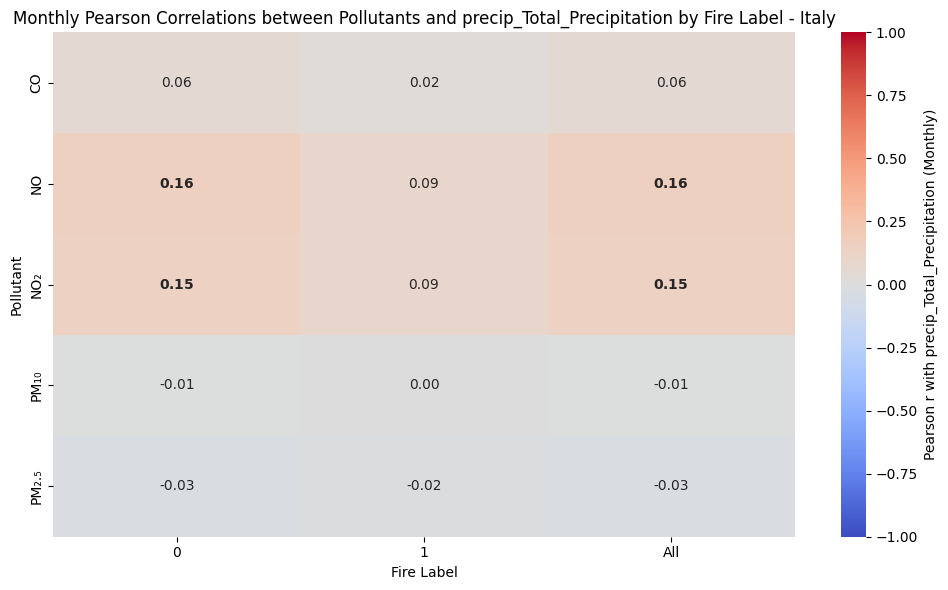

Monthly correlation results for wind_Max saved to CSV.


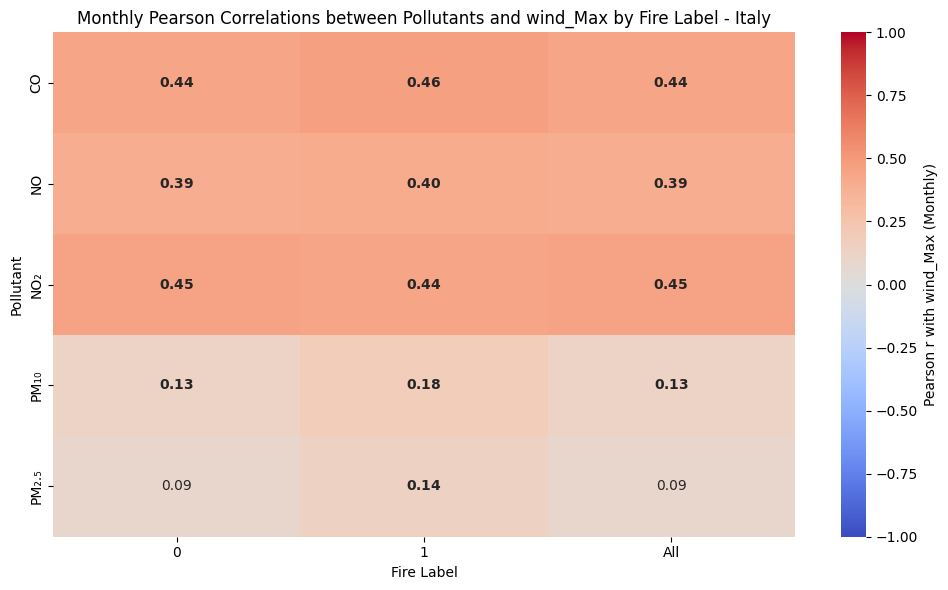

In [41]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Italy"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Italy.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Italy")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


### Greece

#### Daily

Correlation results for temp_Max saved to CSV.


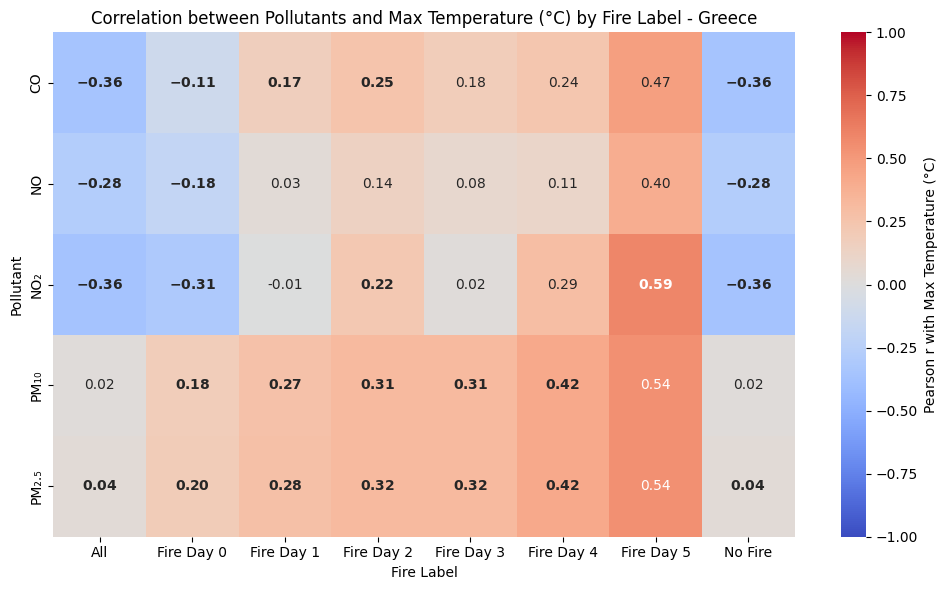

Correlation results for precip_Total_Precipitation saved to CSV.


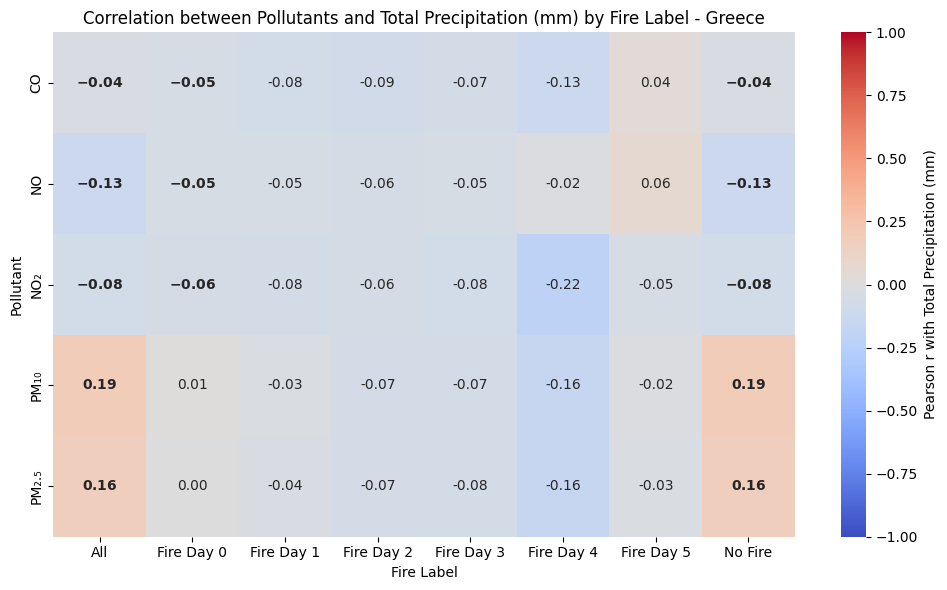

Correlation results for wind_Max saved to CSV.


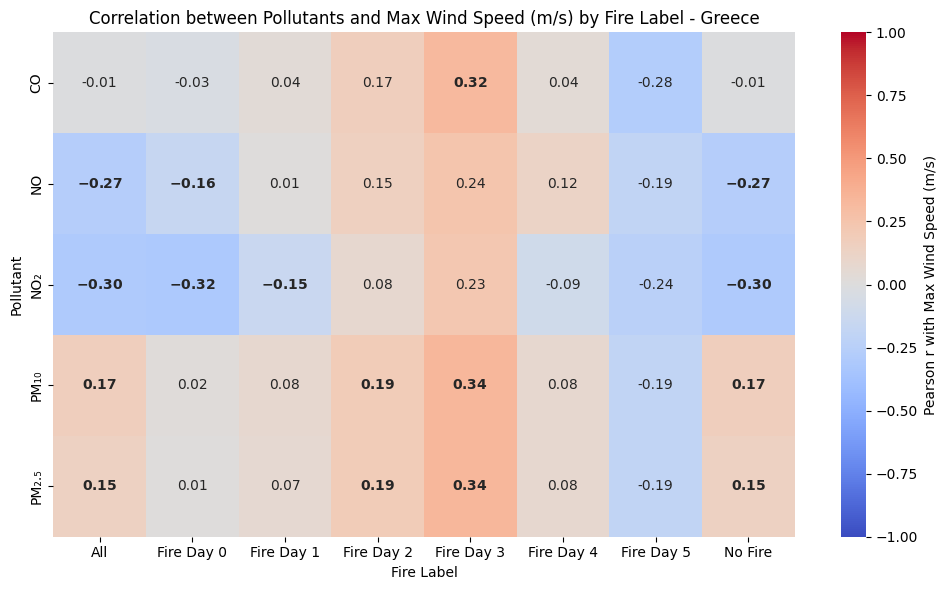

In [25]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Greece (also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Greece
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Greece"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_label_Greece.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo}'}
    )
    plt.title(f"Correlation between Pollutants and {pretty_meteo} by Fire Label - Greece")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


Correlation results for temp_Max saved to CSV.


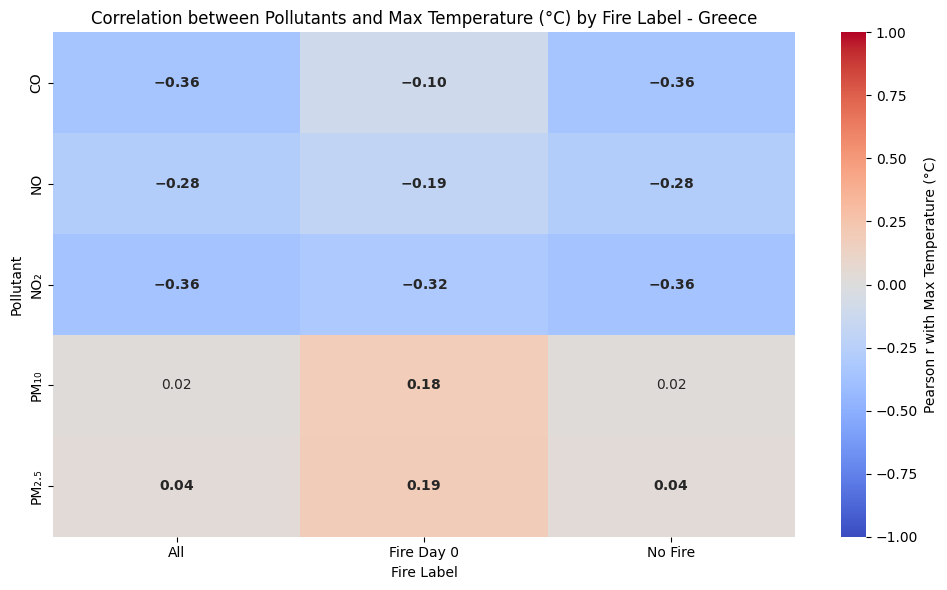

Correlation results for precip_Total_Precipitation saved to CSV.


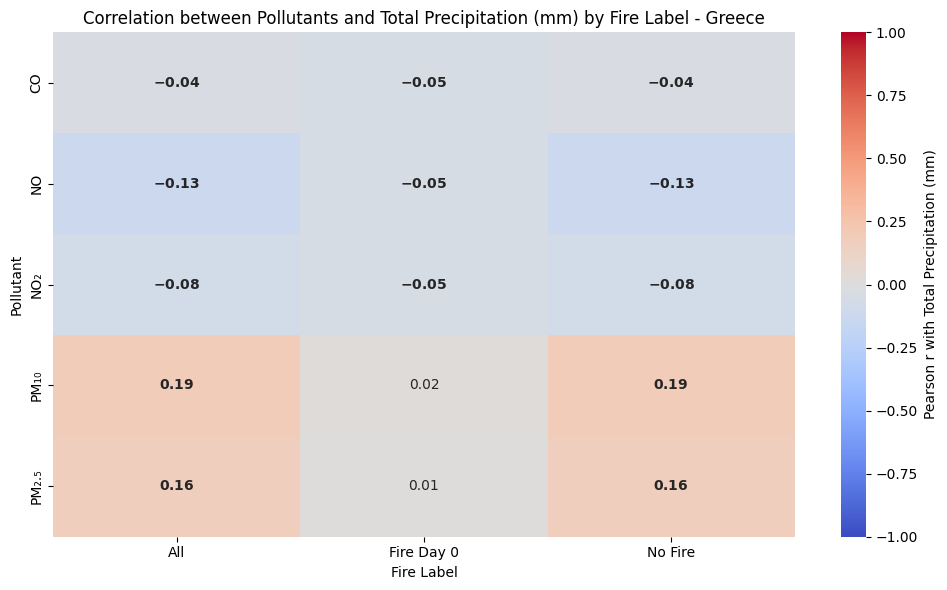

Correlation results for wind_Max saved to CSV.


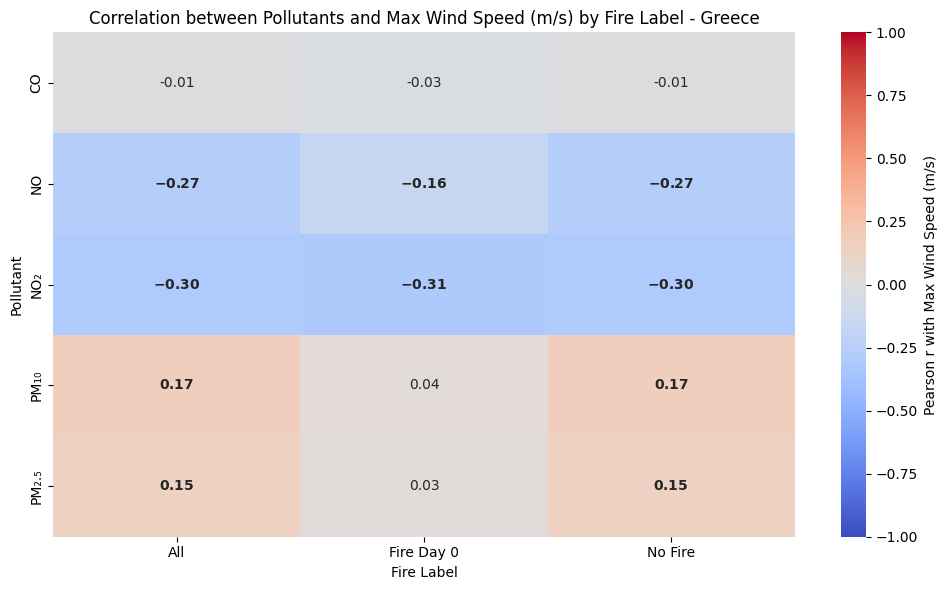

In [26]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files for Greece (also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"  
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Prepare FireLabel masks for Greece
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Greece"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 3. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 4. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + list(meteo_series.values()), axis=1,
                   keys=list(pollutant_series.keys()) + list(meteo_series.keys()))
df_all = df_all.dropna()
pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Compute correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_correlations_by_fire_binary_Greece.csv", index=False)
    print(f"Correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo}'}
    )
    plt.title(f"Correlation between Pollutants and {pretty_meteo} by Fire Label - Greece")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


#### Monthly

C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


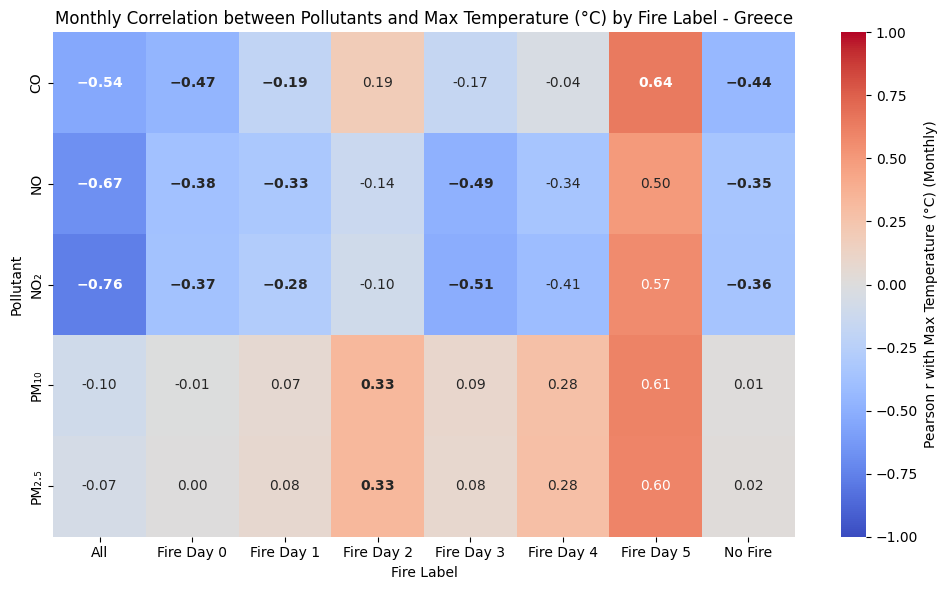

Monthly correlation results for precip_Total_Precipitation saved to CSV.


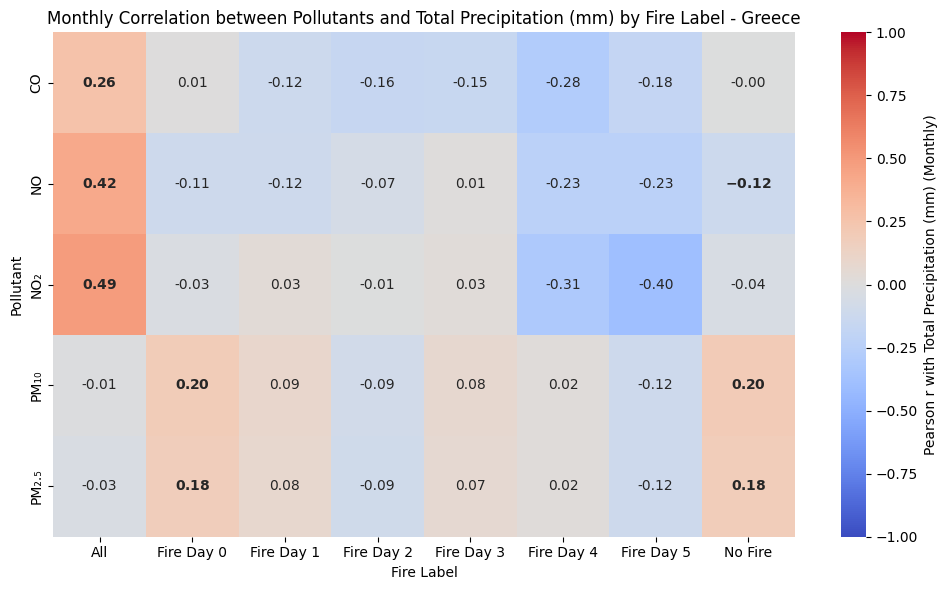

Monthly correlation results for wind_Max saved to CSV.


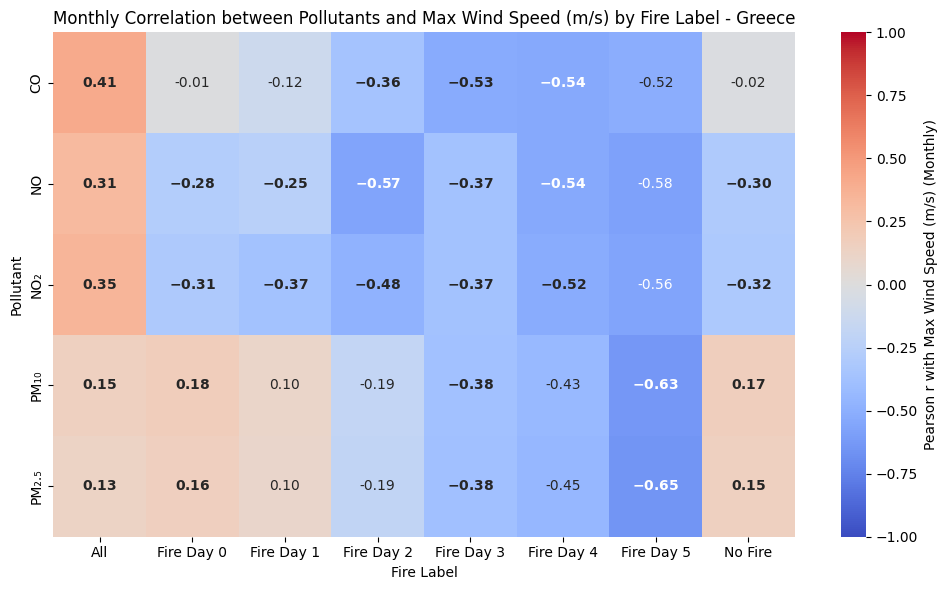

In [27]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# Pretty names for meteorological variables
meteo_pretty = {
    "temp_Max": "Max Temperature (°C)",
    "precip_Total_Precipitation": "Total Precipitation (mm)",
    "wind_Max": "Max Wind Speed (m/s)"
}

# Fire label names
fire_label_names = {
    0: "No Fire",
    1: "Fire Day 0",
    2: "Fire Day 1",
    3: "Fire Day 2",
    4: "Fire Day 3",
    5: "Fire Day 4",
    6: "Fire Day 5"
}

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Greece"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all.index, fill_value=False)
        label_name = fire_label_names[label]   
        all_results.extend(
            correlation_by_label(df_all, label_name, mask_aligned, pollutant_names, meteo_var)
        )

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Greece.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    pretty_meteo = meteo_pretty[meteo_var]
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {pretty_meteo} (Monthly)'}
    )
    plt.title(f"Monthly Correlation between Pollutants and {pretty_meteo} by Fire Label - Greece")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\xarray\groupers.py:487: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  self.index_grouper = pd.Grouper(
C:\Users\sofia\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-pac

Monthly correlation results for temp_Max saved to CSV.


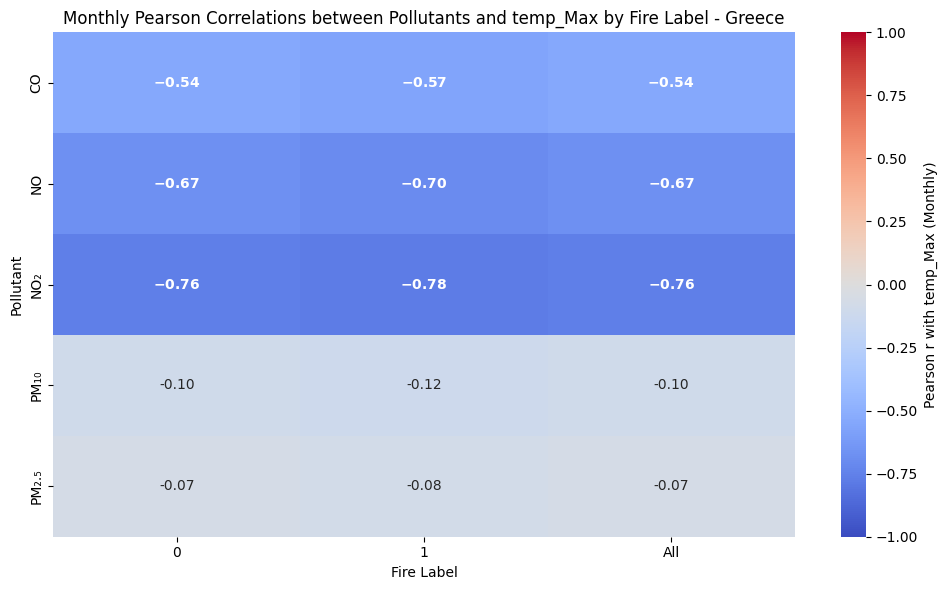

Monthly correlation results for precip_Total_Precipitation saved to CSV.


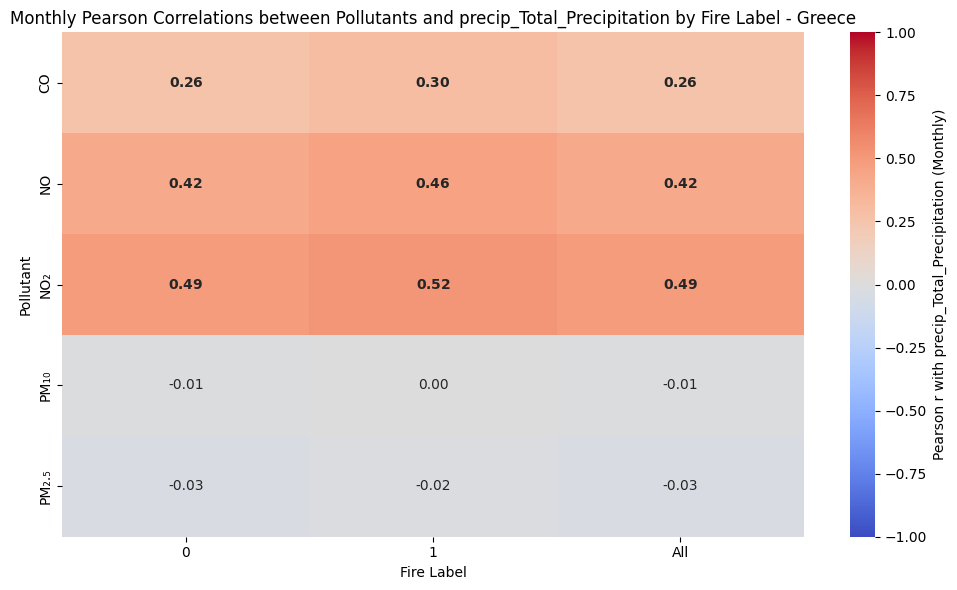

Monthly correlation results for wind_Max saved to CSV.


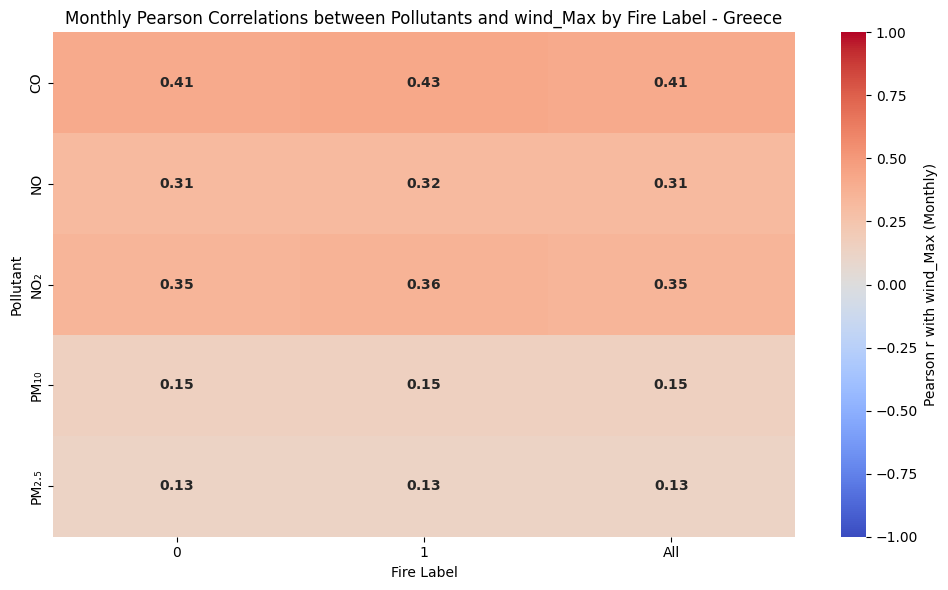

In [45]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files (which also contain meteo variables)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"
}

pollutant_series = {}
meteo_vars = ["temp_Max", "precip_Total_Precipitation", "wind_Max"]
meteo_series = {}
fire_ds = None

# --------------------
# 2. Load data and compute daily means
# --------------------
for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    
    # Pollutants
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    
    # Meteorological variables (average over spatial dimensions)
    for var in meteo_vars:
        if var not in meteo_series:  # only load once
            meteo_series[var] = ds[var].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    
    if fire_ds is None:
        fire_ds = ds  # keep one dataset for fire labels

# --------------------
# 3. Prepare FireLabel masks (daily → monthly)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Greece"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    monthly_label_present = daily_label_present.resample(time="M").any()
    fire_labels[label] = monthly_label_present.to_series()

# --------------------
# 4. Combine pollutants + meteo into single DataFrame (daily → monthly)
# --------------------
df_all_daily = pd.concat(
    list(pollutant_series.values()) + list(meteo_series.values()),
    axis=1,
    keys=list(pollutant_series.keys()) + list(meteo_series.keys())
).dropna()

# --- Monthly aggregation ---
df_all_monthly = pd.DataFrame({
    # Pollutants: monthly mean
    pol: df_all_daily[pol].resample("M").mean() for pol in pollutant_series.keys()
})
# Add meteo variables
df_all_monthly["temp_Max"] = df_all_daily["temp_Max"].resample("M").mean()
df_all_monthly["wind_Max"] = df_all_daily["wind_Max"].resample("M").mean()
df_all_monthly["precip_Total_Precipitation"] = df_all_daily["precip_Total_Precipitation"].resample("M").sum()
df_all_monthly = df_all_monthly.dropna()

pollutant_names = list(pollutant_series.keys())

# --------------------
# 5. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants, meteo_var):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df[meteo_var]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results


def correlation_by_label(df, label_name, mask, pollutants, meteo_var):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset[meteo_var]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 6. Compute monthly correlations for each meteo variable
# --------------------
for meteo_var in meteo_vars:
    all_results = []

    # Overall correlation
    all_results.extend(correlation_with_pvalues(df_all_monthly, pollutant_names, meteo_var))

    # Correlation by fire label (monthly)
    for label, mask in fire_labels.items():
        mask_aligned = mask.reindex(df_all_monthly.index, fill_value=False)
        all_results.extend(correlation_by_label(df_all_monthly, label, mask_aligned, pollutant_names, meteo_var))

    # Save results
    results_df = pd.DataFrame(all_results)
    results_df.to_csv(f"D:\\IPMA\\Results\\pollutant_{meteo_var}_monthly_correlations_by_fire_label_Greece.csv", index=False)
    print(f"Monthly correlation results for {meteo_var} saved to CSV.")

    # Heatmap
    pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
    pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

    alpha = 0.05
    annot = pivot_r.copy().astype(str)
    for i in range(pivot_r.shape[0]):
        for j in range(pivot_r.shape[1]):
            r = pivot_r.iloc[i, j]
            p = pivot_p.iloc[i, j]
            if pd.notna(r):
                text = f"{r:.2f}"
                if p < alpha:
                    text = r"$\bf{" + f"{r:.2f}" + "}$"
                annot.iloc[i, j] = text
            else:
                annot.iloc[i, j] = ""

    plt.figure(figsize=(10, 6))
    sns.heatmap(
        pivot_r,
        annot=annot,
        fmt="",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'label': f'Pearson r with {meteo_var} (Monthly)'}
    )
    plt.title(f"Monthly Pearson Correlations between Pollutants and {meteo_var} by Fire Label - Greece")
    plt.ylabel("Pollutant")
    plt.xlabel("Fire Label")
    plt.tight_layout()
    plt.show()


### OLD WAY

#### Wind Speed

#### Portugal

Correlation results saved to CSV.


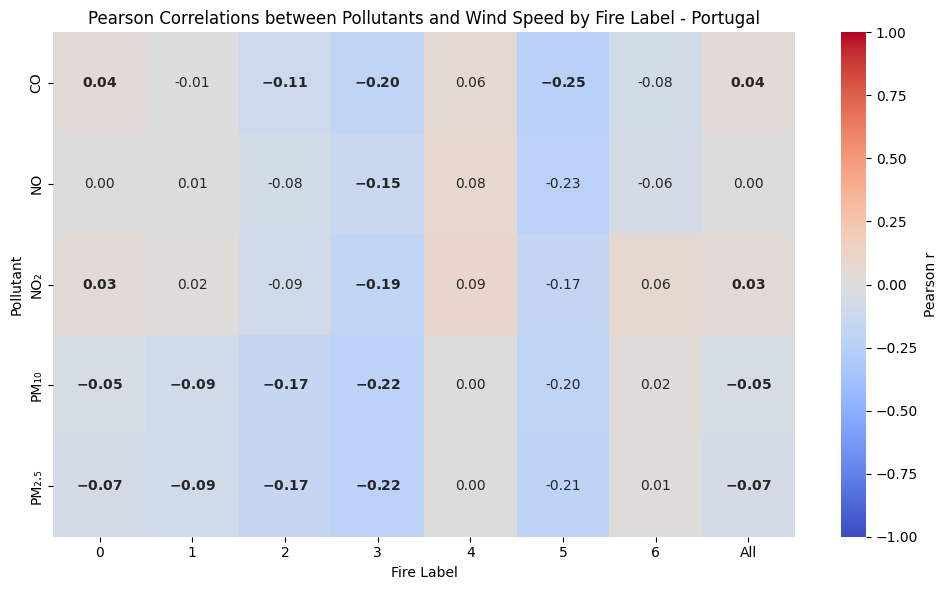

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks (same as before)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Wind_Speed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Wind_Speed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Wind_Speed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Portugal")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


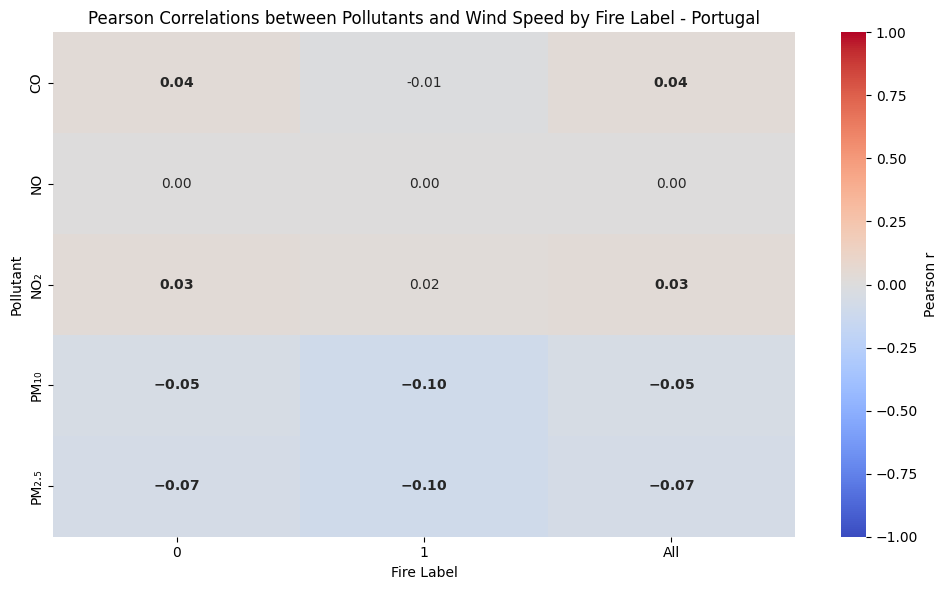

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks (same as before)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Wind_Speed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Wind_Speed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Wind_Speed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_nofire_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Portugal")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Spain

Correlation results saved to CSV.


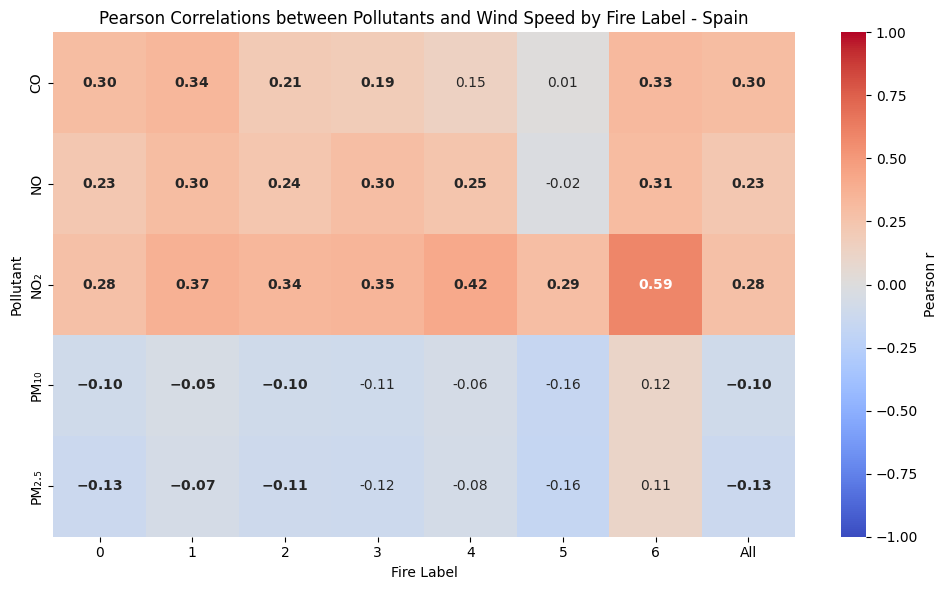

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Spain")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


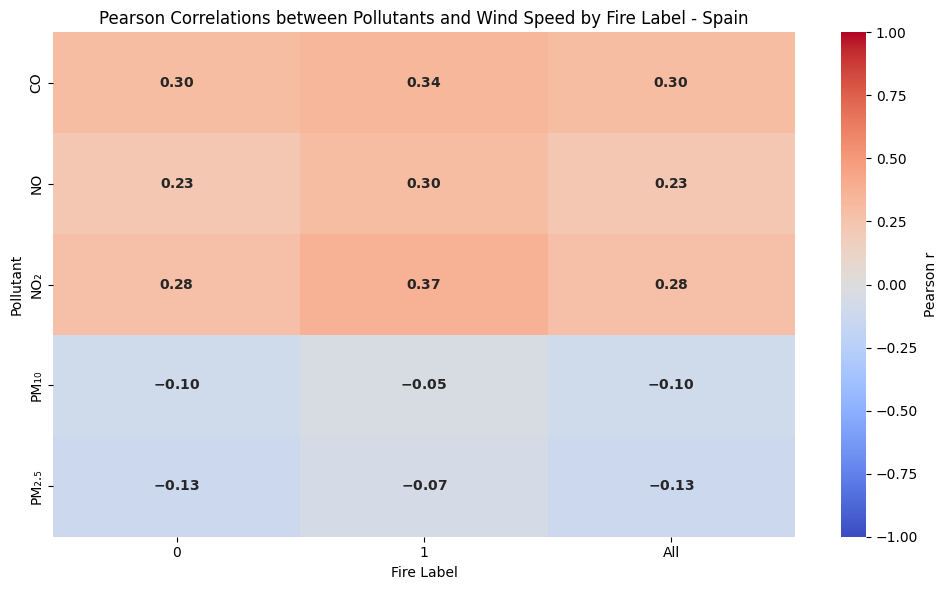

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_nofire_Spain.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Spain")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Iberia

Correlation results saved to CSV.


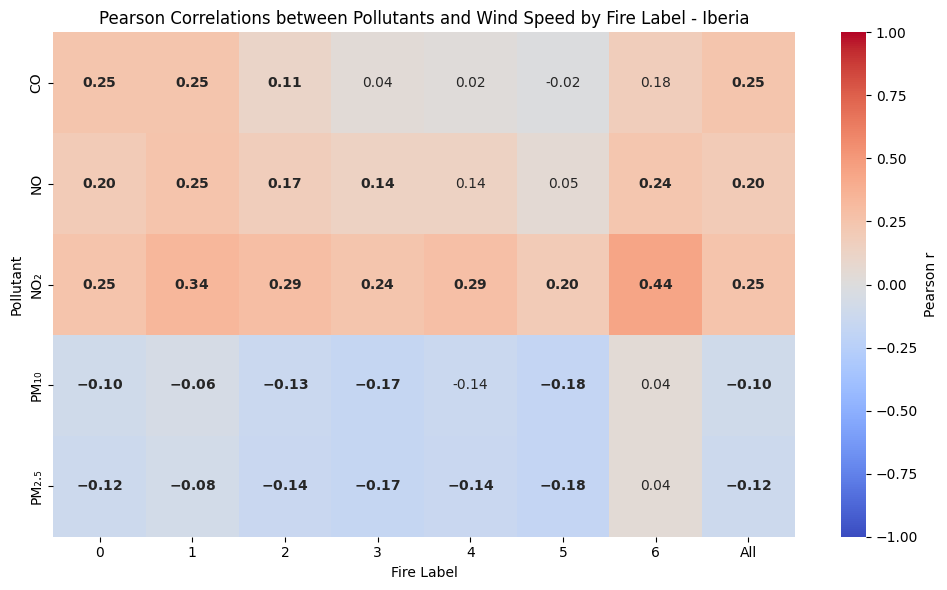

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Iberia"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_label_Iberia.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Iberia")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()

Correlation results saved to CSV.


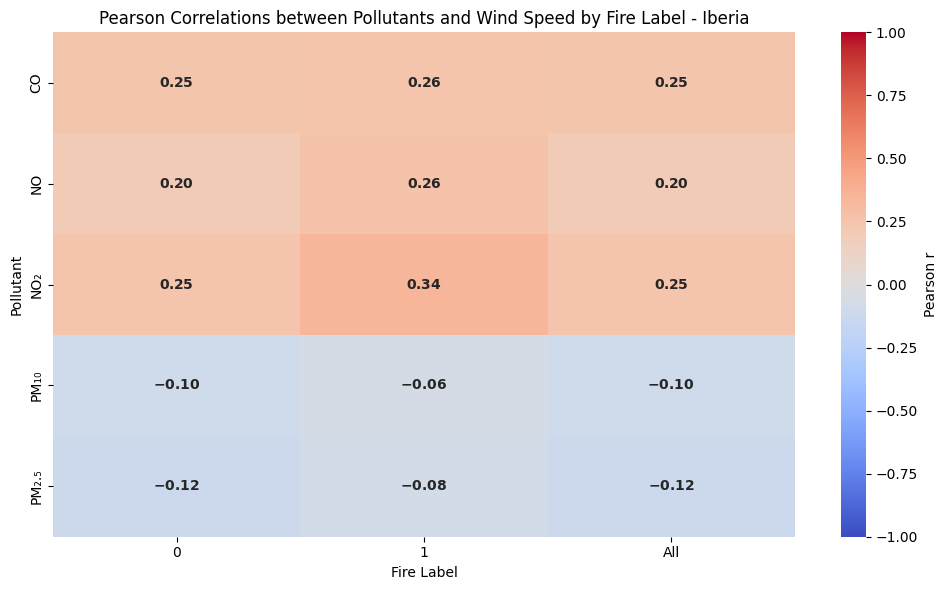

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Iberia"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_nofire_Iberia.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Iberia")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()

#### Italy

Correlation results saved to CSV.


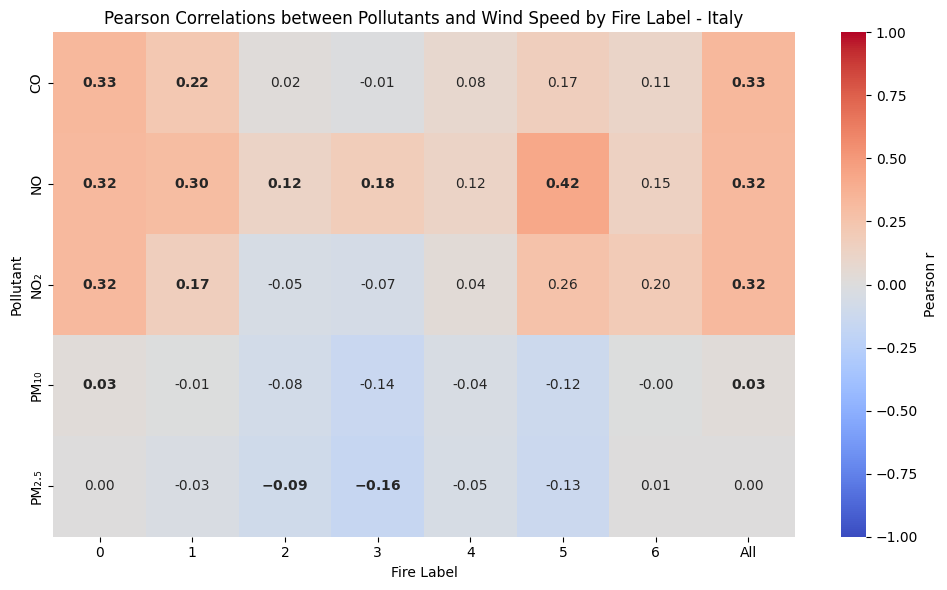

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Italy")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()

Correlation results saved to CSV.


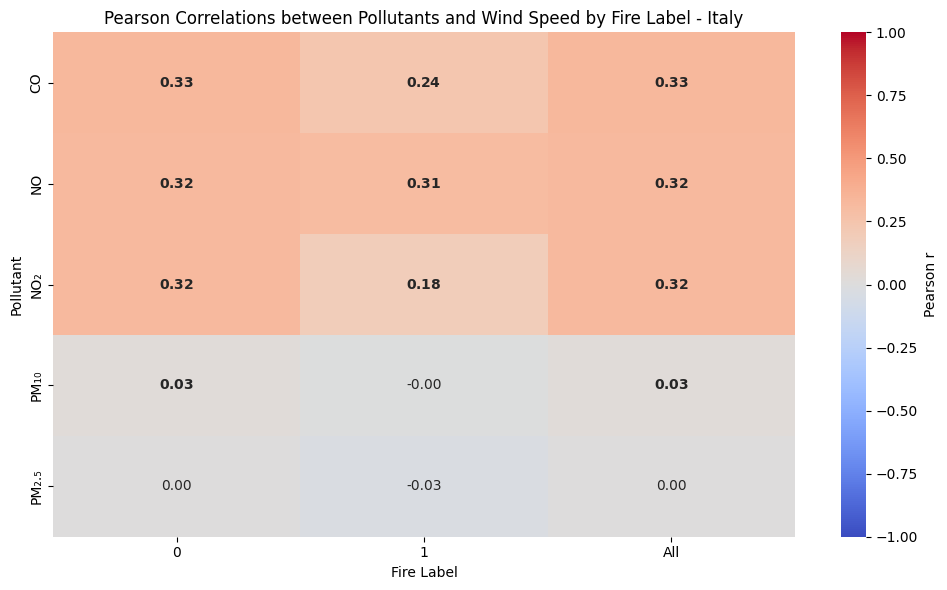

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_nofire_Italy.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Italy")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()

#### Greece

Correlation results saved to CSV.


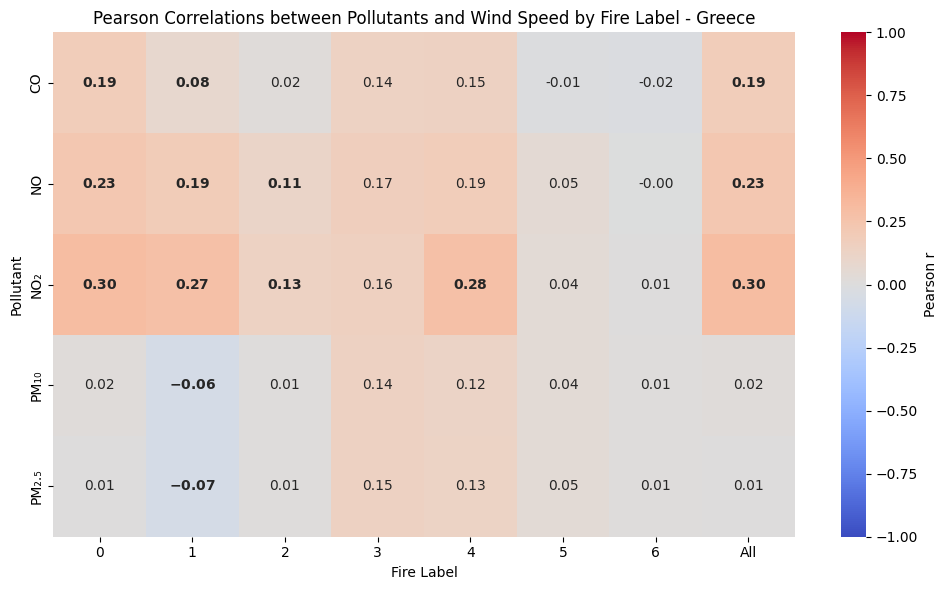

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))


#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Greece")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()

Correlation results saved to CSV.


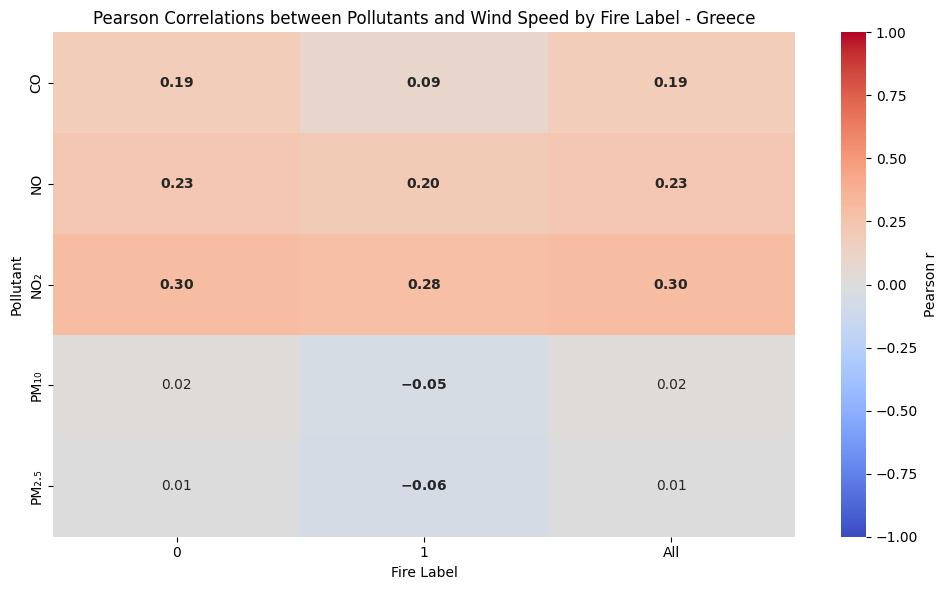

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Wind speed dataset (multiple yearly files)
# --------------------
wind_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\UV_wind\daily_wind_speed_stats_yearly_regridded\daily_wind_speed_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in wind_files]
ds_wind = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_wind = ds_wind.stack(date=("Year", "Month", "Day"))

# Build datetime index from stacked coordinates
time_index = pd.to_datetime(
    {"year": ds_wind["Year"].values, 
     "month": ds_wind["Month"].values, 
     "day": ds_wind["Day"].values},
    errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_wind = ds_wind.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_wind = ds_wind.assign_coords(time=("date", time_index))
ds_wind = ds_wind.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial max wind speed
wind_ts = ds_wind["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["WindSpeed"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["WindSpeed"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + wind)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [wind_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["WindSpeed"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_wind_correlations_by_fire_nofire_Greece.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))


#Heatmap
# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Wind Speed by Fire Label - Greece")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()

#### Total Precipitation

#### Portugal

Correlation results saved to CSV.


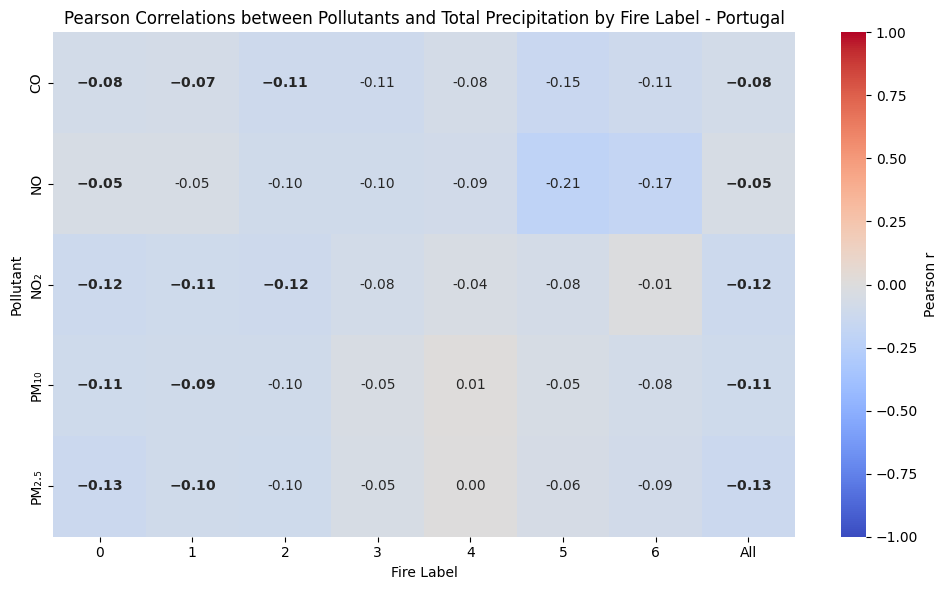

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Portugal")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


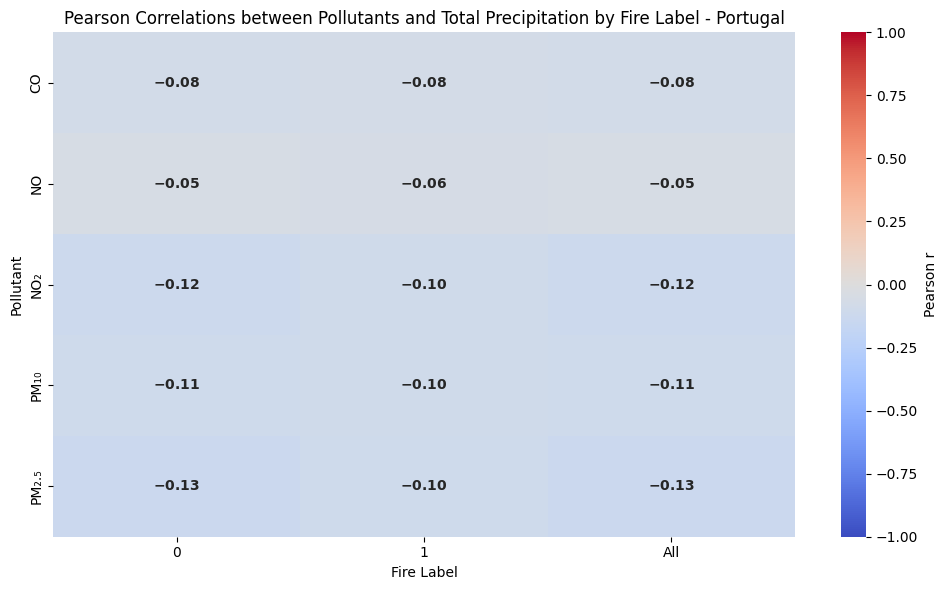

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_nofire_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Portugal")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Spain

Correlation results saved to CSV.


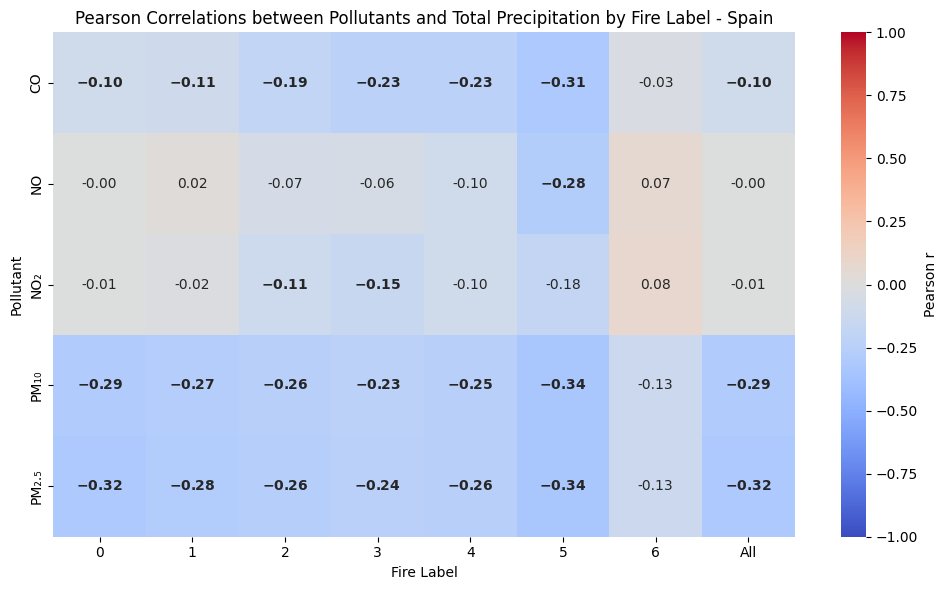

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Spain")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


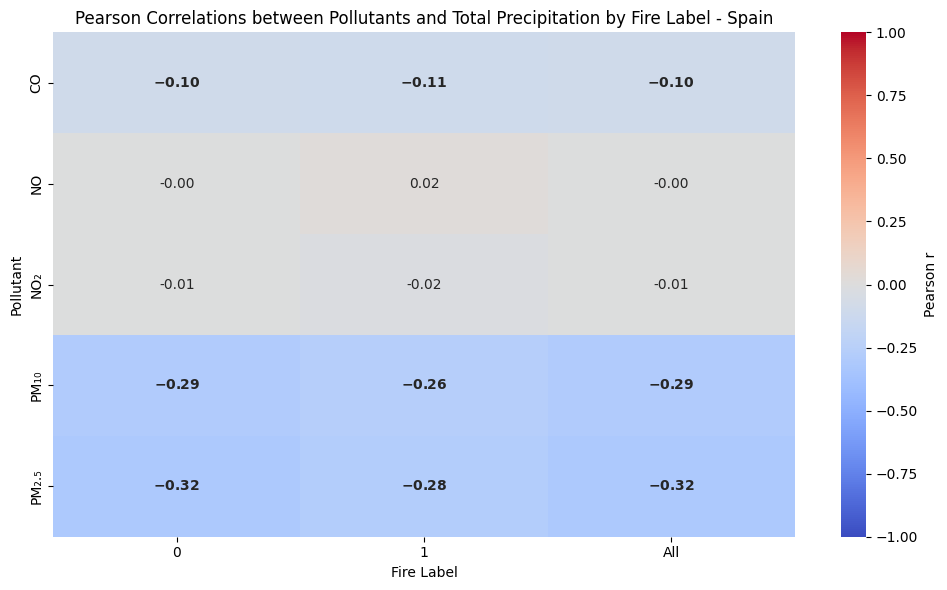

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_nofire_Spain.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Spain")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Iberia

Correlation results saved to CSV.


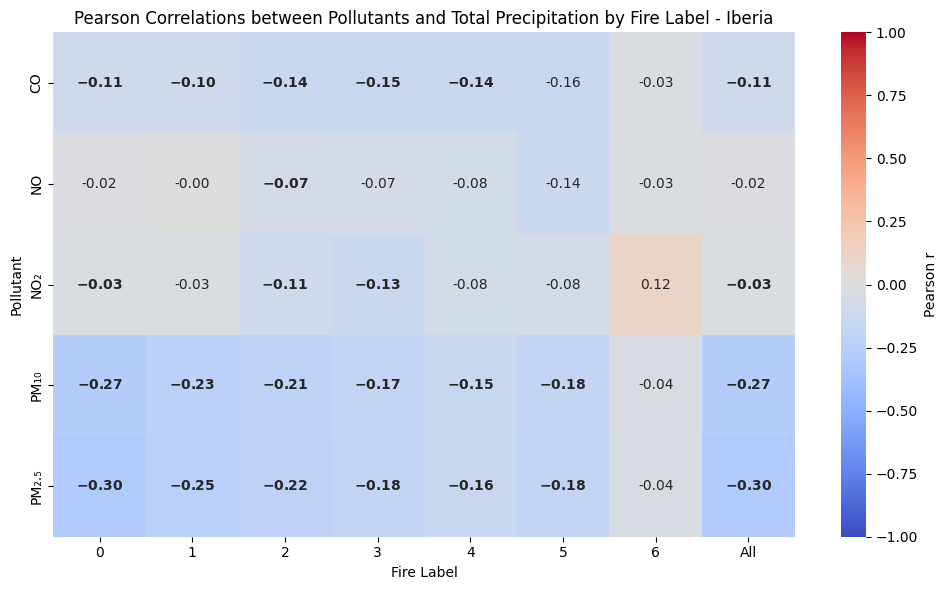

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Iberia"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_label_Iberia.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Iberia")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


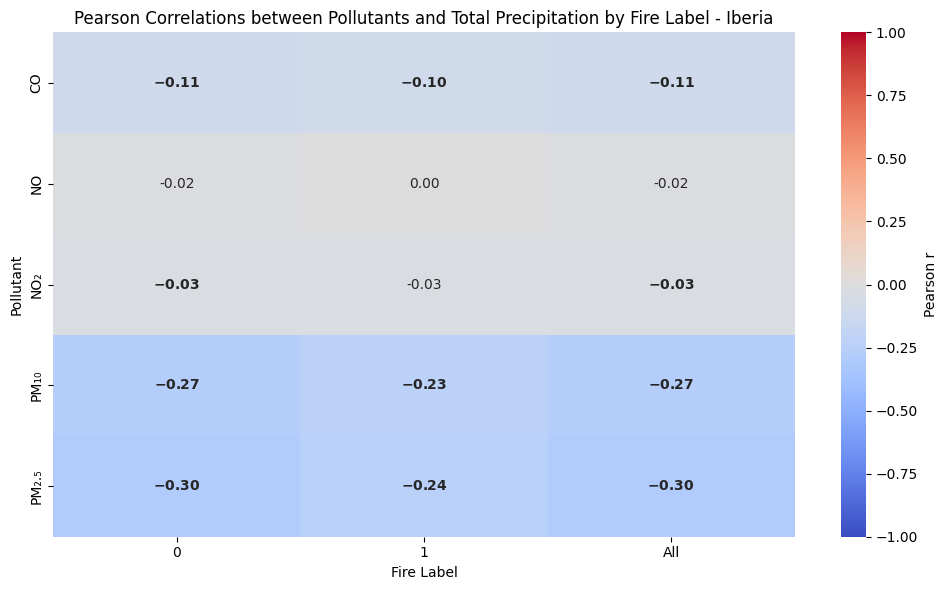

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Iberia"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_nofire_Iberia.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Iberia")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Italy

Correlation results saved to CSV.


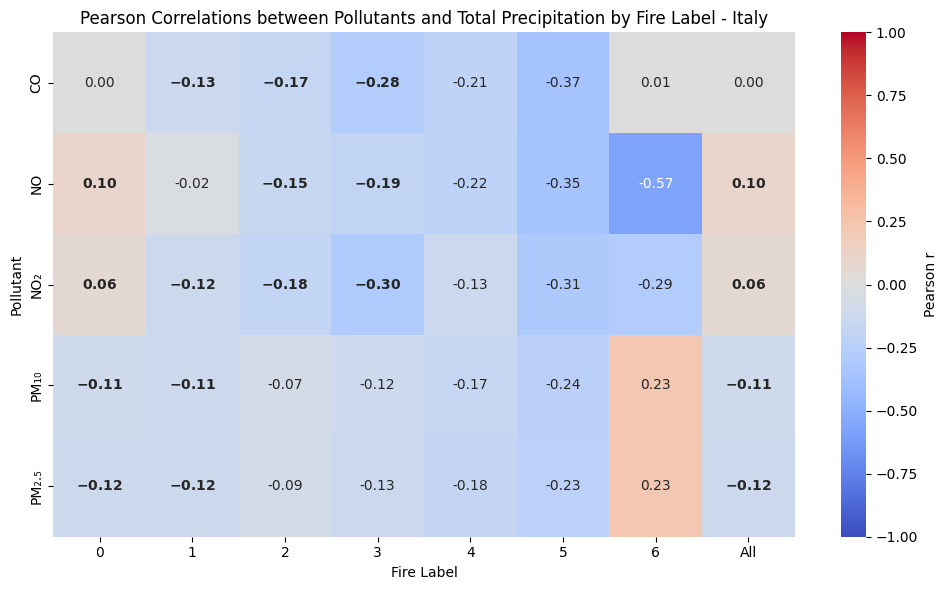

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels


# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Italy")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


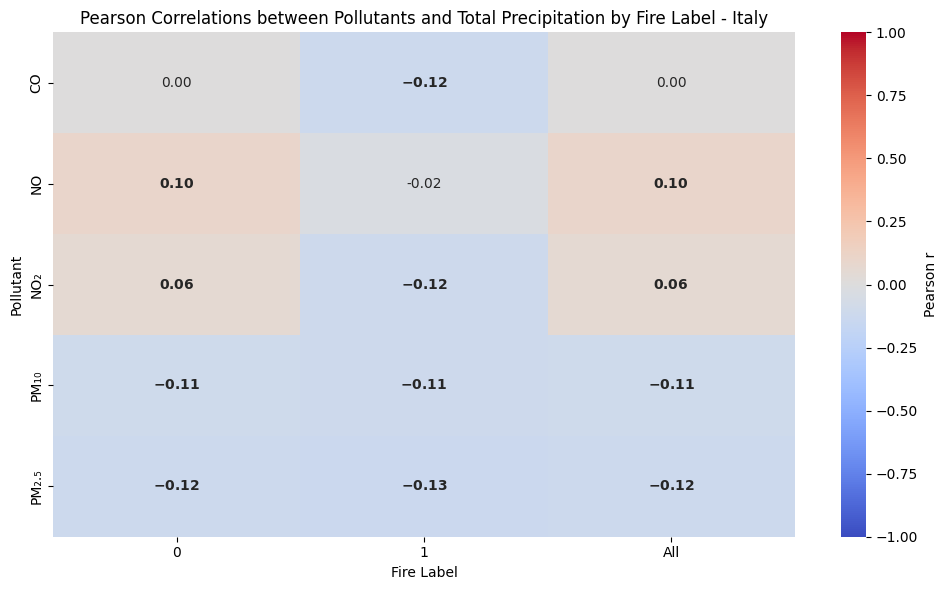

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels


# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_nofire_Italy.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Italy")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Greece

Correlation results saved to CSV.


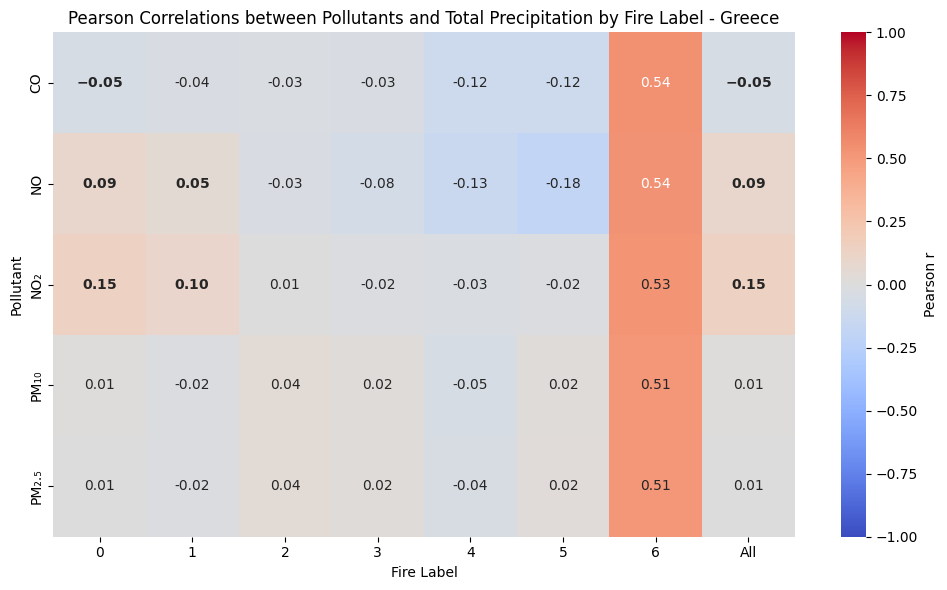

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Greece")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()



Correlation results saved to CSV.


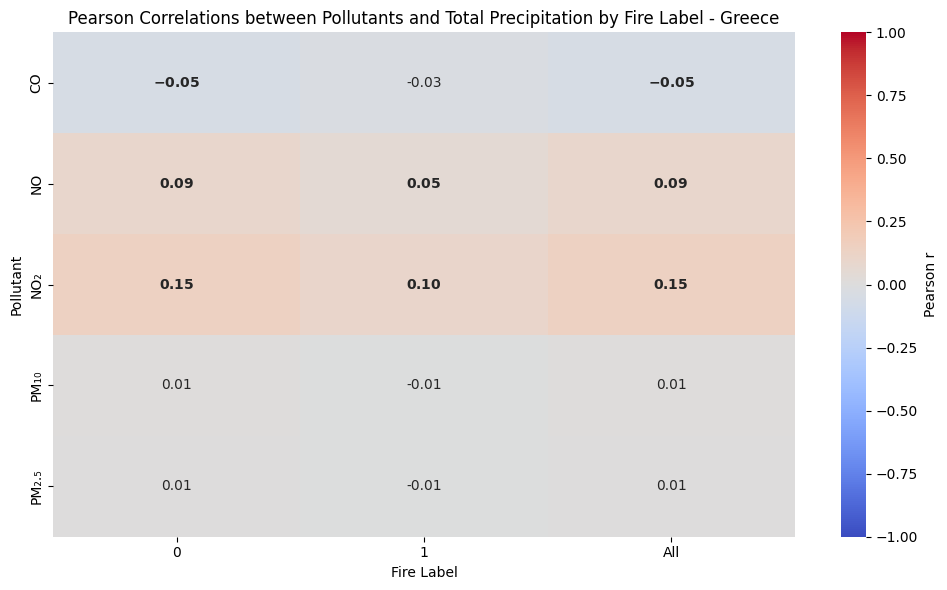

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Precipitation dataset (multiple yearly files)
# --------------------
precip_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Precipitation\daily_precipitation_stats_yearly_regridded\daily_precipitation_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in precip_files]
ds_precip = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_precip = ds_precip.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_precip["Year"].values
months = ds_precip["Month"].values
days = ds_precip["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_precip = ds_precip.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_precip = ds_precip.assign_coords(time=("date", time_index))
ds_precip = ds_precip.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean of total precipitation
precip_ts = ds_precip["Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Precipitation"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Precipitation"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame (pollutants + precipitation)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [precip_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Precipitation"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_precipitation_correlations_by_fire_nofire_Greece.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Total Precipitation by Fire Label - Greece")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()



#### Temperature

#### Portugal

Correlation results saved to CSV.


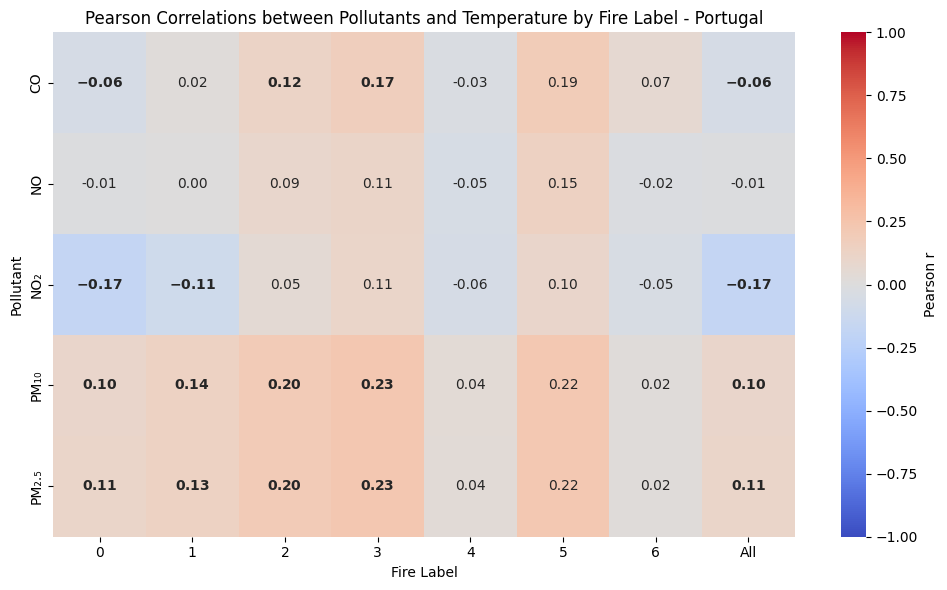

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files (same as before)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks (same as precipitation script)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_label_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_label_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Portugal")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


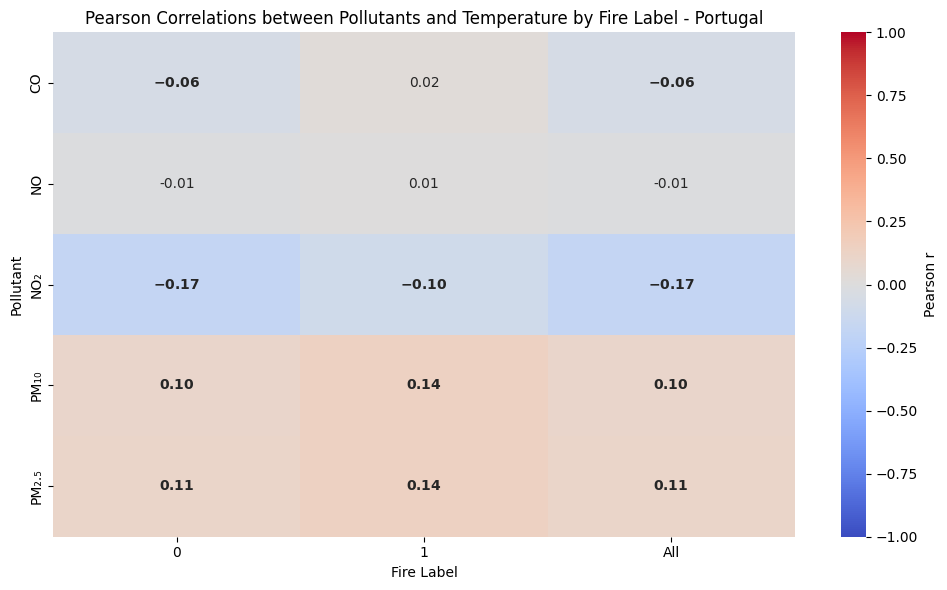

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files (same as before)
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Portugal.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Portugal.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Portugal.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Portugal.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Portugal.nc"  
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks (same as precipitation script)
# --------------------
fire_labels = {}
for label in range(0, 7):
    mask = fire_ds["fire_binary_Portugal"] == label
    daily_label_present = mask.any(dim=["latitude", "longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation functions
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build full DataFrame
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Save results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_nofire_Portugal.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Portugal")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Spain

Correlation results saved to CSV.


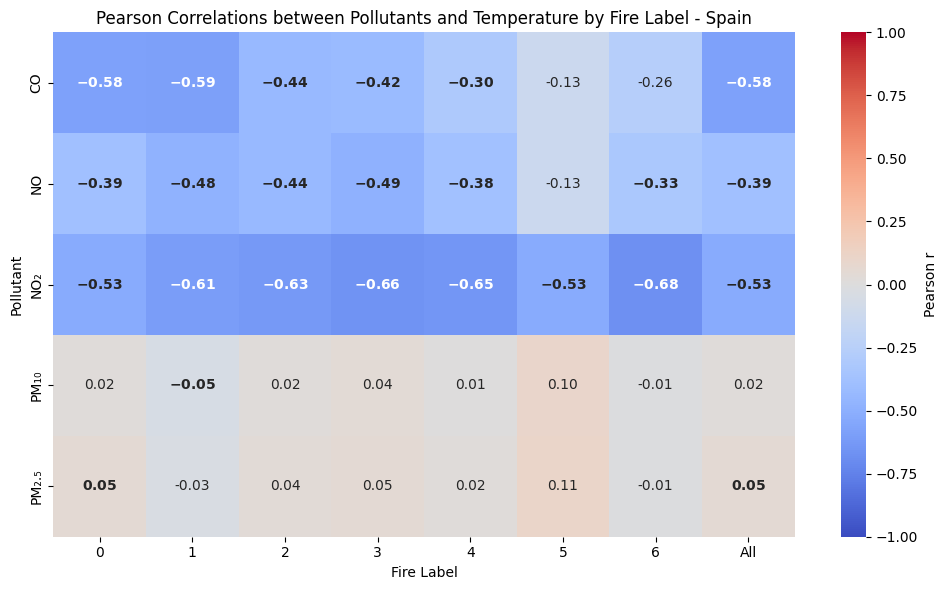

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_label_Spain.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Spain")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


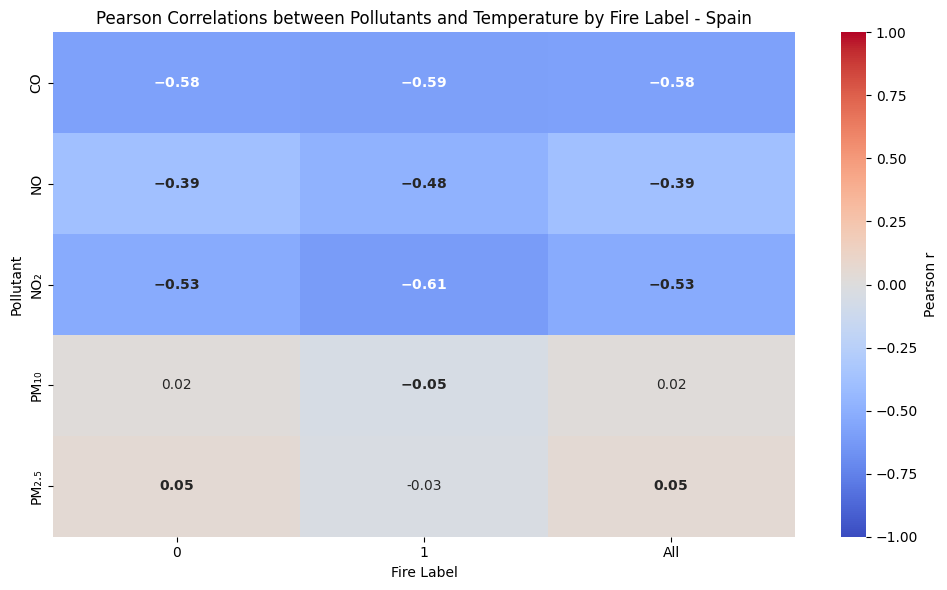

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Spain.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Spain.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Spain.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Spain.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Spain.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Spain"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_nofire_Spain.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Spain")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Iberia

Correlation results saved to CSV.


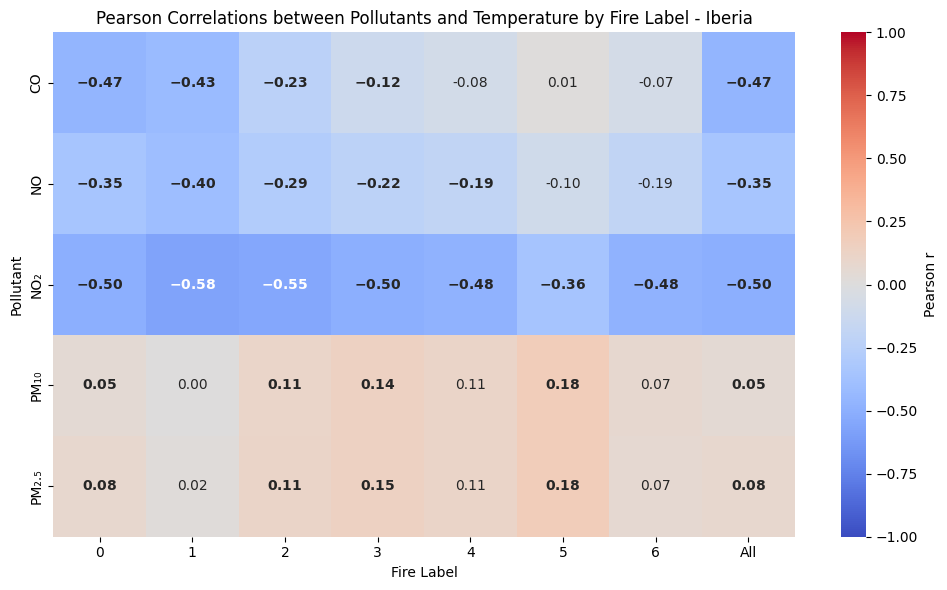

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Iberia"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_label_Iberia.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Iberia")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


Correlation results saved to CSV.


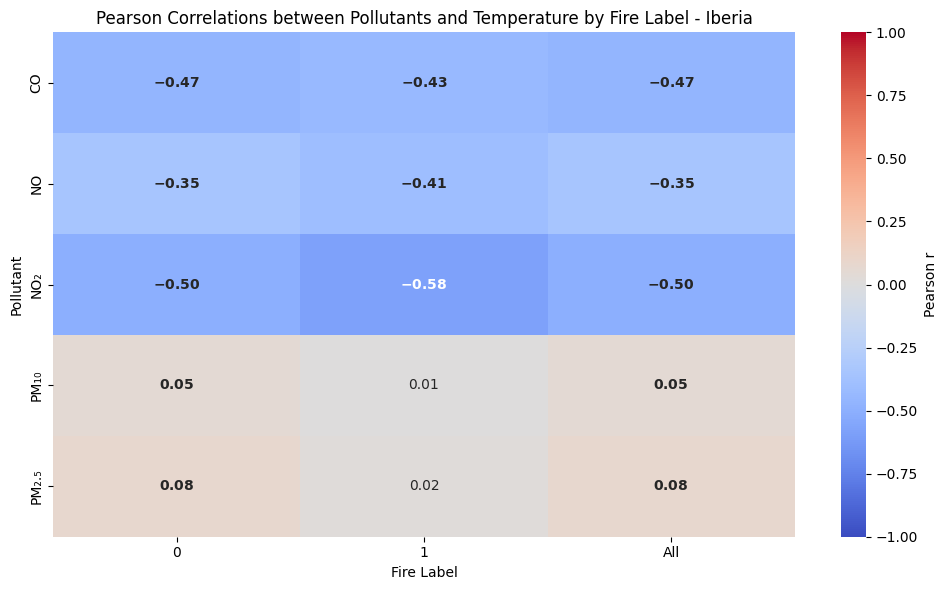

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Iberia.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Iberia.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Iberia.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Iberia.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Iberia.nc"     
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Iberia"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_nofire_Iberia.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Iberia")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


#### Italy

Correlation results saved to CSV.


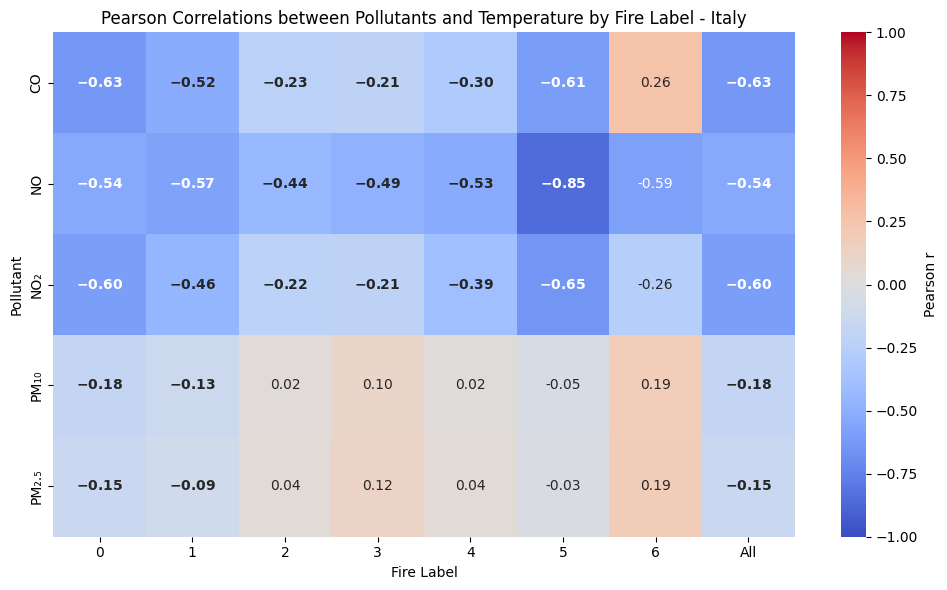

In [72]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_label_Italy.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Italy")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


In [73]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Italy.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Italy.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Italy.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Italy.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Italy.nc"   
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Italy"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_nofire_Italy.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Italy")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


KeyboardInterrupt: 

#### Greece

In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_label_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_label_Greece.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Greece")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


In [ ]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import glob

# --------------------
# 1. Pollutant files
# --------------------
pollutant_files = {
    'CO':     r"D:\IPMA\Results\co_fire_meteo_Greece.nc",
    'NO':     r"D:\IPMA\Results\no_fire_meteo_Greece.nc",
    'NO₂':    r"D:\IPMA\Results\no2_fire_meteo_Greece.nc",
    'PM₂.₅':  r"D:\IPMA\Results\pm2p5_fire_meteo_Greece.nc",
    'PM₁₀':   r"D:\IPMA\Results\pm10_fire_meteo_Greece.nc"    
}

pollutant_series = {}
fire_ds = None

for name, file in pollutant_files.items():
    ds = xr.open_dataset(file)
    ts = ds["Mean"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
    pollutant_series[name] = ts
    if fire_ds is None:
        fire_ds = ds  # keep dataset for fire labels

# --------------------
# 2. Temperature dataset (multiple yearly files)
# --------------------
temp_files = sorted(glob.glob(
    r"D:\IPMA\ERA5\Temperature\daily_temperature_stats_yearly_regridded\daily_temperature_stats_*_regrid.nc"
))

# Open all files and concatenate along 'Year'
ds_list = [xr.open_dataset(f) for f in temp_files]
ds_temp = xr.concat(ds_list, dim="Year")

# Stack Year, Month, Day into single dimension
ds_temp = ds_temp.stack(date=("Year", "Month", "Day"))

# Build datetime index from the stacked coordinates
years = ds_temp["Year"].values
months = ds_temp["Month"].values
days = ds_temp["Day"].values

time_index = pd.to_datetime(
    {"year": years, "month": months, "day": days}, errors="coerce"
)

# Keep only valid dates
valid_mask = ~pd.isna(time_index)
ds_temp = ds_temp.isel(date=valid_mask)
time_index = time_index[valid_mask]

# Assign time coordinate
ds_temp = ds_temp.assign_coords(time=("date", time_index))
ds_temp = ds_temp.swap_dims({"date": "time"}).drop_vars("date")

# Daily spatial mean temperature
temp_ts = ds_temp["Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# --------------------
# 3. Prepare FireLabel masks for each label (0-6)
# --------------------
fire_labels = {}
for label in range(0,7):
    mask = fire_ds["fire_binary_Greece"] == label
    # True if any grid cell has this label
    daily_label_present = mask.any(dim=["latitude","longitude"])
    fire_labels[label] = daily_label_present.to_series()

# --------------------
# 4. Correlation function
# --------------------
def correlation_with_pvalues(df, pollutants):
    results = []
    for pol in pollutants:
        x = df[pol]
        y = df["Temperature"]
        if len(df) < 2 or x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": "All",
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

def correlation_by_label(df, label_name, mask, pollutants):
    results = []
    subset = df[mask]
    if len(subset) < 2:
        return results
    for pol in pollutants:
        x = subset[pol]
        y = subset["Temperature"]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "FireLabel": label_name,
            "Pollutant": pol,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })
    return results

# --------------------
# 5. Build combined DataFrame (pollutants + temperature)
# --------------------
df_all = pd.concat(list(pollutant_series.values()) + [temp_ts], axis=1,
                   keys=list(pollutant_series.keys()) + ["Temperature"])
df_all = df_all.dropna()

pollutant_names = list(pollutant_series.keys())
all_results = []

# Overall correlation
all_results.extend(correlation_with_pvalues(df_all, pollutant_names))

# Correlation by fire label
for label, mask in fire_labels.items():
    # Align mask with df_all
    mask_aligned = mask.reindex(df_all.index, fill_value=False)
    all_results.extend(correlation_by_label(df_all, label, mask_aligned, pollutant_names))

# --------------------
# 6. Print results
# --------------------
results_df = pd.DataFrame(all_results)
results_df.to_csv(r"D:\IPMA\Results\pollutant_temperature_correlations_by_fire_nofire_Greece.csv", index=False)
print("Correlation results saved to CSV.")
# print(results_df.to_string(index=False))

#Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Pivot correlation and p-value tables
pivot_r = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_r")
pivot_p = results_df.pivot(index="Pollutant", columns="FireLabel", values="Pearson_p")

# Define significance threshold (you can adjust)
alpha = 0.05

# Build annotation matrix with bold for significant values
annot = pivot_r.copy().astype(str)
for i in range(pivot_r.shape[0]):
    for j in range(pivot_r.shape[1]):
        r = pivot_r.iloc[i, j]
        p = pivot_p.iloc[i, j]
        if pd.notna(r):
            text = f"{r:.2f}"
            if p < alpha:
                text = r"$\bf{" + f"{r:.2f}" + "}$"  # bold if significant
            annot.iloc[i, j] = text
        else:
            annot.iloc[i, j] = ""

# Create the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(
    pivot_r,
    annot=annot,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={'label': 'Pearson r'}
)
plt.title("Pearson Correlations between Pollutants and Temperature by Fire Label - Greece")
plt.ylabel("Pollutant")
plt.xlabel("Fire Label")
plt.tight_layout()
plt.show()


## Correlations between variables - FRP and Meteo

#### Portugal

##### Daily

Correlation results saved to: D:\IPMA\Results\FRP_meteo_correlations_Portugal.csv


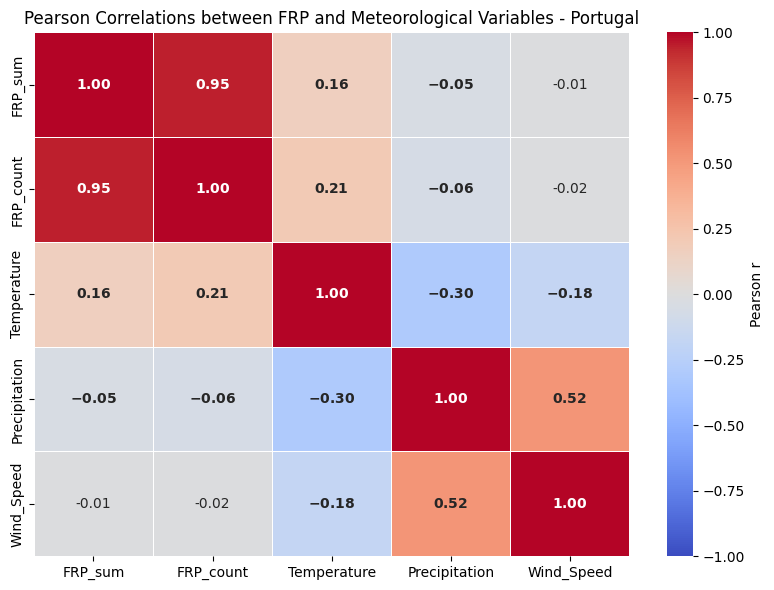

In [74]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Portugal.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_correlations_Portugal.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Portugal"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "FRP_sum"

frp_count = ds["frp_count_Portugal"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP_count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
# Temperature → Max
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# Precipitation → Total_Precipitation
precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# Wind speed → Max
wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_all.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_all[var1], df_all[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Correlation results saved to: {output_csv}")

# --------------------
# 7. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Pearson Correlations between FRP and Meteorological Variables - Portugal")
plt.tight_layout()
plt.show()


##### Monthly

Monthly correlation results saved to: D:\IPMA\Results\FRP_meteo_monthly_correlations_Portugal.csv


C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\4091445149.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP_sum": df_all["FRP_sum"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\4091445149.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP_count": df_all["FRP_count"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\4091445149.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Precipitation": df_all["Precipitation"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\4091445149.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Temperature": df_all["Temperature"].resample("M").mean(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\4091445149.py:55: FutureWarning: 'M' is deprecate

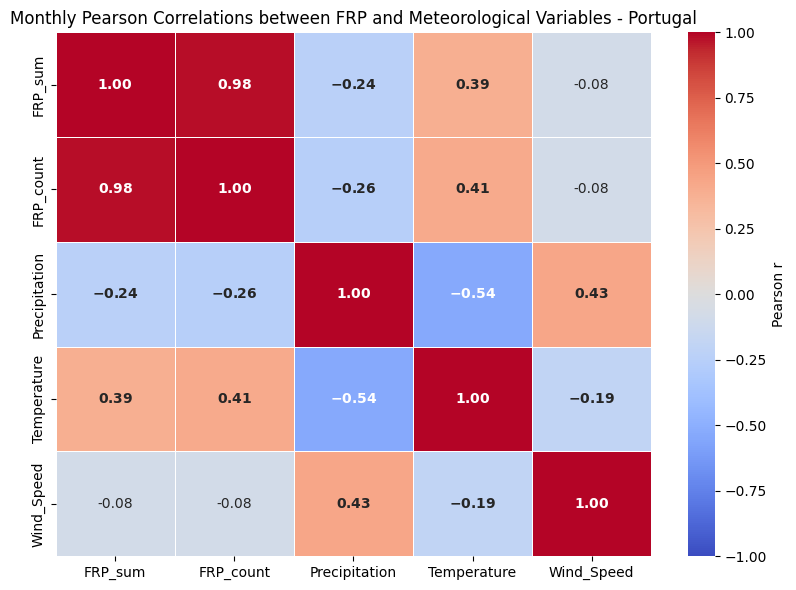

In [75]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Portugal.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_monthly_correlations_Portugal.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Portugal"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "FRP_sum"

frp_count = ds["frp_count_Portugal"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP_count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Aggregate to monthly
# --------------------
# For FRP_sum, FRP_count, and Precipitation -> use sum (total per month)
# For Temperature and Wind -> use mean (average per month)
df_monthly = pd.DataFrame({
    "FRP_sum": df_all["FRP_sum"].resample("M").sum(),
    "FRP_count": df_all["FRP_count"].resample("M").sum(),
    "Precipitation": df_all["Precipitation"].resample("M").sum(),
    "Temperature": df_all["Temperature"].resample("M").mean(),
    "Wind_Speed": df_all["Wind_Speed"].resample("M").mean(),
}).dropna()

# --------------------
# 7. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_monthly.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_monthly[var1], df_monthly[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Monthly correlation results saved to: {output_csv}")

# --------------------
# 8. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Monthly Pearson Correlations between FRP and Meteorological Variables - Portugal")
plt.tight_layout()
plt.show()


#### Spain

##### Daily

Correlation results saved to: D:\IPMA\Results\FRP_meteo_correlations_Spain.csv


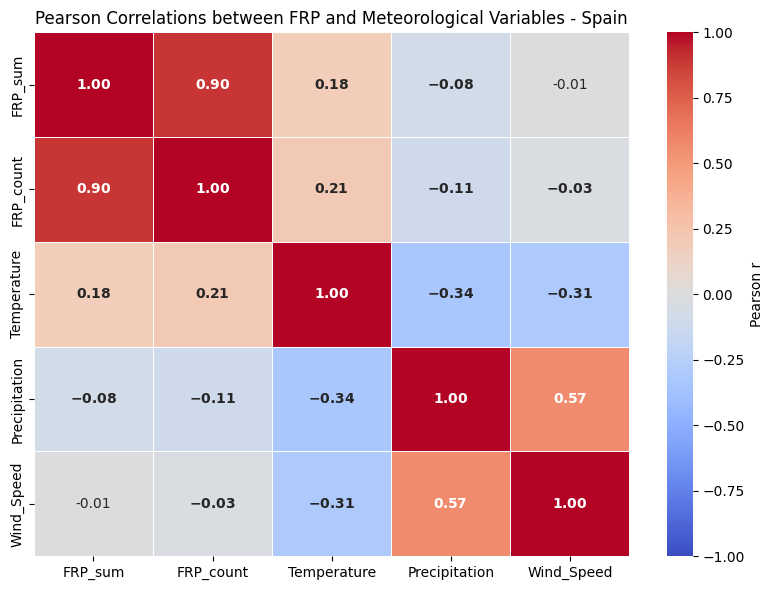

In [76]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Spain.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_correlations_Spain.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Spain"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "FRP_sum"

frp_count = ds["frp_count_Spain"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP_count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
# Temperature → Max
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# Precipitation → Total_Precipitation
precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# Wind speed → Max
wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_all.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_all[var1], df_all[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Correlation results saved to: {output_csv}")

# --------------------
# 7. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Pearson Correlations between FRP and Meteorological Variables - Spain")
plt.tight_layout()
plt.show()


##### Monthly

C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\1759954719.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP_sum": df_all["FRP_sum"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\1759954719.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP_count": df_all["FRP_count"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\1759954719.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Precipitation": df_all["Precipitation"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\1759954719.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Temperature": df_all["Temperature"].resample("M").mean(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20416\1759954719.py:55: FutureWarning: 'M' is deprecate

Monthly correlation results saved to: D:\IPMA\Results\FRP_meteo_monthly_correlations_Spain.csv


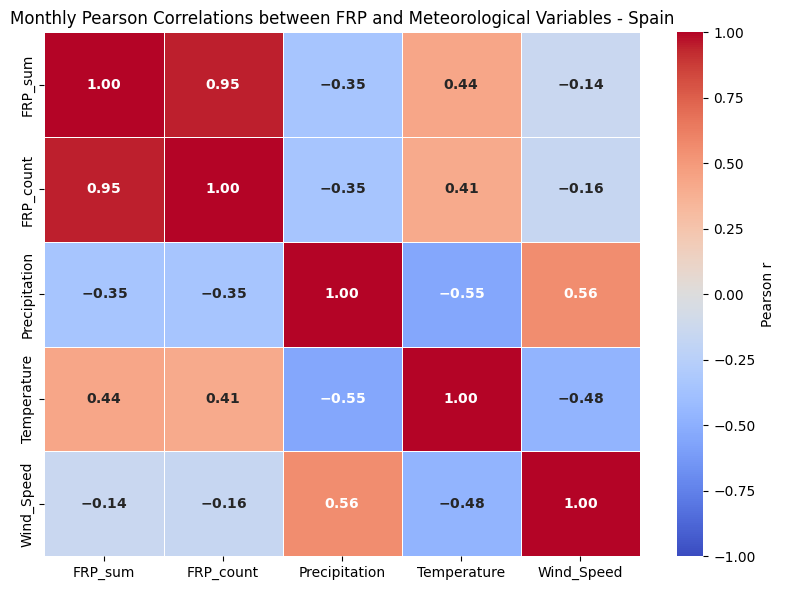

In [77]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Spain.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_monthly_correlations_Spain.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Spain"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "FRP_sum"

frp_count = ds["frp_count_Spain"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP_count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind_Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Aggregate to monthly
# --------------------
# For FRP_sum, FRP_count, and Precipitation -> use sum (total per month)
# For Temperature and Wind -> use mean (average per month)
df_monthly = pd.DataFrame({
    "FRP_sum": df_all["FRP_sum"].resample("M").sum(),
    "FRP_count": df_all["FRP_count"].resample("M").sum(),
    "Precipitation": df_all["Precipitation"].resample("M").sum(),
    "Temperature": df_all["Temperature"].resample("M").mean(),
    "Wind_Speed": df_all["Wind_Speed"].resample("M").mean(),
}).dropna()

# --------------------
# 7. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_monthly.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_monthly[var1], df_monthly[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Monthly correlation results saved to: {output_csv}")

# --------------------
# 8. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Monthly Pearson Correlations between FRP and Meteorological Variables - Spain")
plt.tight_layout()
plt.show()


#### Iberia

##### Daily

Correlation results saved to: D:\IPMA\Results\FRP_meteo_correlations_Iberia.csv


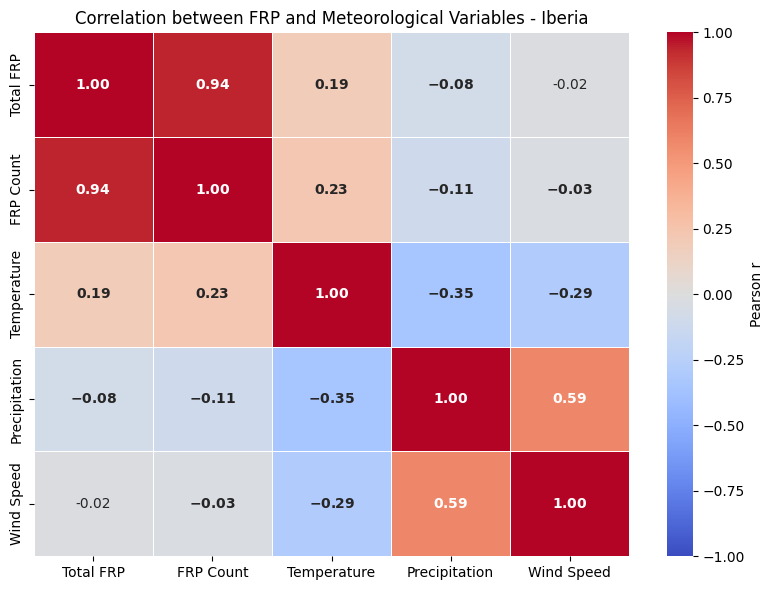

In [29]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Iberia.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_correlations_Iberia.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Iberia"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "Total FRP"

frp_count = ds["frp_count_Iberia"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP Count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
# Temperature → Max
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# Precipitation → Total_Precipitation
precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# Wind speed → Max
wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_all.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_all[var1], df_all[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Correlation results saved to: {output_csv}")

# --------------------
# 7. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Correlation between FRP and Meteorological Variables - Iberia")
plt.tight_layout()
plt.show()


##### Monthly

C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1707888552.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Total FRP": df_all["Total FRP"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1707888552.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP Count": df_all["FRP Count"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1707888552.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Precipitation": df_all["Precipitation"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1707888552.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Temperature": df_all["Temperature"].resample("M").mean(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1707888552.py:55: FutureWarning: 'M' is depre

Monthly correlation results saved to: D:\IPMA\Results\FRP_meteo_monthly_correlations_Iberia.csv


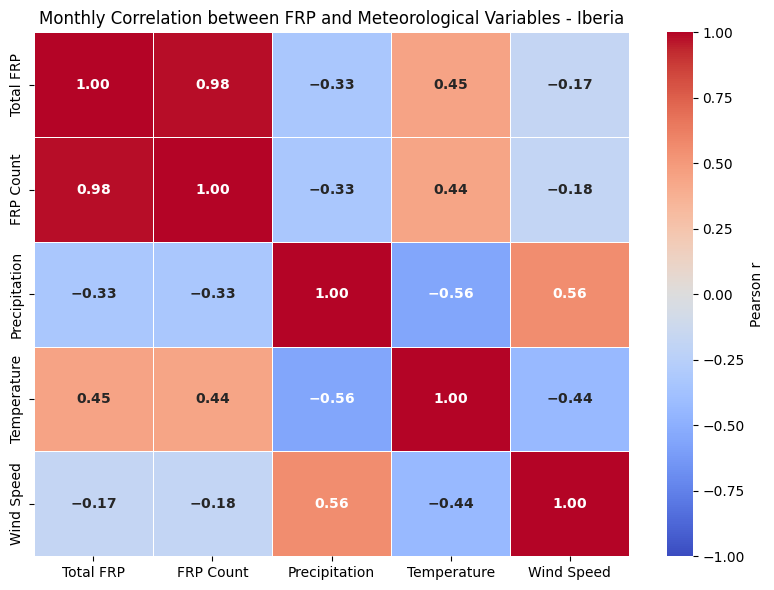

In [2]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Iberia.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_monthly_correlations_Iberia.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Iberia"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "Total FRP"

frp_count = ds["frp_count_Iberia"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP Count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Aggregate to monthly
# --------------------
# For FRP_sum, FRP_count, and Precipitation -> use sum (total per month)
# For Temperature and Wind -> use mean (average per month)
df_monthly = pd.DataFrame({
    "Total FRP": df_all["Total FRP"].resample("M").sum(),
    "FRP Count": df_all["FRP Count"].resample("M").sum(),
    "Precipitation": df_all["Precipitation"].resample("M").sum(),
    "Temperature": df_all["Temperature"].resample("M").mean(),
    "Wind Speed": df_all["Wind Speed"].resample("M").mean(),
}).dropna()

# --------------------
# 7. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_monthly.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_monthly[var1], df_monthly[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Monthly correlation results saved to: {output_csv}")

# --------------------
# 8. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Monthly Correlation between FRP and Meteorological Variables - Iberia")
plt.tight_layout()
plt.show()


#### Italy

##### Daily

Correlation results saved to: D:\IPMA\Results\FRP_meteo_correlations_Italy.csv


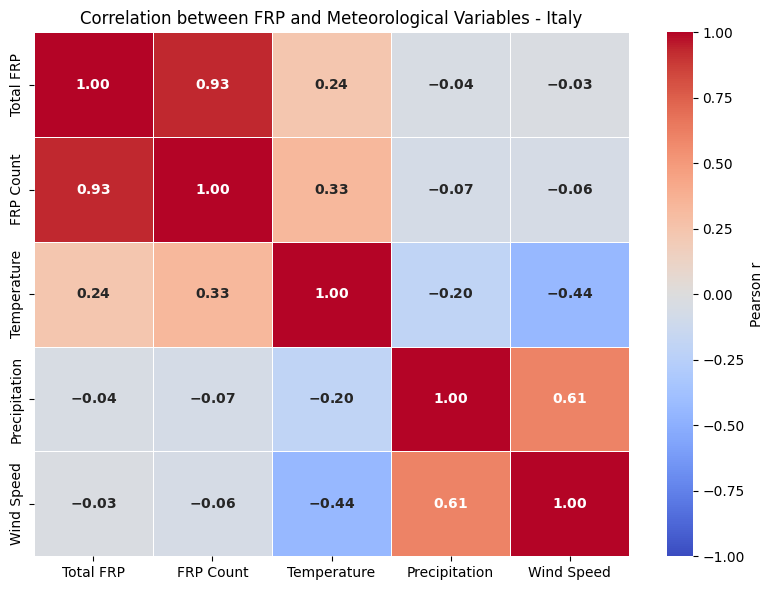

In [6]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Italy.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_correlations_Italy.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Italy"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "Total FRP"

frp_count = ds["frp_count_Italy"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP Count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
# Temperature → Max
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# Precipitation → Total_Precipitation
precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# Wind speed → Max
wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_all.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_all[var1], df_all[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Correlation results saved to: {output_csv}")

# --------------------
# 7. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Correlation between FRP and Meteorological Variables - Italy")
plt.tight_layout()
plt.show()


##### Monthly

C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\975685899.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Total FRP": df_all["Total FRP"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\975685899.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP Count": df_all["FRP Count"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\975685899.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Precipitation": df_all["Precipitation"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\975685899.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Temperature": df_all["Temperature"].resample("M").mean(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\975685899.py:55: FutureWarning: 'M' is deprecated

Monthly correlation results saved to: D:\IPMA\Results\FRP_meteo_monthly_correlations_Italy.csv


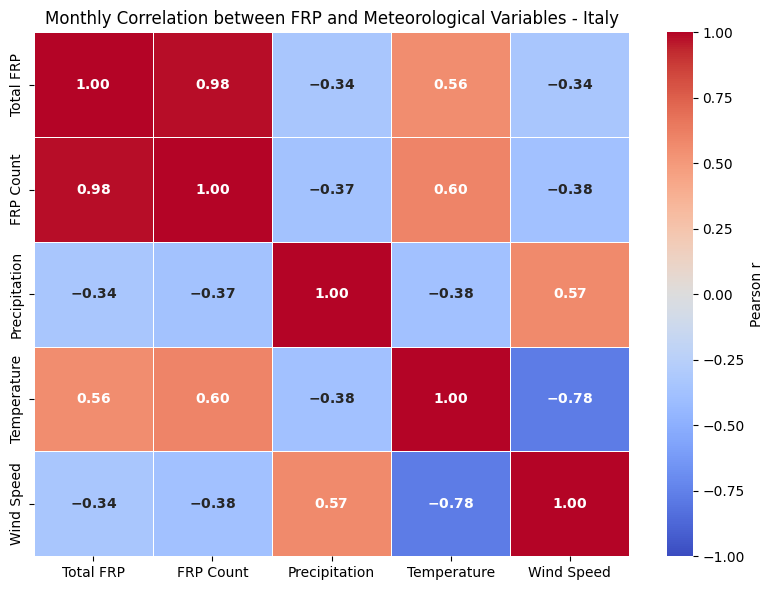

In [5]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Italy.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_monthly_correlations_Italy.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Italy"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "Total FRP"

frp_count = ds["frp_count_Italy"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP Count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Aggregate to monthly
# --------------------
# For FRP_sum, FRP_count, and Precipitation -> use sum (total per month)
# For Temperature and Wind -> use mean (average per month)
df_monthly = pd.DataFrame({
    "Total FRP": df_all["Total FRP"].resample("M").sum(),
    "FRP Count": df_all["FRP Count"].resample("M").sum(),
    "Precipitation": df_all["Precipitation"].resample("M").sum(),
    "Temperature": df_all["Temperature"].resample("M").mean(),
    "Wind Speed": df_all["Wind Speed"].resample("M").mean(),
}).dropna()

# --------------------
# 7. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_monthly.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_monthly[var1], df_monthly[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Monthly correlation results saved to: {output_csv}")

# --------------------
# 8. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Monthly Correlation between FRP and Meteorological Variables - Italy")
plt.tight_layout()
plt.show()


#### Greece

##### Daily

Correlation results saved to: D:\IPMA\Results\FRP_meteo_correlations_Greece.csv


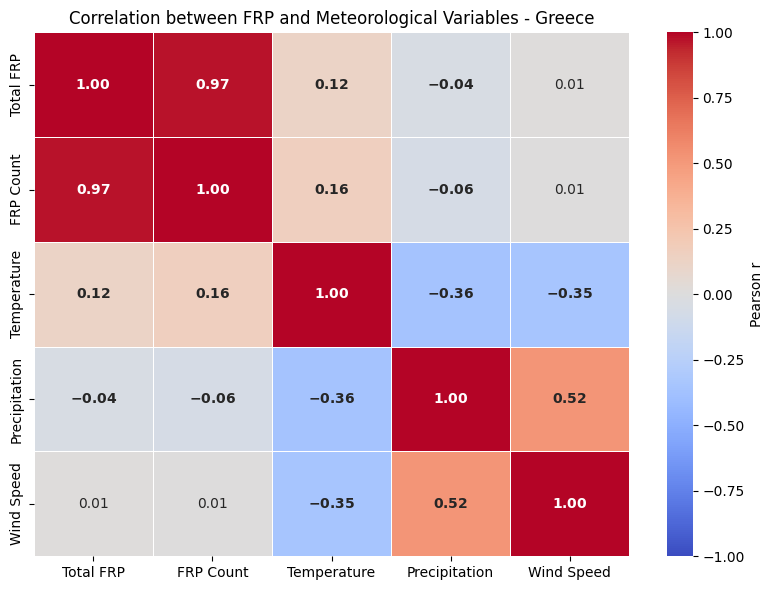

In [7]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Greece.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_correlations_Greece.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Greece"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "Total FRP"

frp_count = ds["frp_count_Greece"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP Count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
# Temperature → Max
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

# Precipitation → Total_Precipitation
precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

# Wind speed → Max
wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_all.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_all[var1], df_all[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Correlation results saved to: {output_csv}")

# --------------------
# 7. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Correlation between FRP and Meteorological Variables - Greece")
plt.tight_layout()
plt.show()


##### Monthly

C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1611084107.py:51: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Total FRP": df_all["Total FRP"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1611084107.py:52: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "FRP Count": df_all["FRP Count"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1611084107.py:53: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Precipitation": df_all["Precipitation"].resample("M").sum(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1611084107.py:54: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  "Temperature": df_all["Temperature"].resample("M").mean(),
C:\Users\sofia\AppData\Local\Temp\ipykernel_20404\1611084107.py:55: FutureWarning: 'M' is depre

Monthly correlation results saved to: D:\IPMA\Results\FRP_meteo_monthly_correlations_Greece.csv


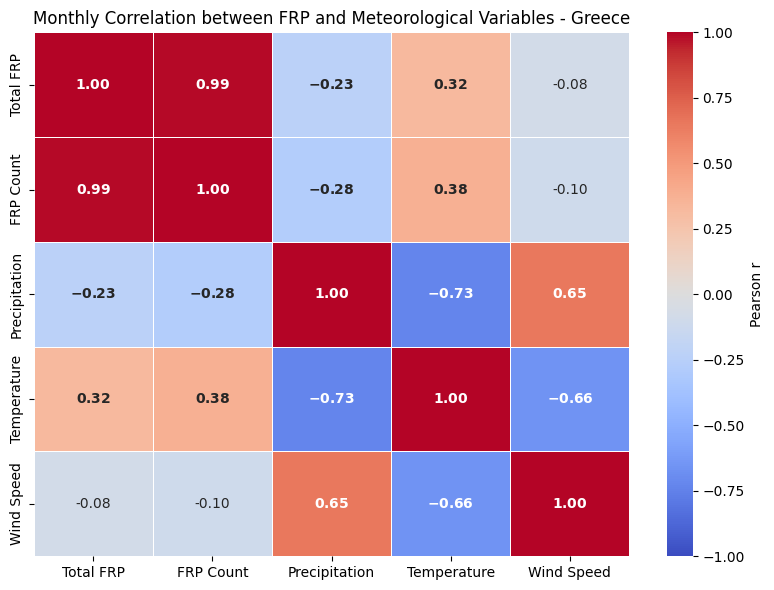

In [9]:
import xarray as xr
import pandas as pd
from scipy.stats import pearsonr, spearmanr
import matplotlib.pyplot as plt
import seaborn as sns

# --------------------
# 1. File paths
# --------------------
pollutant_file = r"D:\IPMA\Results\co_fire_meteo_Greece.nc"
output_csv = r"D:\IPMA\Results\FRP_meteo_monthly_correlations_Greece.csv"

# --------------------
# 2. Load combined dataset (FRP + meteo)
# --------------------
ds = xr.open_dataset(pollutant_file)

# --------------------
# 3. Extract FRP variables (area-averaged)
# --------------------
frp_sum = ds["frp_sum_Greece"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_sum.name = "Total FRP"

frp_count = ds["frp_count_Greece"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
frp_count.name = "FRP Count"

# --------------------
# 4. Extract meteorological variables (already daily)
# --------------------
temp_ts = ds["temp_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
temp_ts.name = "Temperature"

precip_ts = ds["precip_Total_Precipitation"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
precip_ts.name = "Precipitation"

wind_ts = ds["wind_Max"].mean(dim=["latitude", "longitude"], skipna=True).to_series()
wind_ts.name = "Wind Speed"

# --------------------
# 5. Combine all variables into one DataFrame
# --------------------
df_all = pd.concat([frp_sum, frp_count, temp_ts, precip_ts, wind_ts], axis=1)
df_all = df_all.dropna()

# --------------------
# 6. Aggregate to monthly
# --------------------
# For FRP_sum, FRP_count, and Precipitation -> use sum (total per month)
# For Temperature and Wind -> use mean (average per month)
df_monthly = pd.DataFrame({
    "Total FRP": df_all["Total FRP"].resample("M").sum(),
    "FRP Count": df_all["FRP Count"].resample("M").sum(),
    "Precipitation": df_all["Precipitation"].resample("M").sum(),
    "Temperature": df_all["Temperature"].resample("M").mean(),
    "Wind Speed": df_all["Wind Speed"].resample("M").mean(),
}).dropna()

# --------------------
# 7. Compute correlations (Pearson & Spearman)
# --------------------
variables = df_monthly.columns
results = []

for var1 in variables:
    for var2 in variables:
        if var1 == var2:
            continue
        x, y = df_monthly[var1], df_monthly[var2]
        if x.nunique() < 2 or y.nunique() < 2:
            continue
        pearson_r, pearson_p = pearsonr(x, y)
        spearman_r, spearman_p = spearmanr(x, y)
        results.append({
            "Var1": var1,
            "Var2": var2,
            "Pearson_r": pearson_r,
            "Pearson_p": pearson_p,
            "Spearman_r": spearman_r,
            "Spearman_p": spearman_p
        })

results_df = pd.DataFrame(results)
results_df.to_csv(output_csv, index=False)
print(f"Monthly correlation results saved to: {output_csv}")

# --------------------
# 8. Pearson correlation matrix heatmap with bold for significant correlations
# --------------------
pearson_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)
pval_matrix = pd.DataFrame(index=variables, columns=variables, dtype=float)

for _, row in results_df.iterrows():
    pearson_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_r"]
    pval_matrix.loc[row["Var1"], row["Var2"]] = row["Pearson_p"]

# Fill diagonal
for var in variables:
    pearson_matrix.loc[var, var] = 1.0
    pval_matrix.loc[var, var] = 0.0

# Annotate bold if p < 0.05
annot_matrix = pearson_matrix.copy().astype(str)
for i in variables:
    for j in variables:
        val = pearson_matrix.loc[i, j]
        p = pval_matrix.loc[i, j]
        if pd.isna(val):
            annot_matrix.loc[i, j] = ""
        elif p < 0.05:
            annot_matrix.loc[i, j] = f"$\\bf{{{val:.2f}}}$"
        else:
            annot_matrix.loc[i, j] = f"{val:.2f}"

plt.figure(figsize=(8, 6))
sns.heatmap(
    pearson_matrix.astype(float),
    annot=annot_matrix,
    fmt="",
    cmap="coolwarm",
    center=0,
    vmin=-1,
    vmax=1,
    cbar_kws={"label": "Pearson r"},
    linewidths=0.5
)
plt.title("Monthly Correlation between FRP and Meteorological Variables - Greece")
plt.tight_layout()
plt.show()
